<a href="https://colab.research.google.com/github/G-Gaddu/Quant-Material/blob/main/Credit_Risk_Modelling_2_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Exploration

In [ ]:
# Import the packages and conceal warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
import scipy.stats as stat
from scipy import stats
from sklearn.metrics import roc_curve, roc_auc_score
warnings.filterwarnings('ignore')

In [ ]:
files.upload()

Saving 3.1 loan_data_2007_2014.csv to 3.1 loan_data_2007_2014.csv
Buffered data was truncated after reaching the output size limit.

In [81]:
# Load the data and check its dimensions
data = pd.read_csv('3.1 loan_data_2007_2014.csv')
data.shape

(466285, 75)

In [82]:
# View the head
data.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         NaN         NaN      NaN              NaN    NaN   
1         NaN         NaN         NaN      NaN              NaN    NaN   
2         NaN         NaN         NaN      NaN              NaN    NaN   
3         NaN         NaN         NaN      NaN              NaN    NaN   
4         NaN         NaN         NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 75 columns]

In [83]:
# Drop unnamed column and set 'id' as index
data = data.drop(columns=['Unnamed: 0'])
data = data.set_index('id')
data.head()

member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
id                                                                        
1077501    1296599       5000         5000           4975.0   36 months   
1077430    1314167       2500         2500           2500.0   60 months   
1077175    1313524       2400         2400           2400.0   36 months   
1076863    1277178      10000        10000          10000.0   36 months   
1075358    1311748       3000         3000           3000.0   60 months   

         int_rate  installment grade sub_grade                 emp_title  ...  \
id                                                                        ...   
1077501     10.65       162.87     B        B2                       NaN  ...   
1077430     15.27        59.83     C        C4                     Ryder  ...   
1077175     15.96        84.33     C        C5                       NaN  ...   
1076863     13.49       339.31     C        C1       AIR RESOURCES BOARD  ...   
1075358     12.69        67.79     B        B5  University Medical Group  ...   

        total_bal_il il_util  open_rv_12m open_rv_24m max_bal_bc all_util  \
id                                                                          
1077501          NaN     NaN          NaN         NaN        NaN      NaN   
1077430          NaN     NaN          NaN         NaN        NaN      NaN   
1077175          NaN     NaN          NaN         NaN        NaN      NaN   
1076863          NaN     NaN          NaN         NaN        NaN      NaN   
1075358          NaN     NaN          NaN         NaN        NaN      NaN   

        total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  
id                                                        
1077501              NaN    NaN         NaN          NaN  
1077430              NaN    NaN         NaN          NaN  
1077175              NaN    NaN         NaN          NaN  
1076863              NaN    NaN         NaN          NaN  
1075358              NaN    NaN         NaN          NaN  

[5 rows x 73 columns]

In [84]:
# Look at the column headings
data.columns.values

array(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
   

In [85]:
# Check data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 1077501 to 9199665
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    466285 non-null  int64  
 1   loan_amnt                    466285 non-null  int64  
 2   funded_amnt                  466285 non-null  int64  
 3   funded_amnt_inv              466285 non-null  float64
 4   term                         466285 non-null  object 
 5   int_rate                     466285 non-null  float64
 6   installment                  466285 non-null  float64
 7   grade                        466285 non-null  object 
 8   sub_grade                    466285 non-null  object 
 9   emp_title                    438697 non-null  object 
 10  emp_length                   445277 non-null  object 
 11  home_ownership               466285 non-null  object 
 12  annual_inc                   466281 non-null  float64
 1

The following variables are discrete: grade, subgrade, home_ownership, addr_state, verification status. purpose and initial_list_status.
The following variables are continuous:
term, emp_length, int_rate, mths_since_earliest_cr_line, delinq_2yrs, inq_last_6mths, open_acc, pub_rec, total_acc, acc_now_delinq, total_rev_hi_lim, annual_inc, dti, mths_since_last_delinq, mths_since_last_record

General Preprocessing

In [86]:
# Get dummy variables for the discrete variables
dummy_columns = ['grade','sub_grade','home_ownership','verification_status',
                 'loan_status','purpose','addr_state','initial_list_status']

df_Dummies = pd.DataFrame()
for col in dummy_columns:
  df_Dummy= pd.get_dummies(data[col], prefix = col, prefix_sep = ':')
  df_Dummies = pd.concat([df_Dummies,df_Dummy ], axis=1)

In [87]:
# Merge the dummy variables with the data
data = pd.concat([data, df_Dummies], axis=1)

In [88]:
# Let us look at the emp_length column
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [92]:
# Remove the string "years" and anything over 10 years is 10 years, any NaNs and less than 1 year becomes 0, convert to integer
data['emp_length']= data['emp_length'].str.replace('+ years','')
data['emp_length']= data['emp_length'].str.replace('n/a',str(0))
data['emp_length']= data['emp_length'].str.replace('< 1 year',str(0))
data['emp_length']= data['emp_length'].str.replace(' years','')
data['emp_length']= data['emp_length'].str.replace(' year','')
data['emp_length'] = pd.to_numeric(data['emp_length'])

In [94]:
# Display the 'earliest_cr_line' column
print(data['earliest_cr_line'].head())

id
1077501    Jan-85
1077430    Apr-99
1077175    Nov-01
1076863    Feb-96
1075358    Jan-96
Name: earliest_cr_line, dtype: object


In [95]:
# Convert the date format in the earliest_cr_line_date column to %m-%y and determine the months since default (December 2017)
data['earliest_cr_line_date']=pd.to_datetime(data['earliest_cr_line'],format = '%b-%y')
diff_cr_line = pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']
data['mths_since_earliest_cr_line'] = round(pd.to_numeric( diff_cr_line / np.timedelta64(4,'W')))

In [96]:
# Identify negative values
neg = data['mths_since_earliest_cr_line']<0
data.loc[neg,['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']].head()

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
id                                                                         
1048395           Sep-62            2062-09-01                       -584.0
1042802           Sep-68            2068-09-01                       -662.0
1031659           Sep-64            2064-09-01                       -610.0
1021976           Sep-67            2067-09-01                       -649.0
1013619           Feb-65            2065-02-01                       -615.0

In [97]:
# The negative values were due to 196x data being read as 206x, so take the maximum month difference to replace the them
data.loc[neg,'mths_since_earliest_cr_line'] = data.loc[:,'mths_since_earliest_cr_line'].max()

In [98]:
# View the term column
data['term'].head()

id
1077501     36 months
1077430     60 months
1077175     36 months
1076863     36 months
1075358     60 months
Name: term, dtype: object

In [99]:
# Remove " months" from the 'term' column and convert to integer
data['term'] = data['term'].str.replace(' months', '').astype(int)

In [100]:
# Convert the issue_d_date to the %m-%y format and determine the time since December 2017
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format = '%b-%y')
diff_issue_d = pd.to_datetime('2017-12-01') - data['issue_d_date']
data['mths_since_issue_d'] = round(pd.to_numeric( diff_issue_d / np.timedelta64(4, 'W')))

In [101]:
# Check for missing values and display results for all columns
missing_values = data.isnull().sum()
pd.set_option('display.max_rows', None)  # Show all rows
print(missing_values)


member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                                                          0
annual_inc                                                              4
verification_status                   

In [103]:
# Replace NaN values in 'total_rev_hi_lim' with corresponding values from 'funded_amnt'
data['total_rev_hi_lim'].fillna(data['funded_amnt'], inplace=True)

# Replace NaN values in 'annual_inc' with the mean of the column
mean_annual_inc = data['annual_inc'].mean()
data['annual_inc'].fillna(mean_annual_inc, inplace=True)

# Replace NaN values in specified columns with 0
cols_to_fill_zero = ['mths_since_earliest_cr_line', 'acc_now_delinq', 'total_acc', 'pub_rec', 'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'emp_length']
for col in cols_to_fill_zero:
    data[col].fillna(0, inplace=True)

PD Model Definition

In [104]:
# Determine the properties of the target data
print(data['loan_status'].value_counts())

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64


In [105]:
# Create a new column 'loan_condition' based on loan status
data['loan_condition'] = np.where(data['loan_status'].isin(['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']), 0, 1)

Train Test Split

In [106]:
# Define features (X) and target (y)
X = data.drop('loan_condition', axis=1)
y = data['loan_condition']

# Apply train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [107]:
# Create a copy of the data for preprocessing
features_preprocessed = X_train
targets_preprocessed = y_train

Weight of Evidence

In [109]:
# Create a function to provide the weight of evidence for discrete categories
def woe_discrete(df,independent_variable,dependent_variable):
    df = pd.concat([df[independent_variable],dependent_variable],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
    df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0],'n_obs','prop_good']
    df['no_good'] = df['prop_good'] * df['n_obs']
    df['no_bad'] = (1- df['prop_good']) * df['n_obs']
    df['Final_good'] = df['no_good']/df['no_good'].sum()
    df['Final_bad'] = df['no_bad']/df['no_bad'].sum()
    df['WOE'] = np.log(df['Final_good']/df['Final_bad'])
    df = df.sort_values(['WOE'])
    df = df.reset_index(drop=True)
    df['IV'] = (df['Final_good']-df['Final_bad']) * df['WOE']
    df['IV'] = df['IV'].sum()
    return df


In [110]:
# Plot the weight of evidence for each feature
def plot_by_woe(df_woe,rotation_of_x_labels=0):
    x = np.array(df_woe.iloc[:,0].apply(str))
    y = df_woe['WOE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of evidence')
    plt.title(str('Weight of evidence by ' + df_woe.columns[0]))
    plt.xticks(rotation = rotation_of_x_labels)

Look at the Weight of Evidence for grade, home owenership and addr_state

In [113]:
# First look at the grade
woe_grade = woe_discrete(features_preprocessed,'grade',targets_preprocessed)
woe_grade

grade   n_obs  prop_good   no_good   no_bad  Final_good  Final_bad  \
0     G    2671   0.724448    1935.0    736.0    0.005824   0.018035   
1     F   10611   0.758175    8045.0   2566.0    0.024216   0.062878   
2     E   28584   0.804751   23003.0   5581.0    0.069240   0.136759   
3     D   61622   0.846386   52156.0   9466.0    0.156993   0.231959   
4     C  100136   0.885626   88683.0  11453.0    0.266941   0.280649   
5     B  109524   0.920894  100860.0   8664.0    0.303595   0.212306   
6     A   59880   0.960872   57537.0   2343.0    0.173190   0.057414   

        WOE        IV  
0 -1.130259  0.287078  
1 -0.954189  0.287078  
2 -0.680635  0.287078  
3 -0.390359  0.287078  
4 -0.050075  0.287078  
5  0.357665  0.287078  
6  1.104104  0.287078

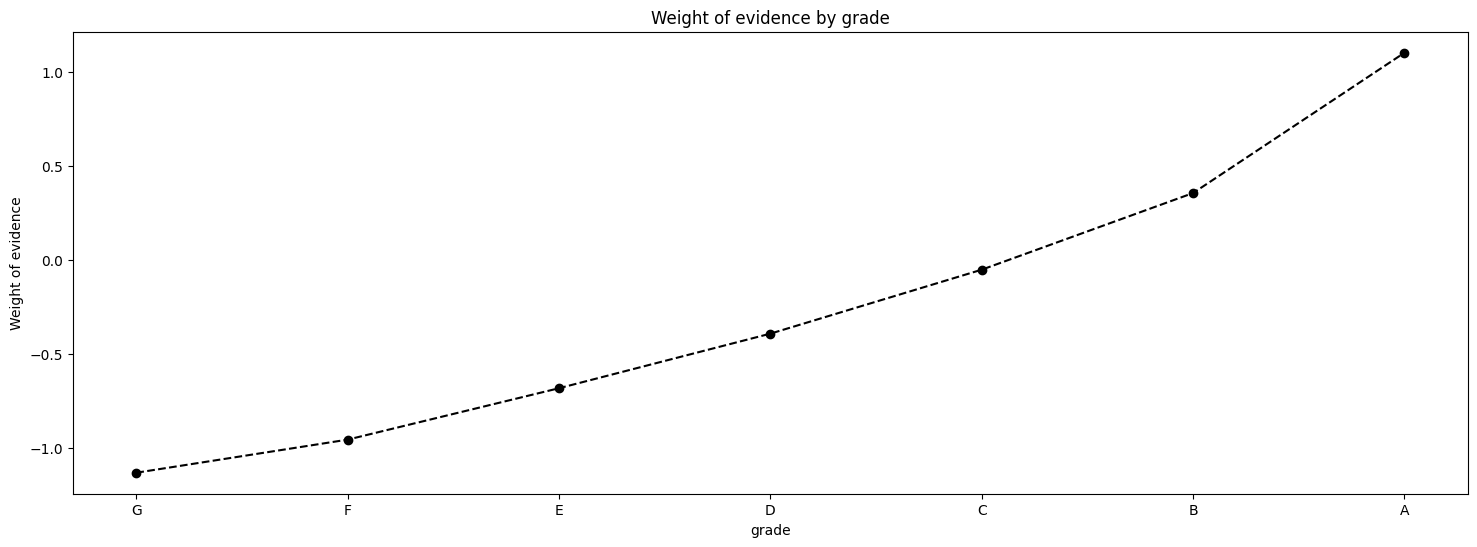

In [114]:
plot_by_woe(woe_discrete(features_preprocessed,'grade',targets_preprocessed),0)

In [115]:
# Then look at home ownership
woe_home_ownership = woe_discrete(features_preprocessed,'home_ownership',targets_preprocessed)
woe_home_ownership

home_ownership   n_obs  prop_good   no_good   no_bad  Final_good  Final_bad  \
0          OTHER     144   0.798611     115.0     29.0    0.000346   0.000711   
1           NONE      41   0.853659      35.0      6.0    0.000105   0.000147   
2           RENT  150760   0.874310  131811.0  18949.0    0.396759   0.464334   
3            OWN   33413   0.891839   29799.0   3614.0    0.089697   0.088559   
4       MORTGAGE  188669   0.903476  170458.0  18211.0    0.513089   0.446250   
5            ANY       1   1.000000       1.0      0.0    0.000003   0.000000   

        WOE   IV  
0 -0.719255  inf  
1 -0.333303  inf  
2 -0.157274  inf  
3  0.012768  inf  
4  0.139571  inf  
5       inf  inf

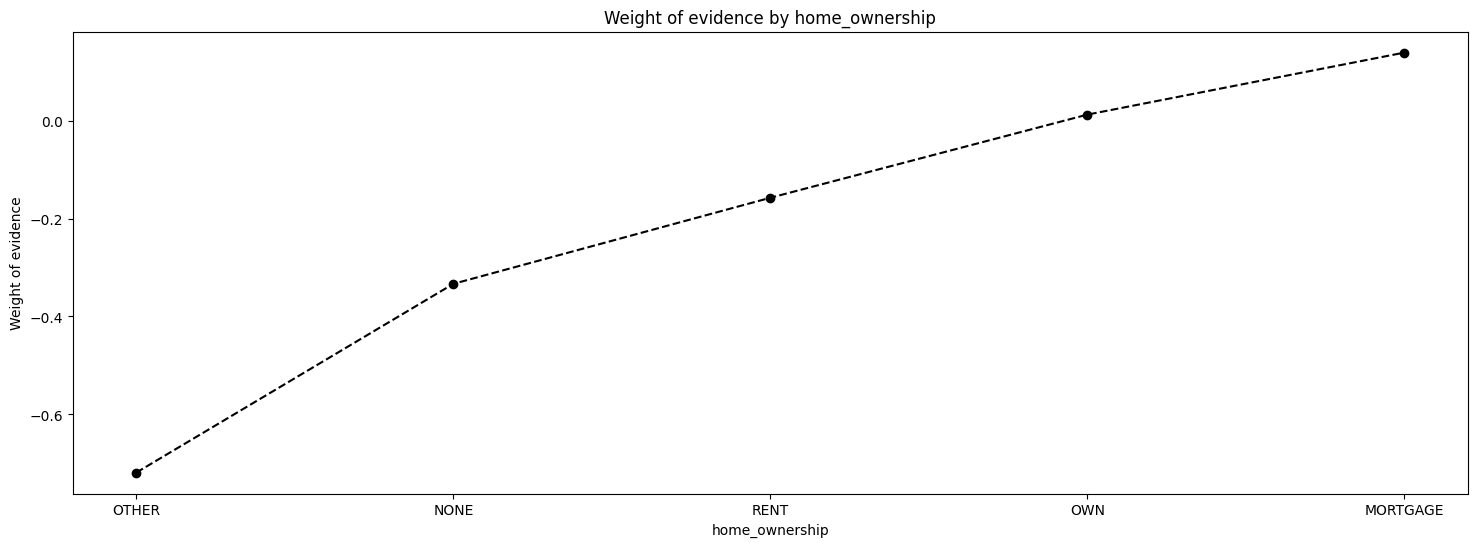

In [116]:
plot_by_woe(woe_discrete(features_preprocessed,'home_ownership',targets_preprocessed),0)

In [117]:
# Group together specific categories based on the weight of evidence
features_preprocessed['home_ownership:RENT_OTHER_NONE_ANY'] = sum ([features_preprocessed['home_ownership:RENT'], features_preprocessed['home_ownership:OTHER'],
                                                              features_preprocessed['home_ownership:NONE'], features_preprocessed['home_ownership:ANY'],])

In [118]:
# Look at the addr state
woe_addr_state = woe_discrete(features_preprocessed,'addr_state',targets_preprocessed)
woe_addr_state

addr_state  n_obs  prop_good  no_good  no_bad  Final_good  Final_bad  \
0          NE     13   0.384615      5.0     8.0    0.000015   0.000196   
1          IA     11   0.727273      8.0     3.0    0.000024   0.000074   
2          NV   5195   0.863715   4487.0   708.0    0.013506   0.017349   
3          AL   4702   0.875372   4116.0   586.0    0.012389   0.014360   
4          FL  25305   0.875756  22161.0  3144.0    0.066706   0.077042   
5          MO   5974   0.879980   5257.0   717.0    0.015824   0.017570   
6          HI   1964   0.881874   1732.0   232.0    0.005213   0.005685   
7          NC  10184   0.883641   8999.0  1185.0    0.027088   0.029038   
8          LA   4362   0.883998   3856.0   506.0    0.011607   0.012399   
9          NY  32190   0.884001  28456.0  3734.0    0.085654   0.091499   
10         MD   8742   0.885152   7738.0  1004.0    0.023292   0.024602   
11         OK   3306   0.885662   2928.0   378.0    0.008813   0.009263   
12         VA  11392   0.885973  10093.0  1299.0    0.030381   0.031831   
13         NJ  14505   0.886315  12856.0  1649.0    0.038697   0.040408   
14         CA  57097   0.886894  50639.0  6458.0    0.152427   0.158249   
15         NM   2079   0.886965   1844.0   235.0    0.005551   0.005759   
16         AZ   8574   0.886984   7605.0   969.0    0.022892   0.023745   
17         RI   1638   0.888278   1455.0   183.0    0.004380   0.004484   
18         MI   9164   0.888368   8141.0  1023.0    0.024505   0.025068   
19         AR   2804   0.888730   2492.0   312.0    0.007501   0.007645   
20         TN   4739   0.888795   4212.0   527.0    0.012678   0.012914   
21         PA  13192   0.890464  11747.0  1445.0    0.035359   0.035409   
22         SD    769   0.890767    685.0    84.0    0.002062   0.002058   
23         OH  12272   0.890808  10932.0  1340.0    0.032906   0.032836   
24         DE   1022   0.891389    911.0   111.0    0.002742   0.002720   
25         MA   8899   0.892572   7943.0   956.0    0.023909   0.023426   
26         UT   2766   0.892986   2470.0   296.0    0.007435   0.007253   
27         KY   3548   0.893179   3169.0   379.0    0.009539   0.009287   
28         GA  11952   0.893574  10680.0  1272.0    0.032147   0.031170   
29         MN   6527   0.893672   5833.0   694.0    0.017558   0.017006   
30         IN   5200   0.895577   4657.0   543.0    0.014018   0.013306   
31         WA   8356   0.896003   7487.0   869.0    0.022536   0.021294   
32         OR   4762   0.900042   4286.0   476.0    0.012901   0.011664   
33         MT   1126   0.900533   1014.0   112.0    0.003052   0.002744   
34         WI   4744   0.900927   4274.0   470.0    0.012865   0.011517   
35         TX  29245   0.903334  26418.0  2827.0    0.079520   0.069274   
36         IL  14906   0.904133  13477.0  1429.0    0.040567   0.035017   
37         KS   3349   0.906539   3036.0   313.0    0.009139   0.007670   
38         CO   7730   0.908538   7023.0   707.0    0.021140   0.017325   
39         CT   5773   0.908886   5247.0   526.0    0.015794   0.012889   
40         SC   4490   0.909131   4082.0   408.0    0.012287   0.009998   
41         VT    742   0.909704    675.0    67.0    0.002032   0.001642   
42         NH   1772   0.915350   1622.0   150.0    0.004882   0.003676   
43         AK   1016   0.915354    930.0    86.0    0.002799   0.002107   
44         MS    953   0.916055    873.0    80.0    0.002628   0.001960   
45         WV   1912   0.916318   1752.0   160.0    0.005274   0.003921   
46         WY    888   0.921171    818.0    70.0    0.002462   0.001715   
47         DC   1168   0.932363   1089.0    79.0    0.003278   0.001936   
48         ME      3   1.000000      3.0     0.0    0.000009   0.000000   
49         ID      6   1.000000      6.0     0.0    0.000018   0.000000   

         WOE   IV  
0  -2.566895  inf  
1  -1.116062  inf  
2  -0.250396  inf  
3  -0.147574  inf  
4  -0.144054  inf  
5  -0.104652  inf  
6  -0.086597  inf  
7  -0.069521  inf

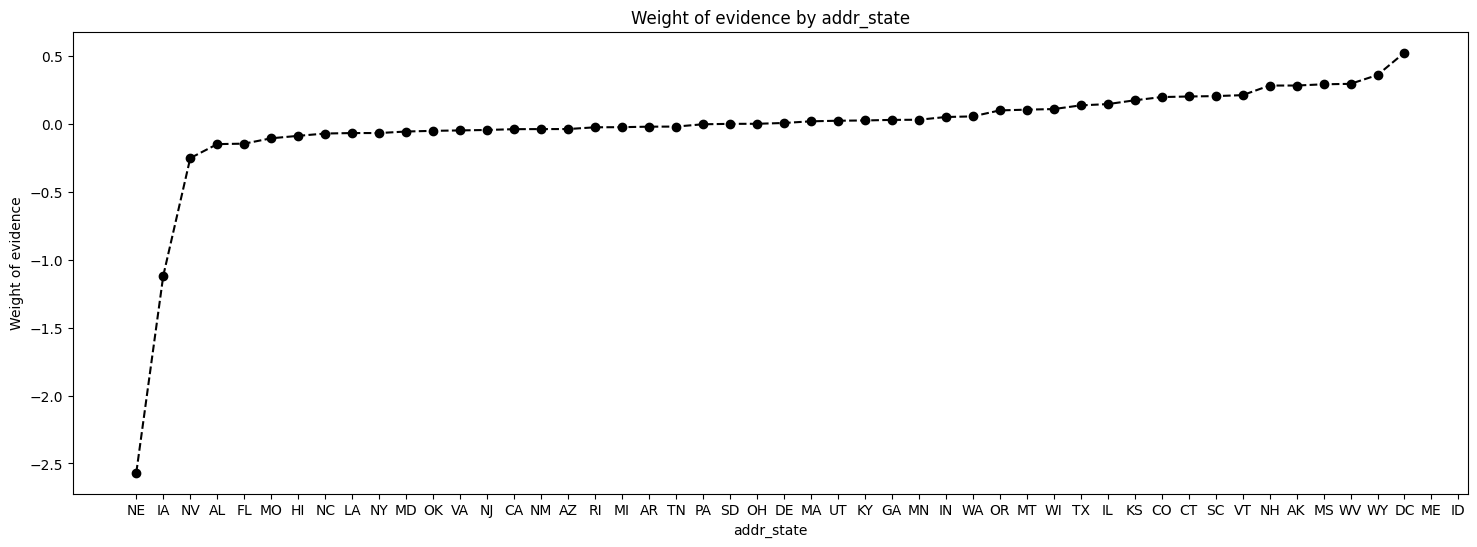

In [119]:
plot_by_woe(woe_discrete(features_preprocessed,'addr_state',targets_preprocessed),0)

In [120]:
# Group together the states based on weight of evidence
features_preprocessed['addr_state:NE_IA_NV_FL_HI_AL'] = sum([features_preprocessed['addr_state:NE'],
                                              features_preprocessed['addr_state:IA'], features_preprocessed['addr_state:NV'],
                                              features_preprocessed['addr_state:FL'], features_preprocessed['addr_state:HI'],
                                                          features_preprocessed['addr_state:AL']])

features_preprocessed['addr_state:NM_VA'] = sum([features_preprocessed['addr_state:NM'], features_preprocessed['addr_state:VA']])

features_preprocessed['addr_state:OK_TN_MO_LA_MD_NC'] = sum([features_preprocessed['addr_state:OK'], features_preprocessed['addr_state:TN'],
                                              features_preprocessed['addr_state:MO'], features_preprocessed['addr_state:LA'],
                                              features_preprocessed['addr_state:MD'], features_preprocessed['addr_state:NC']])

features_preprocessed['addr_state:UT_KY_AZ_NJ'] = sum([features_preprocessed['addr_state:UT'], features_preprocessed['addr_state:KY'],
                                              features_preprocessed['addr_state:AZ'], features_preprocessed['addr_state:NJ']])

features_preprocessed['addr_state:AR_MI_PA_OH_MN'] = sum([features_preprocessed['addr_state:AR'], features_preprocessed['addr_state:MI'],
                                              features_preprocessed['addr_state:PA'], features_preprocessed['addr_state:OH'],
                                              features_preprocessed['addr_state:MN']])

features_preprocessed['addr_state:RI_MA_DE_SD_IN'] = sum([features_preprocessed['addr_state:RI'], features_preprocessed['addr_state:MA'],
                                              features_preprocessed['addr_state:DE'], features_preprocessed['addr_state:SD'],
                                              features_preprocessed['addr_state:IN']])

features_preprocessed['addr_state:GA_WA_OR'] = sum([features_preprocessed['addr_state:GA'], features_preprocessed['addr_state:WA'],
                                              features_preprocessed['addr_state:OR']])

features_preprocessed['addr_state:WI_MT'] = sum([features_preprocessed['addr_state:WI'], features_preprocessed['addr_state:MT']])

features_preprocessed['addr_state:IL_CT'] = sum([features_preprocessed['addr_state:IL'], features_preprocessed['addr_state:CT']])

features_preprocessed['addr_state:KS_SC_CO_VT_AK_MS'] = sum([features_preprocessed['addr_state:KS'], features_preprocessed['addr_state:SC'],
                                              features_preprocessed['addr_state:CO'], features_preprocessed['addr_state:VT'],
                                              features_preprocessed['addr_state:AK'], features_preprocessed['addr_state:MS']])

features_preprocessed['addr_state:WV_NH_WY_DC_ME_ID'] = sum([features_preprocessed['addr_state:WV'], features_preprocessed['addr_state:NH'],
                                              features_preprocessed['addr_state:WY'], features_preprocessed['addr_state:DC'],
                                              features_preprocessed['addr_state:ME'], features_preprocessed['addr_state:ID']])


In [122]:
# Then look at verification status
woe_verification = woe_discrete(features_preprocessed,'verification_status',targets_preprocessed)
woe_verification

verification_status   n_obs  prop_good   no_good   no_bad  Final_good  \
0            Verified  134604   0.872493  117441.0  17163.0    0.353505   
1     Source Verified  119932   0.896041  107464.0  12468.0    0.323473   
2        Not Verified  118492   0.905665  107314.0  11178.0    0.323022   

   Final_bad       WOE        IV  
0   0.420569 -0.173712  0.020774  
1   0.305521  0.057099  0.020774  
2   0.273910  0.164920  0.020774

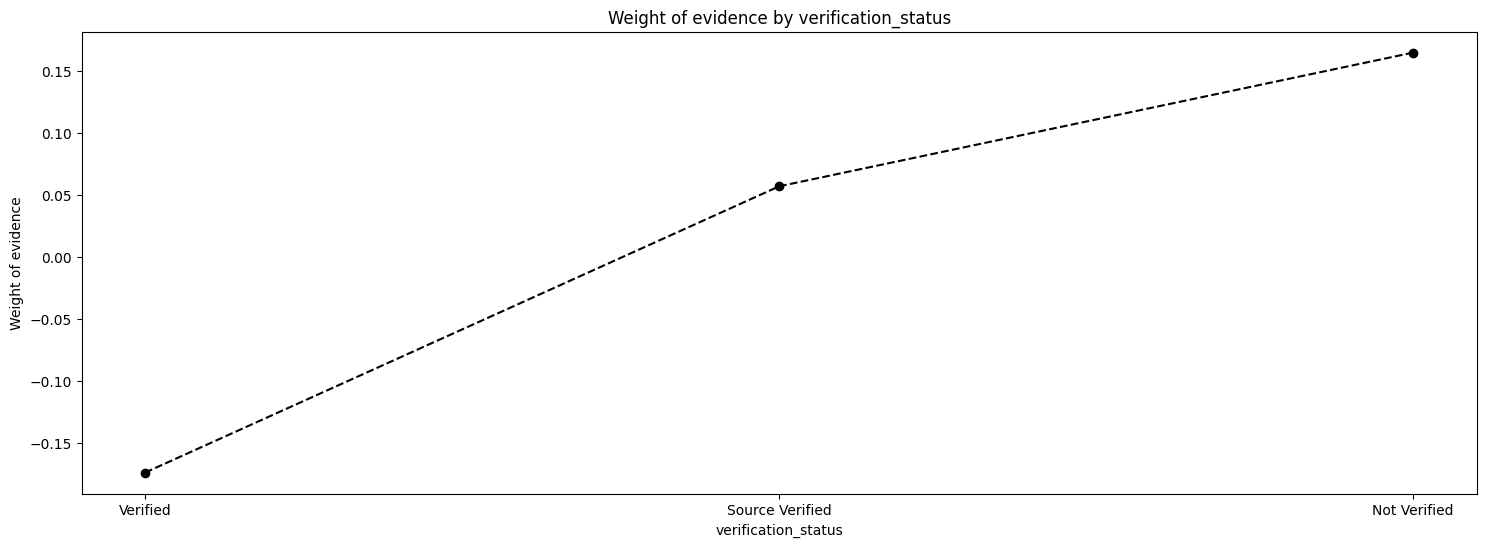

In [123]:
plot_by_woe(woe_discrete(features_preprocessed,'verification_status',targets_preprocessed),0)

In [125]:
# Then look at purpose for the loan
woe_purpose = woe_discrete(features_preprocessed,'purpose',targets_preprocessed)
woe_purpose

purpose   n_obs  prop_good   no_good   no_bad  Final_good  \
0       small_business    5570   0.780969    4350.0   1220.0    0.013094   
1          educational     342   0.786550     269.0     73.0    0.000810   
2     renewable_energy     288   0.840278     242.0     46.0    0.000728   
3               moving    2412   0.849502    2049.0    363.0    0.006168   
4                house    1809   0.856827    1550.0    259.0    0.004666   
5                other   18983   0.863088   16384.0   2599.0    0.049317   
6              medical    3645   0.864472    3151.0    494.0    0.009485   
7              wedding    1873   0.876668    1642.0    231.0    0.004943   
8             vacation    1982   0.880424    1745.0    237.0    0.005253   
9   debt_consolidation  219406   0.886744  194557.0  24849.0    0.585629   
10    home_improvement   21146   0.900880   19050.0   2096.0    0.057342   
11      major_purchase    7861   0.904847    7113.0    748.0    0.021411   
12                 car    4369   0.910048    3976.0    393.0    0.011968   
13         credit_card   83342   0.913597   76141.0   7201.0    0.229189   

    Final_bad       WOE        IV  
0    0.029895 -0.825567  0.037146  
1    0.001789 -0.792640  0.037146  
2    0.001127 -0.436595  0.037146  
3    0.008895 -0.366187  0.037146  
4    0.006347 -0.307710  0.037146  
5    0.063687 -0.255713  0.037146  
6    0.012105 -0.243952  0.037146  
7    0.005661 -0.135639  0.037146  
8    0.005808 -0.100442  0.037146  
9    0.608910 -0.038984  0.037146  
10   0.051361  0.110145  0.037146  
11   0.018329  0.155385  0.037146  
12   0.009630  0.217330  0.037146  
13   0.176456  0.261475  0.037146

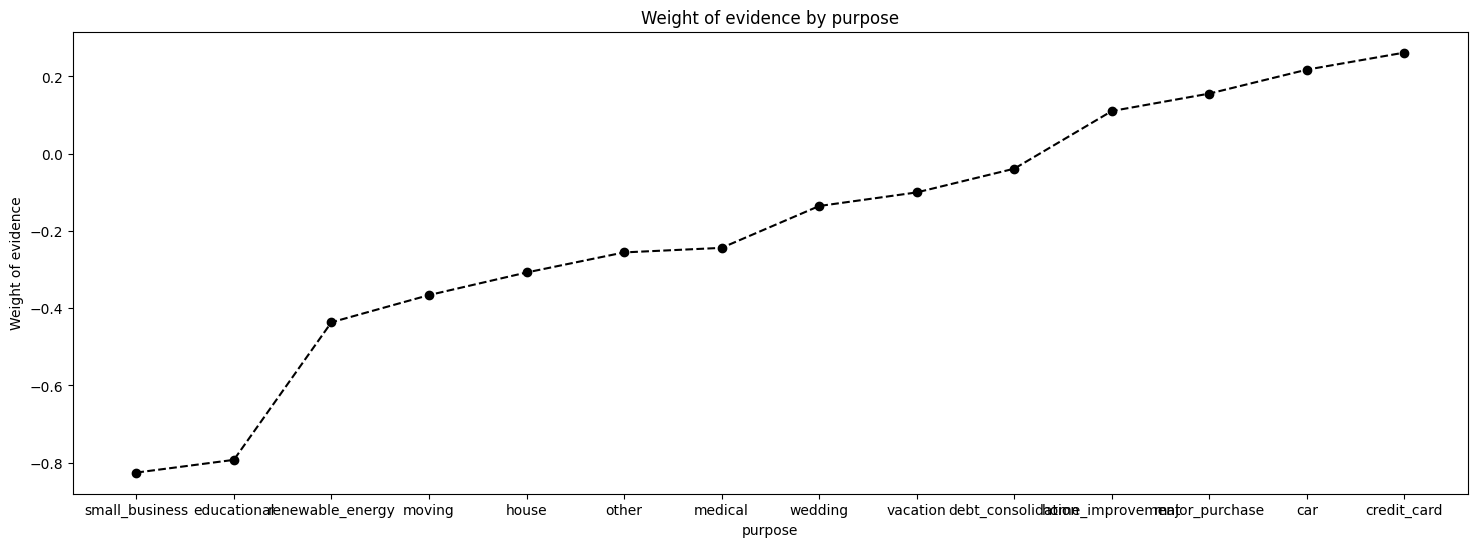

In [127]:
plot_by_woe(woe_discrete(features_preprocessed,'purpose',targets_preprocessed),0)

In [128]:
# Group together the purpose for the loan based on the weight of evidence
features_preprocessed['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([features_preprocessed['purpose:educational'], features_preprocessed['purpose:small_business'],
                                                                features_preprocessed['purpose:wedding'], features_preprocessed['purpose:renewable_energy'],
                                                                 features_preprocessed['purpose:moving'], features_preprocessed['purpose:house']])
features_preprocessed['purpose:oth__med__vacation'] = sum([features_preprocessed['purpose:other'], features_preprocessed['purpose:medical'],
                                             features_preprocessed['purpose:vacation']])
features_preprocessed['purpose:major_purch__car__home_impr'] = sum([features_preprocessed['purpose:major_purchase'], features_preprocessed['purpose:car'],
                                                        features_preprocessed['purpose:home_improvement']])



In [129]:
# Look at the weight of evidnce for the  initial list status
woe_initial_list_status = woe_discrete(features_preprocessed,'initial_list_status',targets_preprocessed)
woe_initial_list_status

initial_list_status   n_obs  prop_good   no_good   no_bad  Final_good  \
0                   f  242246   0.879309  213009.0  29237.0     0.64117   
1                   w  130782   0.911517  119210.0  11572.0     0.35883   

   Final_bad       WOE        IV  
0   0.716435 -0.110992  0.026072  
1   0.283565  0.235407  0.026072

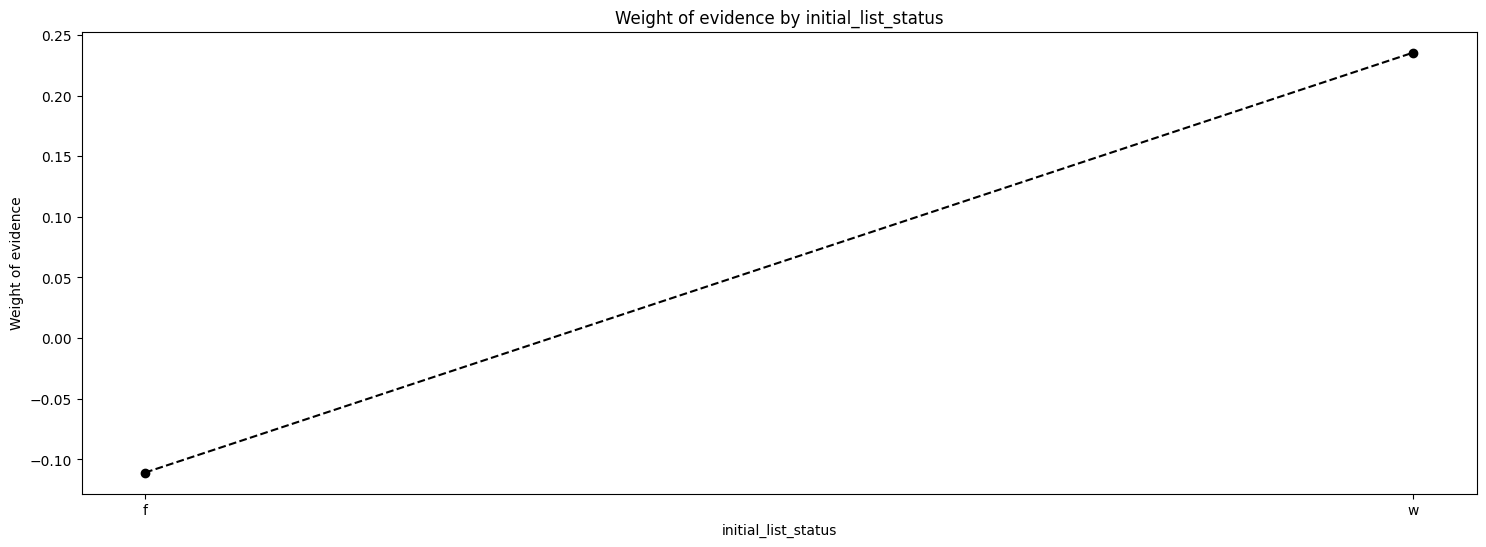

In [130]:
plot_by_woe(woe_discrete(features_preprocessed,'initial_list_status',targets_preprocessed),0)

In [132]:
# We need a function to determine the weight of evidence for continuous variables
def woe_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [133]:
# Similarly we create a plot for the weight of evidence for continuous variables
def plot_by_woe_continuous(df_woe,rotation_of_x_labels=0):
    x = np.array(df_woe.iloc[:,0].apply(str))
    y = df_woe['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of evidence')
    plt.title(str('Weight of evidence by' + df_woe.columns[0]))
    plt.xticks(rotation = rotation_of_x_labels)

In [134]:
# Look at the term for each loan and get the weight of evidence
woe_term_int = woe_continuous(features_preprocessed, 'term', targets_preprocessed)
woe_term_int

term   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0    36  270196   0.902878    0.724332  243954.0  26242.0     0.734317   
1    60  102832   0.858342    0.275668   88265.0  14567.0     0.265683   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.643044  0.132727             NaN       NaN  0.039068  
1    0.356956 -0.295307        0.044536  0.428034  0.039068

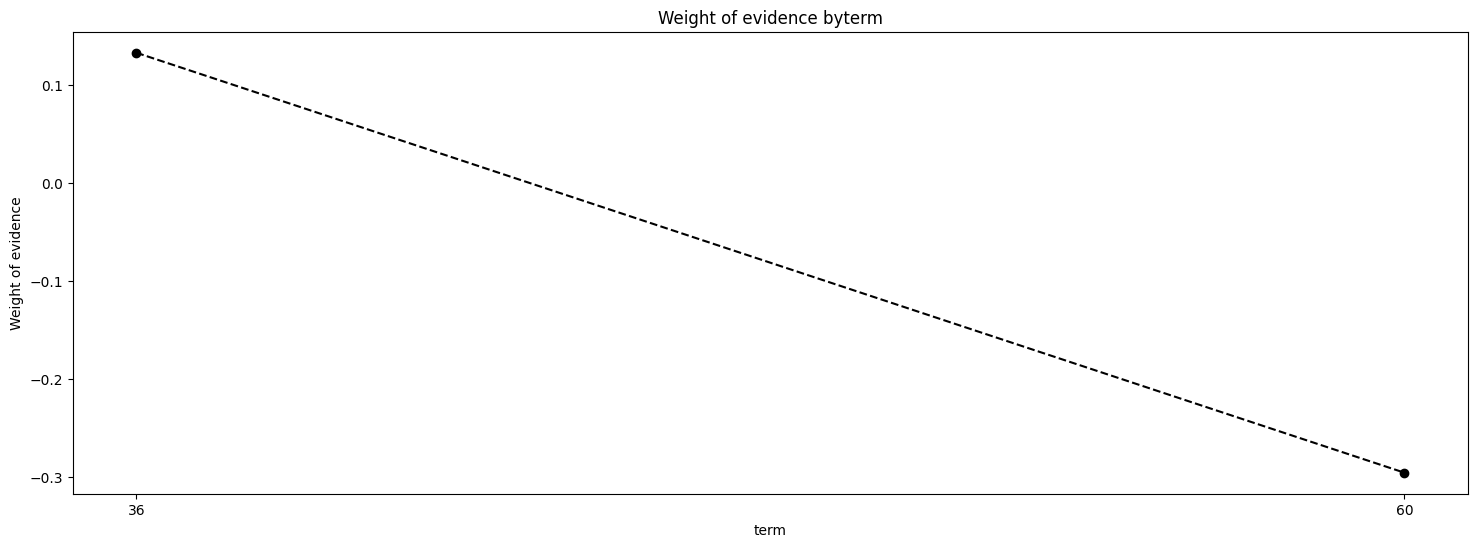

In [135]:
plot_by_woe_continuous(woe_continuous(features_preprocessed, 'term', targets_preprocessed))

In [136]:
# Create variables to indicate which of the 2 periods a loan is made over
features_preprocessed['term:36'] = np.where((features_preprocessed['term']==36),1,0)
features_preprocessed['term:60'] = np.where((features_preprocessed['term']==60),1,0)

In [137]:
# Look at the empt length and get the weight of evidence
woe_empt_length = woe_continuous(features_preprocessed, 'emp_length', targets_preprocessed)
woe_empt_length

emp_length   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0          0.0   45839   0.875434    0.122884   40129.0   5710.0     0.120791   
1          1.0   23770   0.887842    0.063722   21104.0   2666.0     0.063524   
2          2.0   33153   0.891262    0.088875   29548.0   3605.0     0.088941   
3          3.0   29059   0.890086    0.077900   25865.0   3194.0     0.077855   
4          4.0   22426   0.890975    0.060119   19981.0   2445.0     0.060144   
5          5.0   24521   0.884059    0.065735   21678.0   2843.0     0.065252   
6          6.0   20902   0.882308    0.056033   18442.0   2460.0     0.055512   
7          7.0   20973   0.888666    0.056224   18638.0   2335.0     0.056102   
8          8.0   17946   0.889613    0.048109   15965.0   1981.0     0.048056   
9          9.0   14382   0.887220    0.038555   12760.0   1622.0     0.038408   
10        10.0  120057   0.900481    0.321844  108109.0  11948.0     0.325415   

    prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.139920 -0.147012             NaN       NaN  0.007074  
1     0.065329 -0.028008        0.012408  0.119003  0.007074  
2     0.088338  0.006803        0.003420  0.034811  0.007074  
3     0.078267 -0.005275        0.001176  0.012078  0.007074  
4     0.059913  0.003845        0.000889  0.009120  0.007074  
5     0.069666 -0.065454        0.006916  0.069299  0.007074  
6     0.060281 -0.082422        0.001751  0.016969  0.007074  
7     0.057218 -0.019701        0.006358  0.062721  0.007074  
8     0.048543 -0.010095        0.000947  0.009606  0.007074  
9     0.039746 -0.034236        0.002393  0.024142  0.007074  
10    0.292779  0.105684        0.013260  0.139921  0.007074

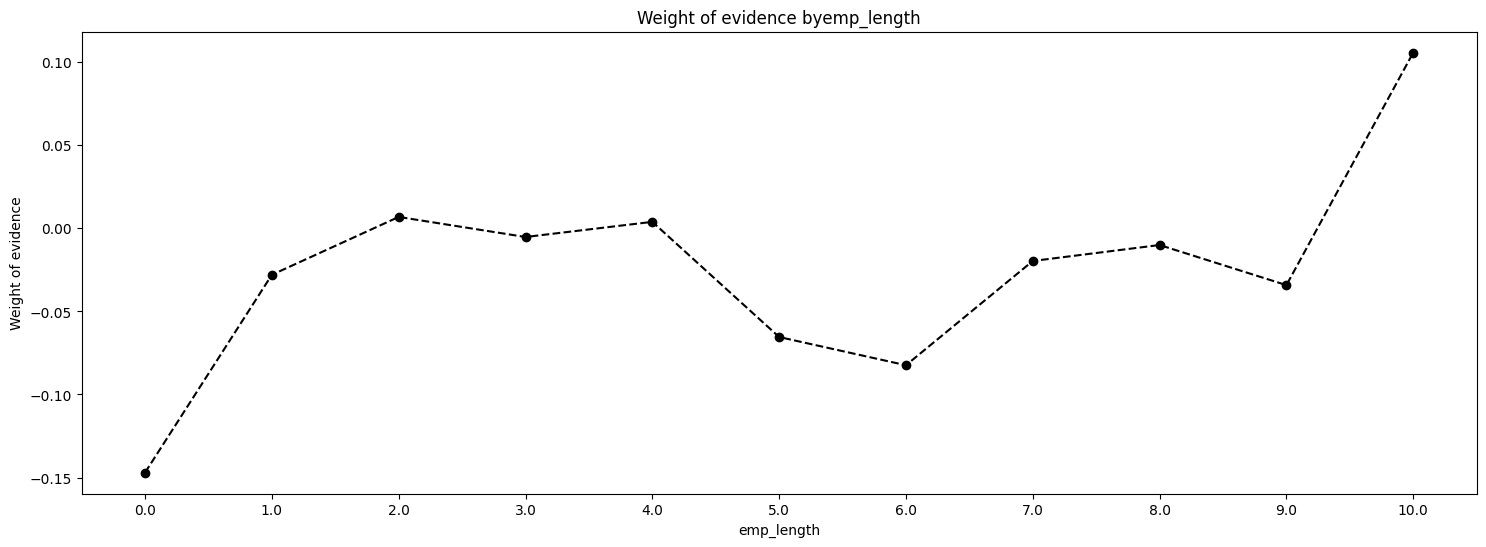

In [139]:
plot_by_woe_continuous(woe_continuous(features_preprocessed, 'emp_length', targets_preprocessed))

In [140]:
# Group the emp length into ranges based on the weight of evidence
features_preprocessed['emp_length:0'] = np.where(features_preprocessed['emp_length'].isin([0]), 1, 0)
features_preprocessed['emp_length:1'] = np.where(features_preprocessed['emp_length'].isin([1]), 1, 0)
features_preprocessed['emp_length:2-4'] = np.where(features_preprocessed['emp_length'].isin(range(2, 5)), 1, 0)
features_preprocessed['emp_length:5-6'] = np.where(features_preprocessed['emp_length'].isin(range(5, 7)), 1, 0)
features_preprocessed['emp_length:7-9'] = np.where(features_preprocessed['emp_length'].isin(range(7, 10)), 1, 0)
features_preprocessed['emp_length:10'] = np.where(features_preprocessed['emp_length'].isin([10]), 1, 0)



In [141]:
# Assign bins to the months since issue d factor
features_preprocessed['mths_since_issue_d_factor'] = pd.cut(features_preprocessed['mths_since_issue_d'],40)

In [142]:
# Then look at the weight of evidence
woe_mths_since_issue_d_factor = woe_continuous(features_preprocessed, 'mths_since_issue_d_factor', targets_preprocessed)
woe_mths_since_issue_d_factor

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0            (38.902, 41.45]  59420   0.936839    0.159291  55667.0  3753.0   
1              (41.45, 43.9]   8516   0.922969    0.022829   7860.0   656.0   
2              (43.9, 46.35]  52379   0.915252    0.140416  47940.0  4439.0   
3              (46.35, 48.8]  30428   0.905055    0.081570  27539.0  2889.0   
4              (48.8, 51.25]  37707   0.898772    0.101084  33890.0  3817.0   
5              (51.25, 53.7]  23671   0.892822    0.063456  21134.0  2537.0   
6              (53.7, 56.15]  21748   0.883484    0.058301  19214.0  2534.0   
7              (56.15, 58.6]  19747   0.875728    0.052937  17293.0  2454.0   
8              (58.6, 61.05]  24484   0.860848    0.065636  21077.0  3407.0   
9              (61.05, 63.5]  12634   0.864572    0.033869  10923.0  1711.0   
10             (63.5, 65.95]  10352   0.858095    0.027751   8883.0  1469.0   
11             (65.95, 68.4]  15038   0.848717    0.040313  12763.0  2275.0   
12             (68.4, 70.85]   4379   0.843572    0.011739   3694.0   685.0   
13             (70.85, 73.3]   9477   0.826633    0.025406   7834.0  1643.0   
14             (73.3, 75.75]   4886   0.848547    0.013098   4146.0   740.0   
15             (75.75, 78.2]   5951   0.833809    0.015953   4962.0   989.0   
16             (78.2, 80.65]   3469   0.854713    0.009300   2965.0   504.0   
17             (80.65, 83.1]   3192   0.854323    0.008557   2727.0   465.0   
18             (83.1, 85.55]   2940   0.848639    0.007881   2495.0   445.0   
19             (85.55, 88.0]   3761   0.846849    0.010082   3185.0   576.0   
20             (88.0, 90.45]   2132   0.867730    0.005715   1850.0   282.0   
21             (90.45, 92.9]   2034   0.866765    0.005453   1763.0   271.0   
22             (92.9, 95.35]   1974   0.831307    0.005292   1641.0   333.0   
23             (95.35, 97.8]   1902   0.855415    0.005099   1627.0   275.0   
24            (97.8, 100.25]   2416   0.850579    0.006477   2055.0   361.0   
25           (100.25, 102.7]   1228   0.899023    0.003292   1104.0   124.0   
26           (102.7, 105.15]   1605   0.871028    0.004303   1398.0   207.0   
27           (105.15, 107.6]    480   0.835417    0.001287    401.0    79.0   
28           (107.6, 110.05]   1065   0.876056    0.002855    933.0   132.0   
29           (110.05, 112.5]    613   0.861338    0.001643    528.0    85.0   
30           (112.5, 114.95]    534   0.876404    0.001432    468.0    66.0   
31           (114.95, 117.4]    682   0.848974    0.001828    579.0   103.0   
32           (117.4, 119.85]    166   0.807229    0.000445    134.0    32.0   
33           (119.85, 122.3]    218   0.848624    0.000584    185.0    33.0   
34           (122.3, 124.75]    216   0.814815    0.000579    176.0    40.0   
35           (124.75, 127.2]    621   0.755233    0.001665    469.0   152.0   
36           (127.2, 129.65]    469   0.761194    0.001257    357.0   112.0   
37           (129.65, 132.1]    235   0.706383    0.000630    166.0    69.0   
38           (132.1, 134.55]    130   0.692308    0.000348     90.0    40.0   
39           (134.55, 137.0]    129   0.806202    0.000346    104.0    25.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.167561    0.091965  0.599940             NaN       NaN  0.114211  
1      0.023659    0.016075  0.386489        0.013871  0.213451  0.114211  
2      0.144302    0.108775  0.282629        0.007716  0.103860  0.114211  
3      0.082894    0.070793  0.157801        0.010198  0.124828  0.114211  
4      0.102011    0.093533  0.086763        0.006282  0.071038  0.114211  
5      0.063615    0.062168  0.023009        0.005950  0.063754  0.114211  
6      0.057835    0.062094 -0.071052        0.009339  0.094061  0.114211  
7      0.052053    0.060134 -0.144309        0.007756  0.073258  0.114211  
8      0.063443    0.083486 -0.274541        0.014880  0.130232  0.114211  
9  

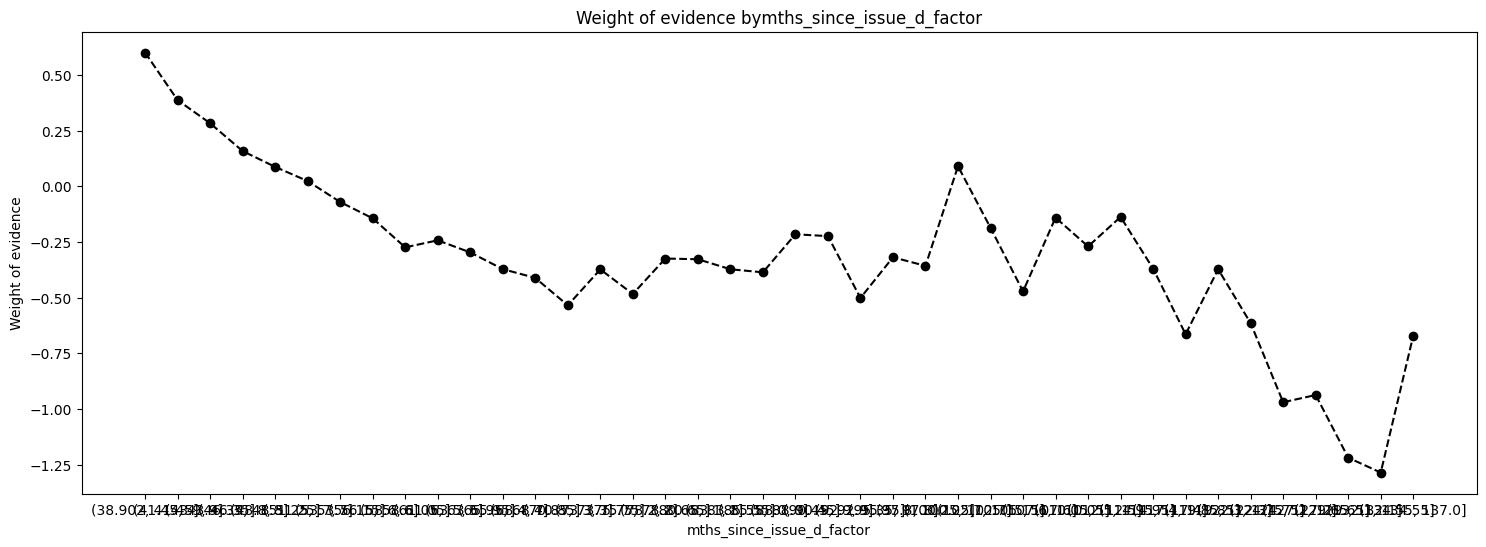

In [143]:
plot_by_woe_continuous(woe_continuous(features_preprocessed, 'mths_since_issue_d_factor', targets_preprocessed))

In [144]:
# Group the interest rate for the loans into categories
features_preprocessed['int_rate:<9.548'] = np.where((features_preprocessed['int_rate'] <= 9.548), 1, 0)
features_preprocessed['int_rate:9.548-12.025'] = np.where((features_preprocessed['int_rate'] > 9.548) & (features_preprocessed['int_rate'] <= 12.025), 1, 0)
features_preprocessed['int_rate:12.025-15.74'] = np.where((features_preprocessed['int_rate'] > 12.025) & (features_preprocessed['int_rate'] <= 15.74), 1, 0)
features_preprocessed['int_rate:15.74-20.281'] = np.where((features_preprocessed['int_rate'] > 15.74) & (features_preprocessed['int_rate'] <= 20.281), 1, 0)
features_preprocessed['int_rate:>20.281'] = np.where((features_preprocessed['int_rate'] > 20.281), 1, 0)

In [145]:
# Assign bins for the funded amount factor and get the weight of evidence
features_preprocessed['funded_amnt_factor'] = pd.cut(features_preprocessed['funded_amnt'], 40)
woe_funded_amnt_factor = woe_continuous(features_preprocessed, 'funded_amnt_factor', targets_preprocessed)
woe_funded_amnt_factor

funded_amnt_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (465.5, 1362.5]   2001   0.902049    0.005364   1805.0   196.0   
1     (1362.5, 2225.0]   5377   0.896039    0.014414   4818.0   559.0   
2     (2225.0, 3087.5]   8967   0.895394    0.024038   8029.0   938.0   
3     (3087.5, 3950.0]   6000   0.889333    0.016085   5336.0   664.0   
4     (3950.0, 4812.5]  11601   0.886217    0.031100  10281.0  1320.0   
5     (4812.5, 5675.0]  17918   0.894575    0.048034  16029.0  1889.0   
6     (5675.0, 6537.5]  18240   0.902138    0.048897  16455.0  1785.0   
7     (6537.5, 7400.0]  13030   0.896393    0.034930  11680.0  1350.0   
8     (7400.0, 8262.5]  18305   0.897733    0.049071  16433.0  1872.0   
9     (8262.5, 9125.0]  12757   0.886259    0.034199  11306.0  1451.0   
10    (9125.0, 9987.5]   8494   0.872616    0.022770   7412.0  1082.0   
11   (9987.5, 10850.0]  33544   0.891605    0.089924  29908.0  3636.0   
12  (10850.0, 11712.5]   9603   0.877747    0.025743   8429.0  1174.0   
13  (11712.5, 12575.0]  24979   0.904640    0.066963  22597.0  2382.0   
14  (12575.0, 13437.5]   7869   0.889058    0.021095   6996.0   873.0   
15  (13437.5, 14300.0]   9767   0.894133    0.026183   8733.0  1034.0   
16  (14300.0, 15162.5]  24353   0.899109    0.065285  21896.0  2457.0   
17  (15162.5, 16025.0]  13481   0.882872    0.036139  11902.0  1579.0   
18  (16025.0, 16887.5]   4252   0.860536    0.011399   3659.0   593.0   
19  (16887.5, 17750.0]   6654   0.876465    0.017838   5832.0   822.0   
20  (17750.0, 18612.5]  12381   0.884743    0.033191  10954.0  1427.0   
21  (18612.5, 19475.0]   5097   0.867765    0.013664   4423.0   674.0   
22  (19475.0, 20337.5]  21345   0.896744    0.057221  19141.0  2204.0   
23  (20337.5, 21200.0]   7533   0.889287    0.020194   6699.0   834.0   
24  (21200.0, 22062.5]   4568   0.872592    0.012246   3986.0   582.0   
25  (22062.5, 22925.0]   2639   0.866995    0.007075   2288.0   351.0   
26  (22925.0, 23787.5]   2864   0.882332    0.007678   2527.0   337.0   
27  (23787.5, 24650.0]  10433   0.899837    0.027968   9388.0  1045.0   
28  (24650.0, 25512.5]  10502   0.888593    0.028153   9332.0  1170.0   
29  (25512.5, 26375.0]   1963   0.869587    0.005262   1707.0   256.0   
30  (26375.0, 27237.5]   2012   0.866302    0.005394   1743.0   269.0   
31  (27237.5, 28100.0]   6655   0.903381    0.017840   6012.0   643.0   
32  (28100.0, 28962.5]    989   0.860465    0.002651    851.0   138.0   
33  (28962.5, 29825.0]   1414   0.859972    0.003791   1216.0   198.0   
34  (29825.0, 30687.5]   7162   0.882156    0.019200   6318.0   844.0   
35  (30687.5, 31550.0]   1111   0.862286    0.002978    958.0   153.0   
36  (31550.0, 32412.5]   1604   0.882170    0.004300   1415.0   189.0   
37  (32412.5, 33275.0]    960   0.904167    0.002574    868.0    92.0   
38  (33275.0, 34137.5]    967   0.868666    0.002592    840.0   127.0   
39  (34137.5, 35000.0]  13637   0.881206    0.036558  12017.0  1620.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.005433    0.004803  0.123309             NaN       NaN  0.010722  
1      0.014502    0.013698  0.057073        0.006010  0.066237  0.010722  
2      0.024168    0.022985  0.050174        0.000644  0.006899  0.010722  
3      0.016062    0.016271 -0.012942        0.006061  0.063116  0.010722  
4      0.030946    0.032346 -0.044226        0.003117  0.031284  0.010722  
5      0.048248    0.046289  0.041460        0.008359  0.085686  0.010722  
6      0.049531    0.043740  0.124319        0.007563  0.082859  0.010722  
7      0.035158    0.033081  0.060882        0.005745  0.063438  0.010722  
8      0.049464    0.045872  0.075392        0.001340  0.014511  0.010722  
9      0.034032    0.035556 -0.043811        0.011474  0.119204  0.010722  
10     0.022311    0.026514 -0.172603        0.013643  0.128791  0.010722  
11     0.090025    0.089098  0.010350        0.018989  0.182953  0.010722  
12     0.025372    0.0

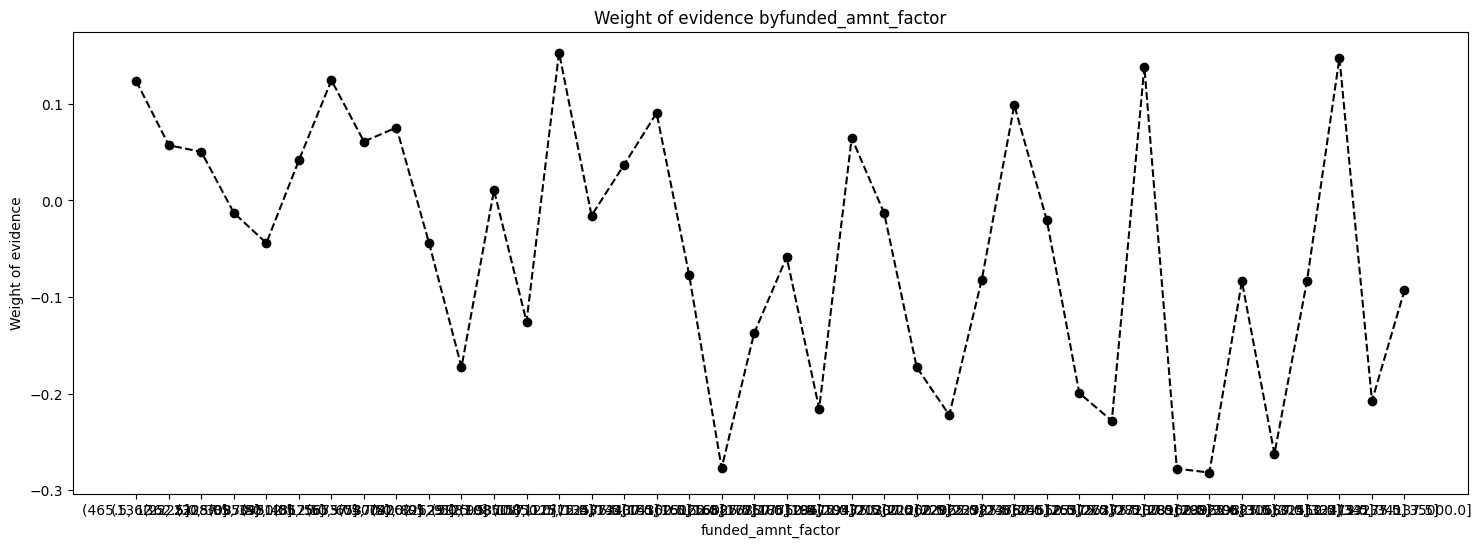

In [146]:
plot_by_woe_continuous(woe_continuous(features_preprocessed, 'funded_amnt_factor', targets_preprocessed))

In [147]:
# Assign bins for the mths since earliest cr line factor
features_preprocessed['mths_since_earliest_cr_line_factor'] = pd.cut(features_preprocessed['mths_since_earliest_cr_line'], 40)

In [148]:
# Then look at the weight of evidence
woe_mths_since_earliest_cr_line_factor = woe_continuous(features_preprocessed, 'mths_since_earliest_cr_line_factor', targets_preprocessed)
woe_mths_since_earliest_cr_line_factor

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                     (-0.638, 15.95]     27   0.888889    0.000072     24.0   
1                       (15.95, 31.9]      0        NaN    0.000000      NaN   
2                       (31.9, 47.85]      0        NaN    0.000000      NaN   
3                       (47.85, 63.8]      0        NaN    0.000000      NaN   
4                       (63.8, 79.75]      3   1.000000    0.000008      3.0   
5                       (79.75, 95.7]   1559   0.906350    0.004179   1413.0   
6                      (95.7, 111.65]   3252   0.865006    0.008718   2813.0   
7                     (111.65, 127.6]   5751   0.864545    0.015417   4972.0   
8                     (127.6, 143.55]  10938   0.863686    0.029322   9447.0   
9                     (143.55, 159.5]  16415   0.871337    0.044005  14303.0   
10                    (159.5, 175.45]  19358   0.879068    0.051894  17017.0   
11                    (175.45, 191.4]  23206   0.884125    0.062210  20517.0   
12                    (191.4, 207.35]  25816   0.884606    0.069207  22837.0   
13                    (207.35, 223.3]  34258   0.883414    0.091838  30264.0   
14                    (223.3, 239.25]  36332   0.887675    0.097398  32251.0   
15                    (239.25, 255.2]  27829   0.887204    0.074603  24690.0   
16                    (255.2, 271.15]  23689   0.889527    0.063505  21072.0   
17                    (271.15, 287.1]  22747   0.893744    0.060979  20330.0   
18                    (287.1, 303.05]  21520   0.900697    0.057690  19383.0   
19                    (303.05, 319.0]  16750   0.901791    0.044903  15105.0   
20                    (319.0, 334.95]  11491   0.904360    0.030805  10392.0   
21                    (334.95, 350.9]  10344   0.903326    0.027730   9344.0   
22                    (350.9, 366.85]  10846   0.905864    0.029076   9825.0   
23                    (366.85, 382.8]   8725   0.902579    0.023390   7875.0   
24                    (382.8, 398.75]   7754   0.911401    0.020787   7067.0   
25                    (398.75, 414.7]   6372   0.908663    0.017082   5790.0   
26                    (414.7, 430.65]   5323   0.905504    0.014270   4820.0   
27                    (430.65, 446.6]   4525   0.909171    0.012130   4114.0   
28                    (446.6, 462.55]   3721   0.912389    0.009975   3395.0   
29                    (462.55, 478.5]   2544   0.917060    0.006820   2333.0   
30                    (478.5, 494.45]   1876   0.913113    0.005029   1713.0   
31                    (494.45, 510.4]   2011   0.912481    0.005391   1835.0   
32                    (510.4, 526.35]   1902   0.909569    0.005099   1730.0   
33                    (526.35, 542.3]   1388   0.917147    0.003721   1273.0   
34                    (542.3, 558.25]    932   0.919528    0.002498    857.0   
35                    (558.25, 574.2]    833   0.899160    0.002233    749.0   
36                    (574.2, 590.15]    748   0.911765    0.002005    682.0   
37                    (590.15, 606.1]    507   0.899408    0.001359    456.0   
38                    (606.1, 622.05]    402   0.880597    0.001078    354.0   
39                    (622.05, 638.0]   1334   0.880060    0.003576   1174.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      3.0     0.000072    0.000074 -0.017450             NaN       NaN  inf  
1      NaN          NaN         NaN       NaN             NaN       NaN  inf  
2      NaN          NaN         NaN       NaN             NaN       NaN  inf  
3      NaN          NaN         NaN       NaN             NaN       NaN  inf  
4      0.0     0.000009    0.000000       inf             NaN       NaN  inf  
5    146.0     0.004253    0.003578  0.172972        0.093650       inf  inf  
6    439.0     0.008467    0.010757 -0.239384        0.041344  0.412356  inf  
7    779.0     0.014966    0.019089 -0.243325        0.000461  0.003941  inf  
8   1491.0 

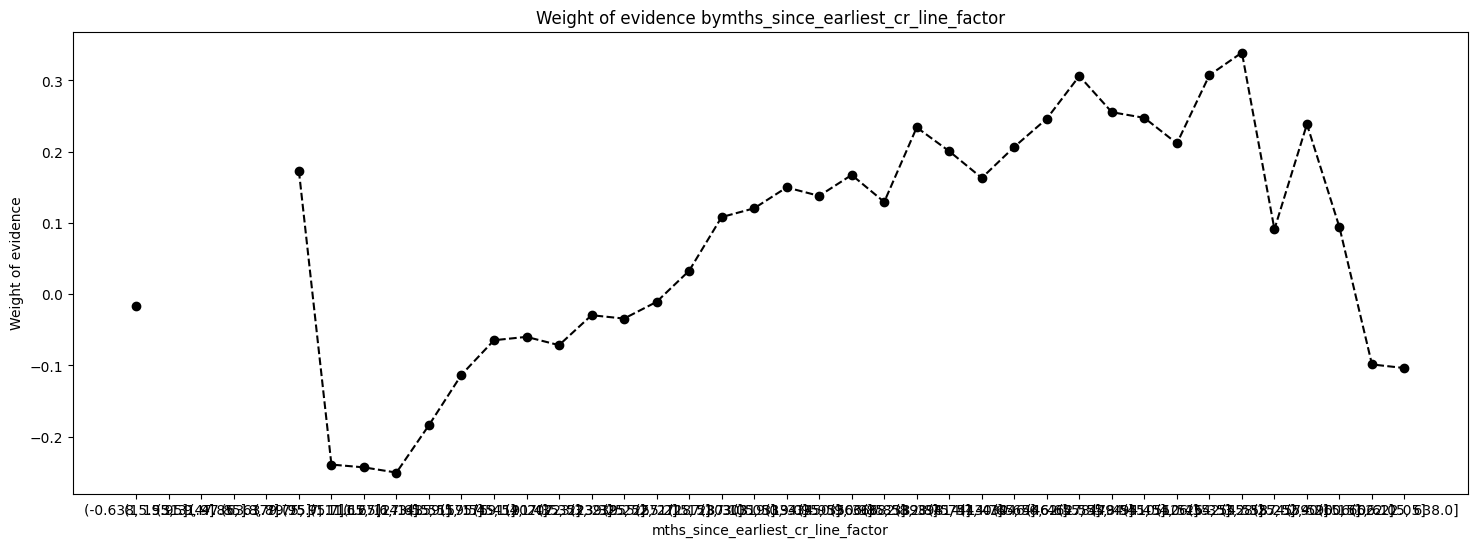

In [149]:
plot_by_woe_continuous(woe_continuous(features_preprocessed, 'mths_since_earliest_cr_line_factor', targets_preprocessed))

In [150]:
# Group the months since earliest cr line into categories
features_preprocessed['mths_since_earliest_cr_line:<140'] = np.where(features_preprocessed['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
features_preprocessed['mths_since_earliest_cr_line:141-164'] = np.where(features_preprocessed['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
features_preprocessed['mths_since_earliest_cr_line:165-247'] = np.where(features_preprocessed['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
features_preprocessed['mths_since_earliest_cr_line:248-270'] = np.where(features_preprocessed['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
features_preprocessed['mths_since_earliest_cr_line:271-352'] = np.where(features_preprocessed['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
features_preprocessed['mths_since_earliest_cr_line:>352'] = np.where(features_preprocessed['mths_since_earliest_cr_line'].isin(range(353, int(features_preprocessed['mths_since_earliest_cr_line'].max()))), 1, 0)

In [151]:
# Look at the weight of evidence for delinquencies in the last 2 years
woe_delinq_2yrs = woe_continuous(features_preprocessed, 'delinq_2yrs', targets_preprocessed)
woe_delinq_2yrs

delinq_2yrs   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0           0.0  306227   0.890431    0.820922  272674.0  33553.0   
1           1.0   45135   0.892456    0.120996   40281.0   4854.0   
2           2.0   13033   0.889281    0.034938   11590.0   1443.0   
3           3.0    4542   0.885293    0.012176    4021.0    521.0   
4           4.0    1885   0.898143    0.005053    1693.0    192.0   
5           5.0     998   0.890782    0.002675     889.0    109.0   
6           6.0     520   0.892308    0.001394     464.0     56.0   
7           7.0     281   0.882562    0.000753     248.0     33.0   
8           8.0     145   0.910345    0.000389     132.0     13.0   
9           9.0      94   0.893617    0.000252      84.0     10.0   
10         10.0      55   0.836364    0.000147      46.0      9.0   
11         11.0      33   0.939394    0.000088      31.0      2.0   
12         12.0      31   0.741935    0.000083      23.0      8.0   
13         13.0      20   0.850000    0.000054      17.0      3.0   
14         14.0       7   0.857143    0.000019       6.0      1.0   
15         15.0       4   1.000000    0.000011       4.0      0.0   
16         16.0       4   1.000000    0.000011       4.0      0.0   
17         17.0       1   1.000000    0.000003       1.0      0.0   
18         18.0       6   0.833333    0.000016       5.0      1.0   
19         19.0       3   1.000000    0.000008       3.0      0.0   
20         21.0       2   0.500000    0.000005       1.0      1.0   
21         22.0       1   1.000000    0.000003       1.0      0.0   
22         24.0       1   1.000000    0.000003       1.0      0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.820766    0.822196 -0.001741             NaN       NaN  inf  
1      0.121248    0.118944  0.019185        0.002025  0.020926  inf  
2      0.034887    0.035360 -0.013473        0.003175  0.032658  inf  
3      0.012103    0.012767 -0.053356        0.003988  0.039883  inf  
4      0.005096    0.004705  0.079870        0.012850  0.133226  inf  
5      0.002676    0.002671  0.001858        0.007362  0.078013  inf  
6      0.001397    0.001372  0.017641        0.001526  0.015784  inf  
7      0.000746    0.000809 -0.079971        0.009745  0.097612  inf  
8      0.000397    0.000319  0.220961        0.027783  0.300931  inf  
9      0.000253    0.000245  0.031340        0.016728  0.189621  inf  
10     0.000138    0.000221 -0.465475        0.057253  0.496815  inf  
11     0.000093    0.000049  0.643948        0.103030  1.109423  inf  
12     0.000069    0.000196 -1.040839        0.197458  1.684787  inf  
13     0.000051    0.000074 -0.362291        0.108065  0.678548  inf  
14     0.000018    0.000025 -0.305132        0.007143  0.057158  inf  
15     0.000012    0.000000       inf        0.142857       inf  inf  
16     0.000012    0.000000       inf        0.000000       NaN  inf  
17     0.000003    0.000000       inf        0.000000       NaN  inf  
18     0.000015    0.000025 -0.487454        0.166667       inf  inf  
19     0.000009    0.000000       inf        0.166667       inf  inf  
20     0.000003    0.000025 -2.096892        0.500000       inf  inf  
21     0.000003    0.000000       inf        0.500000       inf  inf  
22     0.000003    0.000000       inf        0.000000       NaN  inf

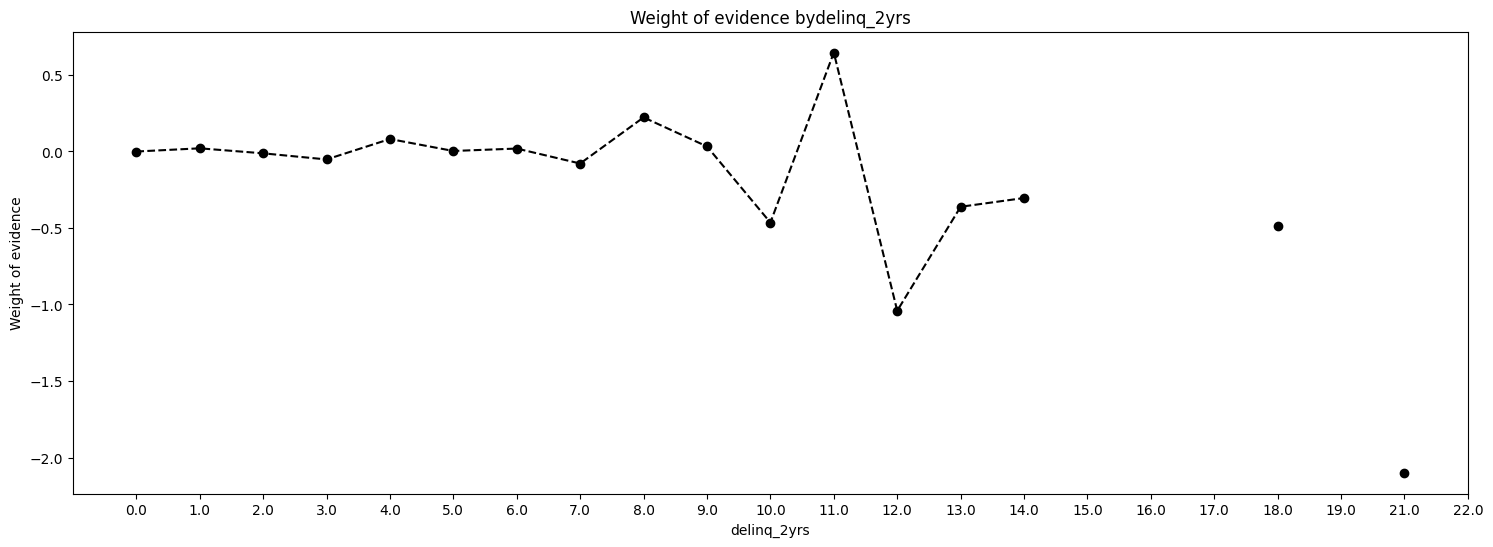

In [152]:
plot_by_woe_continuous(woe_continuous(features_preprocessed, 'delinq_2yrs', targets_preprocessed))

In [153]:
# Group the number of deliquencies over the last 2 years into various categories
features_preprocessed['delinq_2yrs:0'] = np.where((features_preprocessed['delinq_2yrs'] == 0), 1, 0)
features_preprocessed['delinq_2yrs:1-3'] = np.where((features_preprocessed['delinq_2yrs'] >= 1) & (features_preprocessed['delinq_2yrs'] <= 3), 1, 0)
features_preprocessed['delinq_2yrs:>=4'] = np.where((features_preprocessed['delinq_2yrs'] >= 9), 1, 0)

In [154]:
# Look at the weight of evidence for the number of enquiries made over the last 6 months
woe_inq_last_6mths = woe_continuous(features_preprocessed, 'inq_last_6mths', targets_preprocessed)
woe_inq_last_6mths

inq_last_6mths   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0              0.0  193232   0.908618    0.518009  175574.0  17658.0   
1              1.0  104059   0.884441    0.278958   92034.0  12025.0   
2              2.0   46204   0.863064    0.123862   39877.0   6327.0   
3              3.0   20218   0.842220    0.054200   17028.0   3190.0   
4              4.0    5765   0.844059    0.015455    4866.0    899.0   
5              5.0    2192   0.829836    0.005876    1819.0    373.0   
6              6.0     971   0.787848    0.002603     765.0    206.0   
7              7.0     163   0.650307    0.000437     106.0     57.0   
8              8.0     104   0.653846    0.000279      68.0     36.0   
9              9.0      43   0.674419    0.000115      29.0     14.0   
10            10.0      20   0.900000    0.000054      18.0      2.0   
11            11.0       9   0.888889    0.000024       8.0      1.0   
12            12.0      15   0.600000    0.000040       9.0      6.0   
13            13.0       5   0.600000    0.000013       3.0      2.0   
14            14.0       5   0.200000    0.000013       1.0      4.0   
15            15.0       8   0.500000    0.000021       4.0      4.0   
16            16.0       2   1.000000    0.000005       2.0      0.0   
17            17.0       1   0.000000    0.000003       0.0      1.0   
18            18.0       2   0.500000    0.000005       1.0      1.0   
19            19.0       2   1.000000    0.000005       2.0      0.0   
20            24.0       2   1.000000    0.000005       2.0      0.0   
21            25.0       1   0.000000    0.000003       0.0      1.0   
22            27.0       1   1.000000    0.000003       1.0      0.0   
23            28.0       1   1.000000    0.000003       1.0      0.0   
24            31.0       1   1.000000    0.000003       1.0      0.0   
25            32.0       1   0.000000    0.000003       0.0      1.0   
26            33.0       1   0.000000    0.000003       0.0      1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.528489    0.432699  0.199980             NaN       NaN  inf  
1      0.277028    0.294665 -0.061721        0.024177  0.261701  inf  
2      0.120032    0.155039 -0.255918        0.021377  0.194197  inf  
3      0.051255    0.078169 -0.422054        0.020844  0.166135  inf  
4      0.014647    0.022029 -0.408147        0.001839  0.013906  inf  
5      0.005475    0.009140 -0.512428        0.014223  0.104281  inf  
6      0.002303    0.005048 -0.784892        0.041988  0.272464  inf  
7      0.000319    0.001397 -1.476504        0.137541  0.691612  inf  
8      0.000205    0.000882 -1.460903        0.003539  0.015601  inf  
9      0.000087    0.000343 -1.368653        0.020572  0.092250  inf  
10     0.000054    0.000049  0.100333        0.225581  1.468986  inf  
11     0.000024    0.000025 -0.017450        0.011111  0.117783  inf  
12     0.000027    0.000147 -1.691427        0.288889  1.673976  inf  
13     0.000009    0.000049 -1.691427        0.000000  0.000000  inf  
14     0.000003    0.000098 -3.483186        0.400000  1.791759  inf  
15     0.000012    0.000098 -2.096892        0.300000  1.386294  inf  
16     0.000006    0.000000       inf        0.500000       inf  inf  
17     0.000000    0.000025      -inf        1.000000       inf  inf  
18     0.000003    0.000025 -2.096892        0.500000       inf  inf  
19     0.000006    0.000000       inf        0.500000       inf  inf  
20     0.000006    0.000000       inf        0.000000       NaN  inf  
21     0.000000    0.000025      -inf        1.000000       inf  inf  
22     0.000003    0.000000       inf        1.000000       inf  inf  
23     0.000003    0.000000       inf        0.000000       NaN  inf  
24     0.000003    0.000000       inf        0.000000       NaN  inf  
25     0.000000    0.000025      -inf        1.000000       inf  inf  
26     0.000000    0.000025      -inf        0.000000       NaN  inf

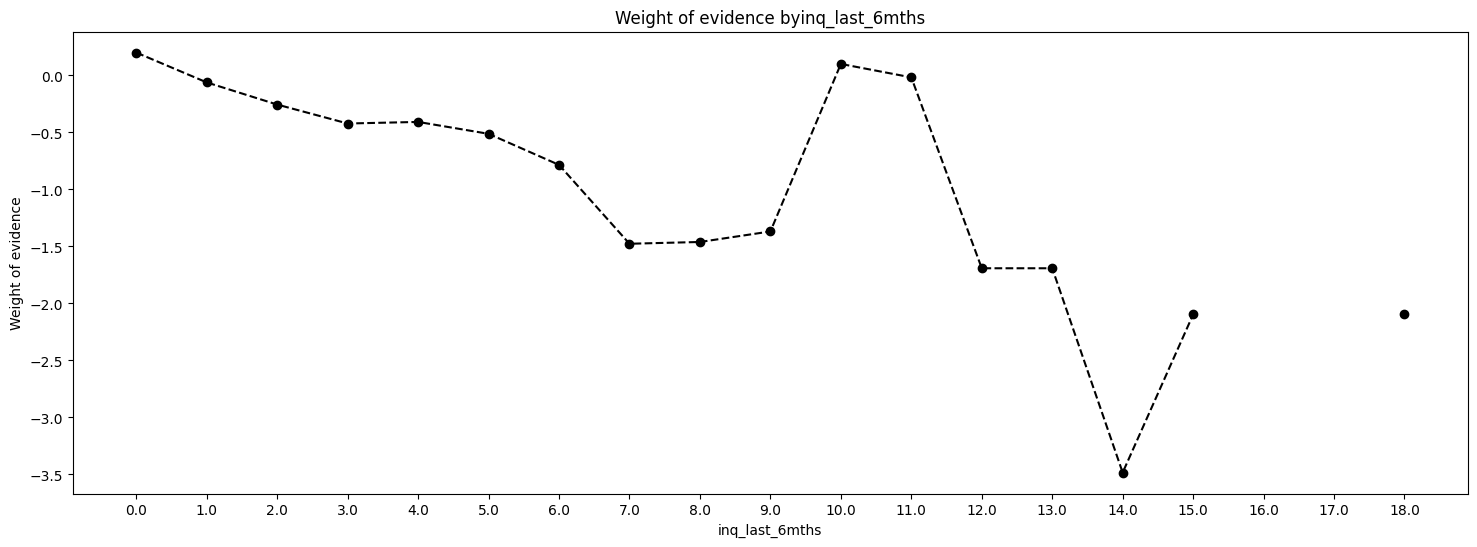

In [155]:
plot_by_woe_continuous(woe_continuous(features_preprocessed, 'inq_last_6mths', targets_preprocessed))

In [156]:
# Group the number of inquiries in the last 6 months based on the weight of evidence
features_preprocessed['inq_last_6mths:0'] = np.where((features_preprocessed['inq_last_6mths'] == 0), 1, 0)
features_preprocessed['inq_last_6mths:1-2'] = np.where((features_preprocessed['inq_last_6mths'] >= 1) & (features_preprocessed['inq_last_6mths'] <= 2), 1, 0)
features_preprocessed['inq_last_6mths:3-6'] = np.where((features_preprocessed['inq_last_6mths'] >= 3) & (features_preprocessed['inq_last_6mths'] <= 6), 1, 0)
features_preprocessed['inq_last_6mths:>6'] = np.where((features_preprocessed['inq_last_6mths'] > 6), 1, 0)

In [157]:
# Look at the weight of evidence for the number of accounts open
woe_open_acc = woe_continuous(features_preprocessed, 'open_acc', targets_preprocessed)
woe_open_acc

open_acc  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        0.0     33   0.787879    0.000088     26.0     7.0     0.000078   
1        1.0    117   0.880342    0.000314    103.0    14.0     0.000310   
2        2.0   1425   0.840000    0.003820   1197.0   228.0     0.003603   
3        3.0   4381   0.869664    0.011744   3810.0   571.0     0.011468   
4        4.0  10085   0.891026    0.027036   8986.0  1099.0     0.027048   
5        5.0  17165   0.891756    0.046015  15307.0  1858.0     0.046075   
6        6.0  24586   0.890507    0.065909  21894.0  2692.0     0.065902   
7        7.0  30160   0.890451    0.080852  26856.0  3304.0     0.080838   
8        8.0  33442   0.891753    0.089650  29822.0  3620.0     0.089766   
9        9.0  35058   0.888471    0.093982  31148.0  3910.0     0.093757   
10      10.0  34085   0.888514    0.091374  30285.0  3800.0     0.091160   
11      11.0  31361   0.888843    0.084071  27875.0  3486.0     0.083905   
12      12.0  27668   0.889547    0.074171  24612.0  3056.0     0.074084   
13      13.0  23849   0.894377    0.063934  21330.0  2519.0     0.064205   
14      14.0  19860   0.890483    0.053240  17685.0  2175.0     0.053233   
15      15.0  16136   0.890865    0.043257  14375.0  1761.0     0.043270   
16      16.0  13545   0.894278    0.036311  12113.0  1432.0     0.036461   
17      17.0  10739   0.891610    0.028789   9575.0  1164.0     0.028821   
18      18.0   8709   0.898151    0.023347   7822.0   887.0     0.023545   
19      19.0   6842   0.895498    0.018342   6127.0   715.0     0.018443   
20      20.0   5391   0.896680    0.014452   4834.0   557.0     0.014551   
21      21.0   4231   0.892224    0.011342   3775.0   456.0     0.011363   
22      22.0   3282   0.888787    0.008798   2917.0   365.0     0.008780   
23      23.0   2516   0.897854    0.006745   2259.0   257.0     0.006800   
24      24.0   1973   0.894070    0.005289   1764.0   209.0     0.005310   
25      25.0   1582   0.891277    0.004241   1410.0   172.0     0.004244   
26      26.0   1044   0.903257    0.002799    943.0   101.0     0.002838   
27      27.0    836   0.898325    0.002241    751.0    85.0     0.002261   
28      28.0    627   0.902711    0.001681    566.0    61.0     0.001704   
29      29.0    484   0.892562    0.001297    432.0    52.0     0.001300   
30      30.0    375   0.877333    0.001005    329.0    46.0     0.000990   
31      31.0    279   0.896057    0.000748    250.0    29.0     0.000753   
32      32.0    239   0.920502    0.000641    220.0    19.0     0.000662   
33      33.0    182   0.862637    0.000488    157.0    25.0     0.000473   
34      34.0    137   0.883212    0.000367    121.0    16.0     0.000364   
35      35.0    122   0.934426    0.000327    114.0     8.0     0.000343   
36      36.0    106   0.867925    0.000284     92.0    14.0     0.000277   
37      37.0     78   0.871795    0.000209     68.0    10.0     0.000205   
38      38.0     63   0.857143    0.000169     54.0     9.0     0.000163   
39      39.0     57   0.929825    0.000153     53.0     4.0     0.000160   
40      40.0     32   0.875000    0.000086     28.0     4.0     0.000084   
41      41.0     28   0.857143    0.000075     24.0     4.0     0.000072   
42      42.0     24   0.958333    0.000064     23.0     1.0     0.000069   
43      43.0     17   0.941176    0.000046     16.0     1.0     0.000048   
44      44.0     11   0.909091    0.000029     10.0     1.0     0.000030   
45      45.0     16   0.875000    0.000043     14.0     2.0     0.000042   
46      46.0      7   1.000000    0.000019      7.0     0.0     0.000021   
47      47.0      5   0.800000    0.000013      4.0     1.0     0.000012   
48      48.0      5   1.000000    0.000013      5.0     0.0     0.000015   
49      49.0      7   1.000000    0.000019      7.0     0.0     0.000021   
50      50.0      5   1.000000    0.000013      5.0     0.0     0.000015   
51      51.0      4   1.000000    0.000011      4.0 

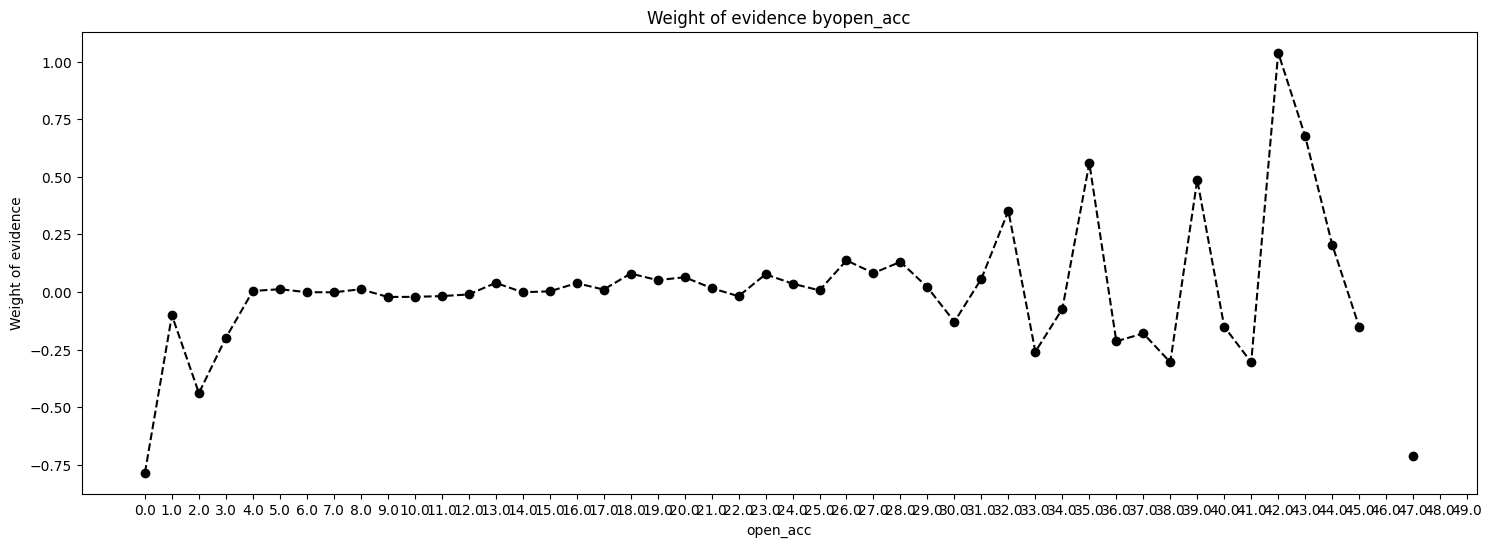

In [158]:
plot_by_woe_continuous(woe_continuous(features_preprocessed, 'open_acc', targets_preprocessed))

In [159]:
# Group the number of accounts opened for each borrnowe into a ranges based on the weight of evidence
features_preprocessed['open_acc:0'] = np.where((features_preprocessed['open_acc'] == 0), 1, 0)
features_preprocessed['open_acc:1-3'] = np.where((features_preprocessed['open_acc'] >= 1) & (features_preprocessed['open_acc'] <= 3), 1, 0)
features_preprocessed['open_acc:4-12'] = np.where((features_preprocessed['open_acc'] >= 4) & (features_preprocessed['open_acc'] <= 12), 1, 0)
features_preprocessed['open_acc:13-17'] = np.where((features_preprocessed['open_acc'] >= 13) & (features_preprocessed['open_acc'] <= 17), 1, 0)
features_preprocessed['open_acc:18-22'] = np.where((features_preprocessed['open_acc'] >= 18) & (features_preprocessed['open_acc'] <= 22), 1, 0)
features_preprocessed['open_acc:23-25'] = np.where((features_preprocessed['open_acc'] >= 23) & (features_preprocessed['open_acc'] <= 25), 1, 0)
features_preprocessed['open_acc:26-30'] = np.where((features_preprocessed['open_acc'] >= 26) & (features_preprocessed['open_acc'] <= 30), 1, 0)
features_preprocessed['open_acc:>=31'] = np.where((features_preprocessed['open_acc'] >= 31), 1, 0)

In [160]:
# Then look at the weight of evidence for the number of entries in the public record for each borrower
wor_pub_rec = woe_continuous(features_preprocessed, 'pub_rec', targets_preprocessed)
wor_pub_rec

pub_rec   n_obs  prop_good  prop_n_obs    n_good    n_bad  prop_n_good  \
0       0.0  324059   0.889656    0.868726  288301.0  35758.0     0.867804   
1       1.0   42285   0.895069    0.113356   37848.0   4437.0     0.113925   
2       2.0    4523   0.903825    0.012125    4088.0    435.0     0.012305   
3       3.0    1304   0.919479    0.003496    1199.0    105.0     0.003609   
4       4.0     409   0.914425    0.001096     374.0     35.0     0.001126   
5       5.0     216   0.898148    0.000579     194.0     22.0     0.000584   
6       6.0     110   0.927273    0.000295     102.0      8.0     0.000307   
7       7.0      49   0.897959    0.000131      44.0      5.0     0.000132   
8       8.0      26   0.961538    0.000070      25.0      1.0     0.000075   
9       9.0      15   0.800000    0.000040      12.0      3.0     0.000036   
10     10.0      12   1.000000    0.000032      12.0      0.0     0.000036   
11     11.0       5   1.000000    0.000013       5.0      0.0     0.000015   
12     12.0       2   1.000000    0.000005       2.0      0.0     0.000006   
13     13.0       2   1.000000    0.000005       2.0      0.0     0.000006   
14     14.0       1   1.000000    0.000003       1.0      0.0     0.000003   
15     15.0       1   1.000000    0.000003       1.0      0.0     0.000003   
16     16.0       1   1.000000    0.000003       1.0      0.0     0.000003   
17     17.0       1   1.000000    0.000003       1.0      0.0     0.000003   
18     18.0       2   1.000000    0.000005       2.0      0.0     0.000006   
19     21.0       1   1.000000    0.000003       1.0      0.0     0.000003   
20     40.0       1   1.000000    0.000003       1.0      0.0     0.000003   
21     49.0       1   1.000000    0.000003       1.0      0.0     0.000003   
22     54.0       1   1.000000    0.000003       1.0      0.0     0.000003   
23     63.0       1   1.000000    0.000003       1.0      0.0     0.000003   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.876228 -0.009661             NaN       NaN  inf  
1     0.108726  0.046708        0.005413  0.056369  inf  
2     0.010659  0.143573        0.008756  0.096865  inf  
3     0.002573  0.338391        0.015654  0.194818  inf  
4     0.000858  0.272016        0.005053  0.066375  inf  
5     0.000539  0.079924        0.016277  0.192092  inf  
6     0.000196  0.448640        0.029125  0.368716  inf  
7     0.000123  0.077860        0.029314  0.370780  inf  
8     0.000025  1.121984        0.063579  1.044124  inf  
9     0.000074 -0.710597        0.161538  1.832581  inf  
10    0.000000       inf        0.200000       inf  inf  
11    0.000000       inf        0.000000       NaN  inf  
12    0.000000       inf        0.000000       NaN  inf  
13    0.000000       inf        0.000000       NaN  inf  
14    0.000000       inf        0.000000       NaN  inf  
15    0.000000       inf        0.000000       NaN  inf  
16    0.000000       inf        0.000000       NaN  inf  
17    0.000000       inf        0.000000       NaN  inf  
18    0.000000       inf        0.000000       NaN  inf  
19    0.000000       inf        0.000000       NaN  inf  
20    0.000000       inf        0.000000       NaN  inf  
21    0.000000       inf        0.000000       NaN  inf  
22    0.000000       inf        0.000000       NaN  inf  
23    0.000000       inf        0.000000       NaN  inf

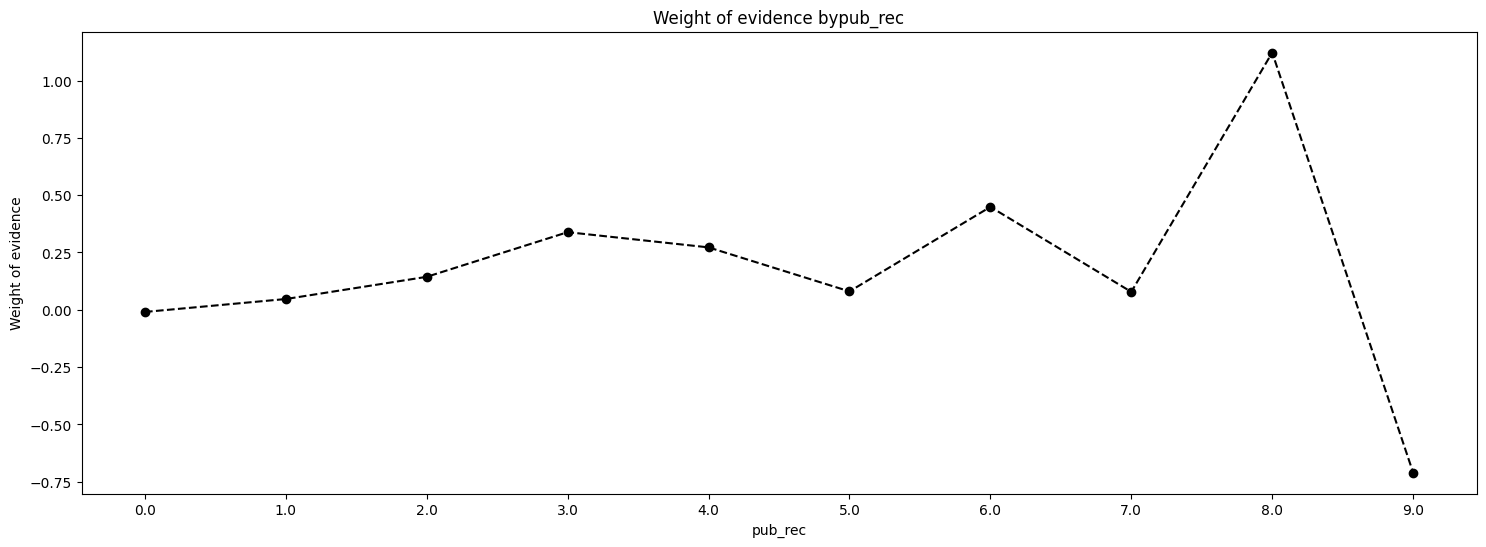

In [161]:
plot_by_woe_continuous(woe_continuous(features_preprocessed, 'pub_rec', targets_preprocessed))

In [162]:
# Assign groups based on the weight of evidence for the public record
features_preprocessed['pub_rec:0-2'] = np.where((features_preprocessed['pub_rec'] >= 0) & (features_preprocessed['pub_rec'] <= 2), 1, 0)
features_preprocessed['pub_rec:3-4'] = np.where((features_preprocessed['pub_rec'] >= 3) & (features_preprocessed['pub_rec'] <= 4), 1, 0)
features_preprocessed['pub_rec:>=5'] = np.where((features_preprocessed['pub_rec'] >= 5), 1, 0)

In [163]:
# Assign bins for the total acc factor
features_preprocessed['total_acc_factor'] = pd.cut(features_preprocessed['total_acc'], 40)

In [164]:
# Then look at the weight of evidence
woe_total_acc_factor = woe_continuous(features_preprocessed, 'total_acc_factor', targets_preprocessed)
woe_total_acc_factor

total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (-0.156, 3.9]    460   0.789130    0.001233    363.0    97.0   
1        (3.9, 7.8]   9918   0.867110    0.026588   8600.0  1318.0   
2       (7.8, 11.7]  26986   0.875343    0.072343  23622.0  3364.0   
3      (11.7, 15.6]  42694   0.882302    0.114453  37669.0  5025.0   
4      (15.6, 19.5]  52223   0.888114    0.139998  46380.0  5843.0   
5      (19.5, 23.4]  54378   0.890526    0.145775  48425.0  5953.0   
6      (23.4, 27.3]  49530   0.892893    0.132778  44225.0  5305.0   
7      (27.3, 31.2]  40789   0.895805    0.109346  36539.0  4250.0   
8      (31.2, 35.1]  31215   0.898703    0.083680  28053.0  3162.0   
9      (35.1, 39.0]  22337   0.900255    0.059880  20109.0  2228.0   
10     (39.0, 42.9]  12213   0.900761    0.032740  11001.0  1212.0   
11     (42.9, 46.8]  11452   0.896525    0.030700  10267.0  1185.0   
12     (46.8, 50.7]   7360   0.900272    0.019730   6626.0   734.0   
13     (50.7, 54.6]   4566   0.906921    0.012240   4141.0   425.0   
14     (54.6, 58.5]   2752   0.901890    0.007377   2482.0   270.0   
15     (58.5, 62.4]   2035   0.890909    0.005455   1813.0   222.0   
16     (62.4, 66.3]   1436   0.890669    0.003850   1279.0   157.0   
17     (66.3, 70.2]    262   0.919847    0.000702    241.0    21.0   
18     (70.2, 74.1]    149   0.912752    0.000399    136.0    13.0   
19     (74.1, 78.0]     97   0.896907    0.000260     87.0    10.0   
20     (78.0, 81.9]     54   0.870370    0.000145     47.0     7.0   
21     (81.9, 85.8]     36   0.944444    0.000097     34.0     2.0   
22     (85.8, 89.7]     30   0.933333    0.000080     28.0     2.0   
23     (89.7, 93.6]     25   0.920000    0.000067     23.0     2.0   
24     (93.6, 97.5]      9   0.888889    0.000024      8.0     1.0   
25    (97.5, 101.4]      7   0.857143    0.000019      6.0     1.0   
26   (101.4, 105.3]      6   1.000000    0.000016      6.0     0.0   
27   (105.3, 109.2]      1   1.000000    0.000003      1.0     0.0   
28   (109.2, 113.1]      0        NaN    0.000000      NaN     NaN   
29   (113.1, 117.0]      2   1.000000    0.000005      2.0     0.0   
30   (117.0, 120.9]      2   1.000000    0.000005      2.0     0.0   
31   (120.9, 124.8]      2   1.000000    0.000005      2.0     0.0   
32   (124.8, 128.7]      0        NaN    0.000000      NaN     NaN   
33   (128.7, 132.6]      0        NaN    0.000000      NaN     NaN   
34   (132.6, 136.5]      0        NaN    0.000000      NaN     NaN   
35   (136.5, 140.4]      0        NaN    0.000000      NaN     NaN   
36   (140.4, 144.3]      0        NaN    0.000000      NaN     NaN   
37   (144.3, 148.2]      0        NaN    0.000000      NaN     NaN   
38   (148.2, 152.1]      1   1.000000    0.000003      1.0     0.0   
39   (152.1, 156.0]      1   1.000000    0.000003      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.001093    0.002377 -0.777200             NaN       NaN  inf  
1      0.025887    0.032297 -0.221245        0.077980  0.555955  inf  
2      0.071104    0.082433 -0.147844        0.008232  0.073401  inf  
3      0.113386    0.123135 -0.082480        0.006959  0.065364  inf  
4      0.139607    0.143179 -0.025268        0.005812  0.057212  inf  
5      0.145762    0.145875 -0.000771        0.002411  0.024497  inf  
6      0.133120    0.129996  0.023749        0.002368  0.024520  inf  
7      0.109985    0.104144  0.054569        0.002912  0.030821  inf  
8      0.084441    0.077483  0.085999        0.002897  0.031430  inf  
9      0.060529    0.054596  0.103171        0.001553  0.017172  inf  
10     0.033114    0.029699  0.108823        0.000506  0.005651  inf  
11     0.030904    0.029038  0.062300        0.004237  0.046522  inf  
12     0.019945    0.017986  0.103356        0.003747  0.041055  inf  
13     0.012465    0.010414  0.179712        0.006649  0.076356  inf  
14     0.007471    0.006616  0.121506        0.005031  0.058205  in

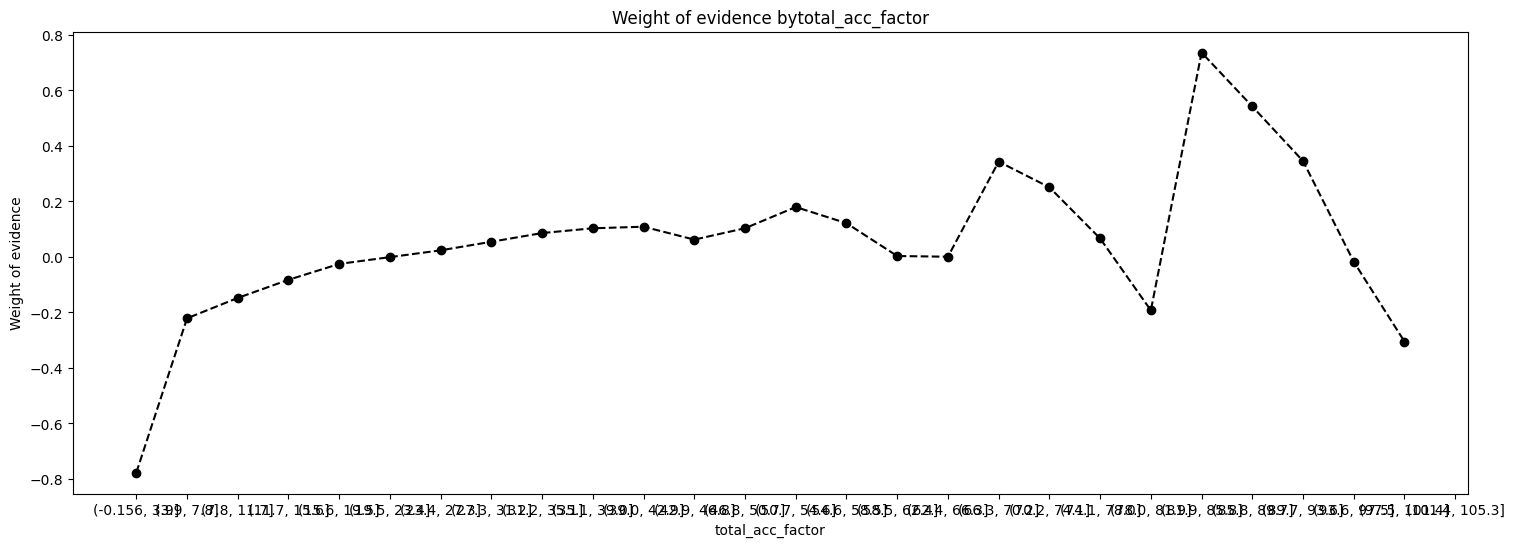

In [165]:
plot_by_woe_continuous(woe_continuous(features_preprocessed, 'total_acc_factor', targets_preprocessed))

In [166]:
# Group the total acc into categories based on the weight of evidence
features_preprocessed['total_acc:<=27'] = np.where((features_preprocessed['total_acc'] <= 27), 1, 0)
features_preprocessed['total_acc:28-51'] = np.where((features_preprocessed['total_acc'] >= 28) & (features_preprocessed['total_acc'] <= 51), 1, 0)
features_preprocessed['total_acc:>=52'] = np.where((features_preprocessed['total_acc'] >= 52), 1, 0)

In [167]:
# Look at at the the weight of evidence for how many accounts the borrower is in delinquent for
woe_acc_now_delinq = woe_continuous(features_preprocessed, 'acc_now_delinq', targets_preprocessed)
woe_acc_now_delinq

acc_now_delinq   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0             0.0  371667   0.890553    0.996351  330989.0  40678.0   
1             1.0    1278   0.904538    0.003426    1156.0    122.0   
2             2.0      70   0.914286    0.000188      64.0      6.0   
3             3.0       8   0.750000    0.000021       6.0      2.0   
4             4.0       3   1.000000    0.000008       3.0      0.0   
5             5.0       2   0.500000    0.000005       1.0      1.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.996298    0.996790 -0.000494             NaN       NaN  inf  
1     0.003480    0.002990  0.151808        0.013986  0.152302  inf  
2     0.000193    0.000147  0.270232        0.009747  0.118424  inf  
3     0.000018    0.000049 -0.998279        0.164286  1.268511  inf  
4     0.000009    0.000000       inf        0.250000       inf  inf  
5     0.000003    0.000025 -2.096892        0.500000       inf  inf

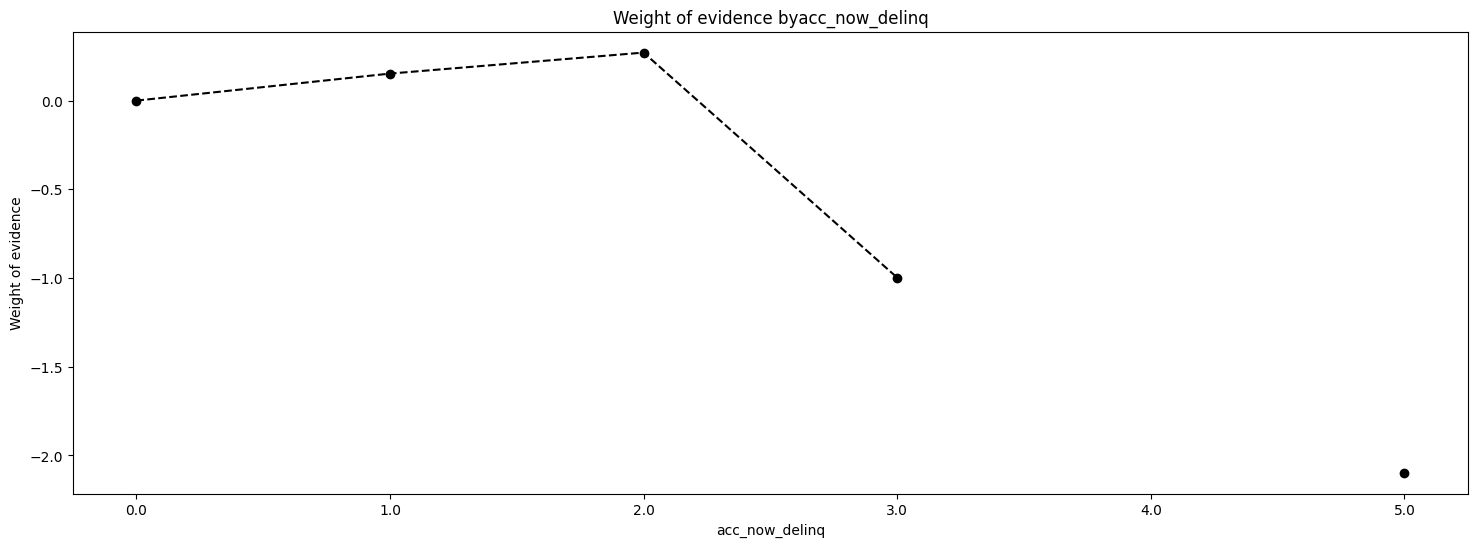

In [168]:
plot_by_woe_continuous(woe_continuous(features_preprocessed, 'acc_now_delinq', targets_preprocessed))

In [169]:
# Assign categories based on the weight of evidence
features_preprocessed['acc_now_delinq:0'] = np.where((features_preprocessed['acc_now_delinq'] == 0), 1, 0)
features_preprocessed['acc_now_delinq:>=1'] = np.where((features_preprocessed['acc_now_delinq'] >= 1), 1, 0)

In [170]:
# Look at the total revenue earnd for each borrower, assign bins
features_preprocessed['total_rev_hi_lim_factor'] = pd.cut(features_preprocessed['total_rev_hi_lim'], 2000)

In [171]:
# Then look at the weight of evidence
woe_total_rev_hi_lim_factor = woe_continuous(features_preprocessed, 'total_rev_hi_lim_factor', targets_preprocessed)
woe_total_rev_hi_lim_factor

total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs   n_good  \
0            (-9999.999, 5000.0]  19383   0.863592    0.051961  16739.0   
1             (5000.0, 9999.999]  52694   0.875508    0.141260  46134.0   
2          (9999.999, 14999.998]  59415   0.880670    0.159278  52325.0   
3         (14999.998, 19999.998]  51570   0.877836    0.138247  45270.0   
4         (19999.998, 24999.997]  41506   0.887342    0.111268  36830.0   
5         (24999.997, 29999.997]  32099   0.889685    0.086050  28558.0   
6         (29999.997, 34999.996]  24604   0.895220    0.065958  22026.0   
7         (34999.996, 39999.996]  19704   0.900629    0.052822  17746.0   
8         (39999.996, 44999.996]  14755   0.914334    0.039555  13491.0   
9         (44999.996, 49999.995]  11541   0.914479    0.030939  10554.0   
10        (49999.995, 54999.994]   8941   0.914215    0.023969   8174.0   
11        (54999.994, 59999.994]   6748   0.925015    0.018090   6242.0   
12        (59999.994, 64999.994]   5352   0.931988    0.014347   4988.0   
13        (64999.994, 69999.993]   4320   0.929167    0.011581   4014.0   
14        (69999.993, 74999.992]   3359   0.932123    0.009005   3131.0   
15        (74999.992, 79999.992]   2630   0.928137    0.007050   2441.0   
16        (79999.992, 84999.992]   2220   0.929730    0.005951   2064.0   
17        (84999.992, 89999.991]   1821   0.927512    0.004882   1689.0   
18         (89999.991, 94999.99]   1421   0.929627    0.003809   1321.0   
19          (94999.99, 99999.99]   1181   0.953429    0.003166   1126.0   
20         (99999.99, 104999.99]    995   0.948744    0.002667    944.0   
21       (104999.99, 109999.989]    858   0.945221    0.002300    811.0   
22      (109999.989, 114999.988]    675   0.942222    0.001810    636.0   
23      (114999.988, 119999.988]    629   0.939587    0.001686    591.0   
24      (119999.988, 124999.988]    451   0.955654    0.001209    431.0   
25      (124999.988, 129999.987]    434   0.930876    0.001163    404.0   
26      (129999.987, 134999.986]    337   0.964392    0.000903    325.0   
27      (134999.986, 139999.986]    312   0.942308    0.000836    294.0   
28      (139999.986, 144999.986]    298   0.942953    0.000799    281.0   
29      (144999.986, 149999.985]    250   0.940000    0.000670    235.0   
30      (149999.985, 154999.984]    208   0.942308    0.000558    196.0   
31      (154999.984, 159999.984]    218   0.967890    0.000584    211.0   
32      (159999.984, 164999.984]    175   0.942857    0.000469    165.0   
33      (164999.984, 169999.983]    157   0.961783    0.000421    151.0   
34      (169999.983, 174999.982]    118   0.906780    0.000316    107.0   
35      (174999.982, 179999.982]    120   0.941667    0.000322    113.0   
36      (179999.982, 184999.982]     92   0.989130    0.000247     91.0   
37      (184999.982, 189999.981]    105   0.952381    0.000281    100.0   
38       (189999.981, 194999.98]     86   0.976744    0.000231     84.0   
39        (194999.98, 199999.98]     74   0.918919    0.000198     68.0   
40        (199999.98, 204999.98]     82   0.987805    0.000220     81.0   
41       (204999.98, 209999.979]     77   0.935065    0.000206     72.0   
42      (209999.979, 214999.978]     69   1.000000    0.000185     69.0   
43      (214999.978, 219999.978]     67   0.925373    0.000180     62.0   
44      (219999.978, 224999.978]     65   0.953846    0.000174     62.0   
45      (224999.978, 229999.977]     42   0.952381    0.000113     40.0   
46      (229999.977, 234999.976]     51   0.921569    0.000137     47.0   
47      (234999.976, 239999.976]     43   0.906977    0.000115     39.0   
48      (239999.976, 244999.976]     30   0.933333    0.000080     28.0   
49      (244999.976, 249999.975]     34   0.970588    0.000091     33.0   
50      (249999.975, 254999.974]     27   0.888889    0.000072     24.0   
51      (254999.974, 259999.974]     33   0.939394    0.000088     31.0   
52      (259999.974, 264999.974]  

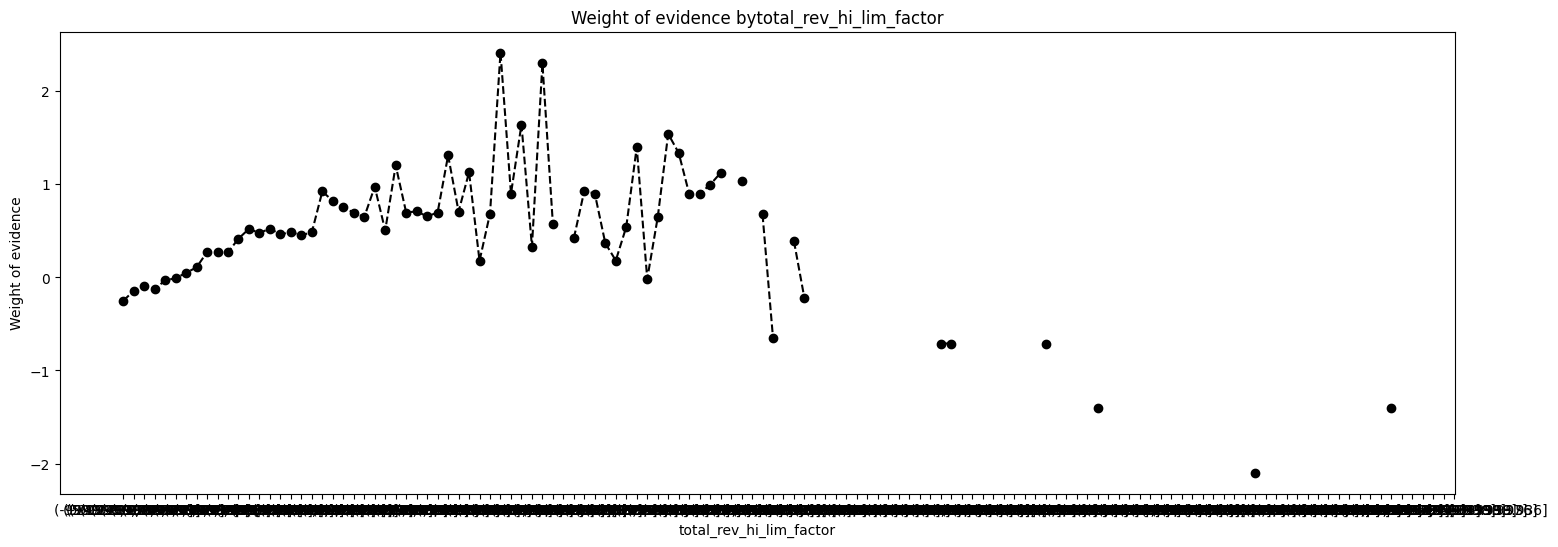

In [172]:
plot_by_woe_continuous(woe_continuous(features_preprocessed, 'total_rev_hi_lim_factor', targets_preprocessed))

In [173]:
# Assign categories based on the weight of evidence
features_preprocessed['total_rev_hi_lim:<=5K'] = np.where((features_preprocessed['total_rev_hi_lim'] <= 5000), 1, 0)
features_preprocessed['total_rev_hi_lim:5K-10K'] = np.where((features_preprocessed['total_rev_hi_lim'] > 5000) & (features_preprocessed['total_rev_hi_lim'] <= 10000), 1, 0)
features_preprocessed['total_rev_hi_lim:10K-20K'] = np.where((features_preprocessed['total_rev_hi_lim'] > 10000) & (features_preprocessed['total_rev_hi_lim'] <= 20000), 1, 0)
features_preprocessed['total_rev_hi_lim:20K-30K'] = np.where((features_preprocessed['total_rev_hi_lim'] > 20000) & (features_preprocessed['total_rev_hi_lim'] <= 30000), 1, 0)
features_preprocessed['total_rev_hi_lim:30K-40K'] = np.where((features_preprocessed['total_rev_hi_lim'] > 30000) & (features_preprocessed['total_rev_hi_lim'] <= 40000), 1, 0)
features_preprocessed['total_rev_hi_lim:40K-55K'] = np.where((features_preprocessed['total_rev_hi_lim'] > 40000) & (features_preprocessed['total_rev_hi_lim'] <= 55000), 1, 0)
features_preprocessed['total_rev_hi_lim:55K-95K'] = np.where((features_preprocessed['total_rev_hi_lim'] > 55000) & (features_preprocessed['total_rev_hi_lim'] <= 95000), 1, 0)
features_preprocessed['total_rev_hi_lim:>95K'] = np.where((features_preprocessed['total_rev_hi_lim'] > 95000), 1, 0)


In [174]:
# Assign bins for the installment factor
features_preprocessed['installment_factor'] = pd.cut(features_preprocessed['installment'], 40)

In [175]:
# Then look at the weight of evidence
woe_installment_factor = woe_continuous(features_preprocessed, 'installment_factor', targets_preprocessed)
woe_installment_factor

installment_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (14.276, 50.528]   2720   0.896324    0.007292   2438.0   282.0   
1       (50.528, 85.386]   6995   0.901215    0.018752   6304.0   691.0   
2      (85.386, 120.244]  10659   0.889295    0.028574   9479.0  1180.0   
3     (120.244, 155.102]  12427   0.893860    0.033314  11108.0  1319.0   
4      (155.102, 189.96]  21003   0.897158    0.056304  18843.0  2160.0   
5      (189.96, 224.818]  20205   0.900272    0.054165  18190.0  2015.0   
6     (224.818, 259.676]  21363   0.901746    0.057269  19264.0  2099.0   
7     (259.676, 294.534]  25128   0.893983    0.067362  22464.0  2664.0   
8     (294.534, 329.392]  26444   0.897028    0.070890  23721.0  2723.0   
9      (329.392, 364.25]  28373   0.881260    0.076061  25004.0  3369.0   
10     (364.25, 399.108]  23598   0.897110    0.063261  21170.0  2428.0   
11    (399.108, 433.966]  17909   0.883634    0.048010  15825.0  2084.0   
12    (433.966, 468.824]  16267   0.885720    0.043608  14408.0  1859.0   
13    (468.824, 503.682]  20451   0.893306    0.054824  18269.0  2182.0   
14     (503.682, 538.54]  15226   0.878760    0.040817  13380.0  1846.0   
15     (538.54, 573.398]  13197   0.872547    0.035378  11515.0  1682.0   
16    (573.398, 608.256]  11488   0.880484    0.030797  10115.0  1373.0   
17    (608.256, 643.114]  11593   0.904425    0.031078  10485.0  1108.0   
18    (643.114, 677.972]  11341   0.896658    0.030403  10169.0  1172.0   
19     (677.972, 712.83]   8254   0.881754    0.022127   7278.0   976.0   
20     (712.83, 747.688]   5952   0.885585    0.015956   5271.0   681.0   
21    (747.688, 782.546]   6677   0.897109    0.017899   5990.0   687.0   
22    (782.546, 817.404]   5477   0.898667    0.014683   4922.0   555.0   
23    (817.404, 852.262]   4743   0.884883    0.012715   4197.0   546.0   
24     (852.262, 887.12]   5304   0.889706    0.014219   4719.0   585.0   
25     (887.12, 921.978]   3223   0.862240    0.008640   2779.0   444.0   
26    (921.978, 956.836]   3034   0.868820    0.008133   2636.0   398.0   
27    (956.836, 991.694]   2261   0.841221    0.006061   1902.0   359.0   
28   (991.694, 1026.552]   2007   0.869955    0.005380   1746.0   261.0   
29   (1026.552, 1061.41]   1463   0.871497    0.003922   1275.0   188.0   
30   (1061.41, 1096.268]   1058   0.918715    0.002836    972.0    86.0   
31  (1096.268, 1131.126]   1162   0.919966    0.003115   1069.0    93.0   
32  (1131.126, 1165.984]   1318   0.915781    0.003533   1207.0   111.0   
33  (1165.984, 1200.842]   1475   0.906441    0.003954   1337.0   138.0   
34    (1200.842, 1235.7]   1616   0.888614    0.004332   1436.0   180.0   
35    (1235.7, 1270.558]    781   0.859155    0.002094    671.0   110.0   
36  (1270.558, 1305.416]    514   0.813230    0.001378    418.0    96.0   
37  (1305.416, 1340.274]    192   0.776042    0.000515    149.0    43.0   
38  (1340.274, 1375.132]     92   0.663043    0.000247     61.0    31.0   
39   (1375.132, 1409.99]     38   0.868421    0.000102     33.0     5.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0      0.007339    0.006910  0.060134             NaN       NaN  0.01283  
1      0.018975    0.016933  0.113908        0.004892  0.053774  0.01283  
2      0.028532    0.028915 -0.013327        0.011920  0.127235  0.01283  
3      0.033436    0.032321  0.033900        0.004565  0.047227  0.01283  
4      0.056719    0.052930  0.069142        0.003297  0.035242  0.01283  
5      0.054753    0.049376  0.103361        0.003115  0.034220  0.01283  
6      0.057986    0.051435  0.119885        0.001474  0.016524  0.01283  
7      0.067618    0.065280  0.035194        0.007763  0.084692  0.01283  
8      0.071402    0.066725  0.067735        0.003045  0.032541  0.01283  
9      0.075264    0.082555 -0.092472        0.015767  0.160207  0.01283  
10     0.063723    0.059497  0.068625        0.015850  0.161097  0.01283  
11     0.047634    0.051067 -0

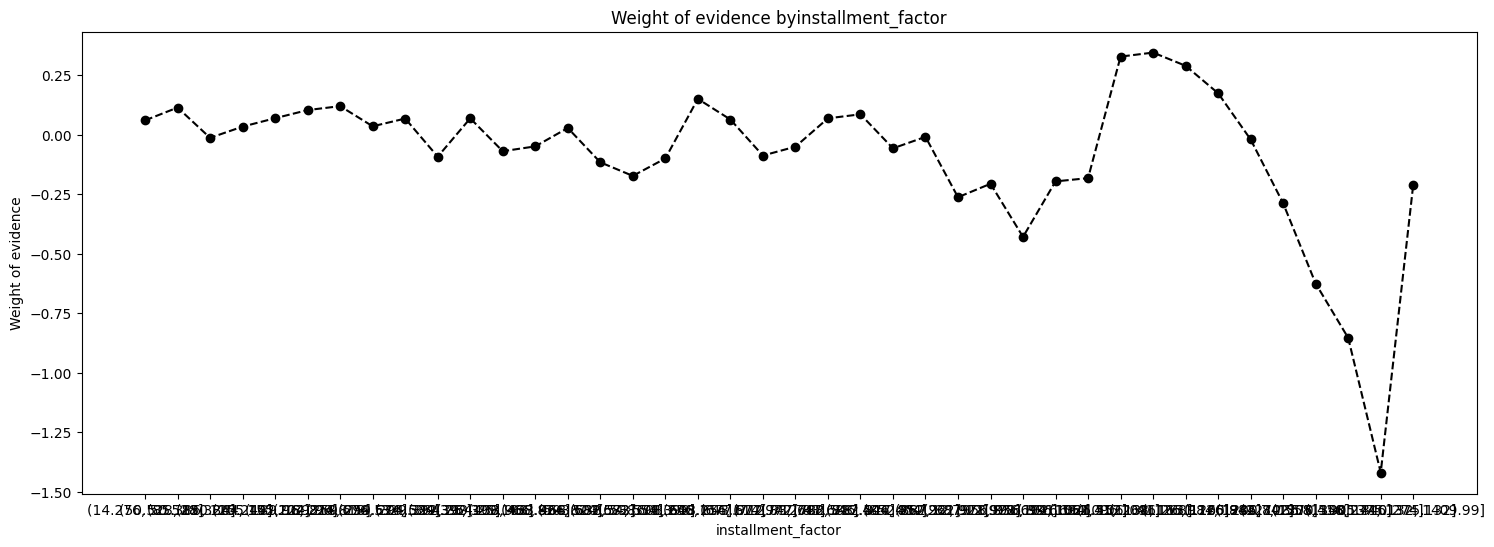

In [177]:
# Then look at the weight of evidence for the installment factor
plot_by_woe_continuous(woe_continuous(features_preprocessed, 'installment_factor', targets_preprocessed))

In [178]:
# We will look at an annual income less than 140000 and assign bins
features_preprocessed = features_preprocessed.loc[features_preprocessed['annual_inc'] <= 140000,:  ]
features_preprocessed['annual_inc_factor'] = pd.cut(features_preprocessed['annual_inc'],40)

In [179]:
# Look at the weight of evidence
woe_annual_inc_factor = woe_continuous(features_preprocessed, 'annual_inc_factor', targets_preprocessed)
woe_annual_inc_factor

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (1862.0, 5450.0]     21   0.761905    0.000060     16.0     5.0   
1       (5450.0, 8900.0]    122   0.844262    0.000348    103.0    19.0   
2      (8900.0, 12350.0]    659   0.822458    0.001878    542.0   117.0   
3     (12350.0, 15800.0]   1318   0.832322    0.003755   1097.0   221.0   
4     (15800.0, 19250.0]   2123   0.836081    0.006049   1775.0   348.0   
5     (19250.0, 22700.0]   3736   0.847966    0.010644   3168.0   568.0   
6     (22700.0, 26150.0]   7763   0.856885    0.022118   6652.0  1111.0   
7     (26150.0, 29600.0]   6129   0.854462    0.017462   5237.0   892.0   
8     (29600.0, 33050.0]  14197   0.857576    0.040449  12175.0  2022.0   
9     (33050.0, 36500.0]  14741   0.857133    0.041999  12635.0  2106.0   
10    (36500.0, 39950.0]   9958   0.868347    0.028372   8647.0  1311.0   
11    (39950.0, 43400.0]  23398   0.867724    0.066664  20303.0  3095.0   
12    (43400.0, 46850.0]  17327   0.876897    0.049367  15194.0  2133.0   
13    (46850.0, 50300.0]  24860   0.878922    0.070829  21850.0  3010.0   
14    (50300.0, 53750.0]  12630   0.886619    0.035984  11198.0  1432.0   
15    (53750.0, 57200.0]  19487   0.881870    0.055521  17185.0  2302.0   
16    (57200.0, 60650.0]  21347   0.878906    0.060820  18762.0  2585.0   
17    (60650.0, 64100.0]  10945   0.896574    0.031184   9813.0  1132.0   
18    (64100.0, 67550.0]  16353   0.891335    0.046592  14576.0  1777.0   
19    (67550.0, 71000.0]  17112   0.896681    0.048754  15344.0  1768.0   
20    (71000.0, 74450.0]   8888   0.899415    0.025323   7994.0   894.0   
21    (74450.0, 77900.0]  13507   0.900866    0.038483  12168.0  1339.0   
22    (77900.0, 81350.0]  14939   0.900060    0.042563  13446.0  1493.0   
23    (81350.0, 84800.0]   6373   0.915111    0.018157   5832.0   541.0   
24    (84800.0, 88250.0]  11461   0.907687    0.032654  10403.0  1058.0   
25    (88250.0, 91700.0]  10062   0.910853    0.028668   9165.0   897.0   
26    (91700.0, 95150.0]   8556   0.913862    0.024377   7819.0   737.0   
27    (95150.0, 98600.0]   4928   0.911729    0.014040   4493.0   435.0   
28   (98600.0, 102050.0]   9957   0.913126    0.028369   9092.0   865.0   
29  (102050.0, 105500.0]   4847   0.920982    0.013810   4464.0   383.0   
30  (105500.0, 108950.0]   2683   0.922475    0.007644   2475.0   208.0   
31  (108950.0, 112400.0]   6253   0.915720    0.017816   5726.0   527.0   
32  (112400.0, 115850.0]   3382   0.929332    0.009636   3143.0   239.0   
33  (115850.0, 119300.0]   1870   0.924064    0.005328   1728.0   142.0   
34  (119300.0, 122750.0]   6009   0.916292    0.017120   5506.0   503.0   
35  (122750.0, 126200.0]   3942   0.917301    0.011231   3616.0   326.0   
36  (126200.0, 129650.0]   1001   0.929071    0.002852    930.0    71.0   
37  (129650.0, 133100.0]   3440   0.932849    0.009801   3209.0   231.0   
38  (133100.0, 136550.0]   1930   0.937824    0.005499   1810.0   120.0   
39  (136550.0, 140000.0]   2731   0.922007    0.007781   2518.0   213.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE      IV  
0      0.000051    0.000128 -0.911176             NaN       NaN  0.0485  
1      0.000330    0.000485 -0.384036        0.082358  0.527139  0.0485  
2      0.001738    0.002987 -0.541234        0.021804  0.157198  0.0485  
3      0.003518    0.005641 -0.472155        0.009863  0.069080  0.0485  
4      0.005693    0.008883 -0.444973        0.003759  0.027181  0.0485  
5      0.010160    0.014499 -0.355592        0.011885  0.089381  0.0485  
6      0.021334    0.028359 -0.284669        0.008919  0.070923  0.0485  
7      0.016796    0.022769 -0.304289        0.002423  0.019619  0.0485  
8      0.039046    0.051613 -0.279029        0.003113  0.025260  0.0485  
9      0.040522    0.053757 -0.282646        0.000442  0.003617  0.0485  
10     0.027732    0.033464 -0.187904        0.011214  0.094742  0.0485  
11     0.065114    0.079002 -0.193346      

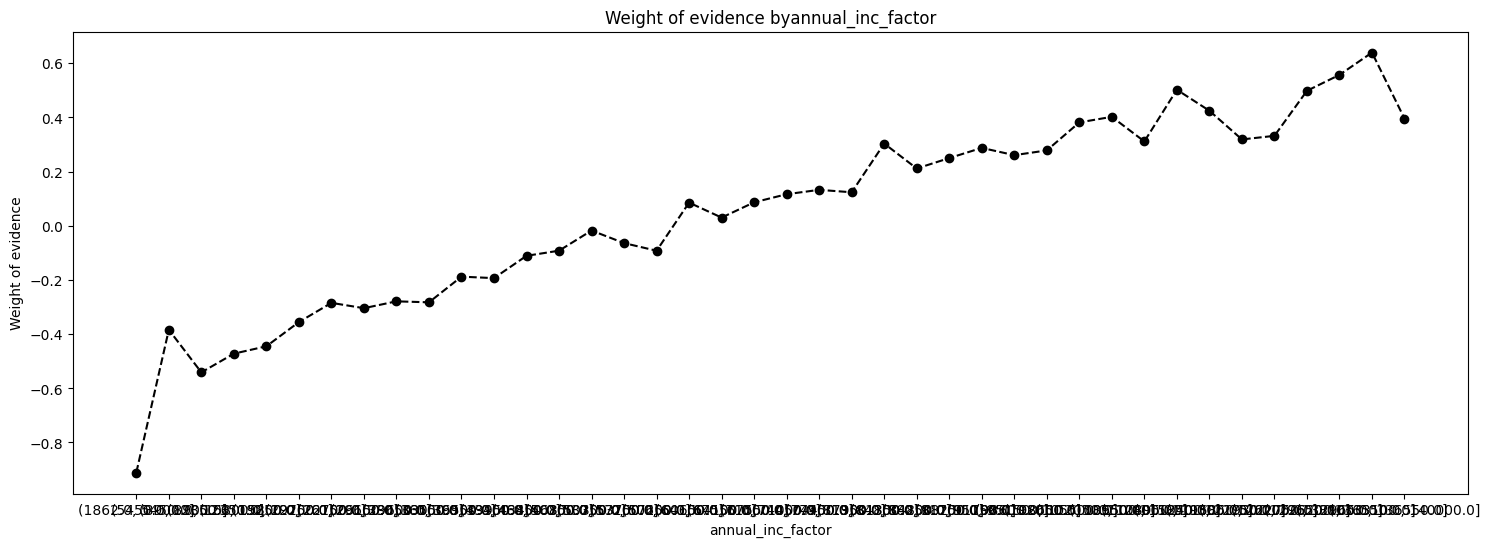

In [180]:
plot_by_woe_continuous(woe_continuous(features_preprocessed, 'annual_inc_factor', targets_preprocessed))

In [182]:
# Assign categories based on the weight of evidence for the annual income
features_preprocessed['annual_inc:<20K'] = np.where((features_preprocessed['annual_inc'] <= 20000), 1, 0)
features_preprocessed['annual_inc:20K-30K'] = np.where((features_preprocessed['annual_inc'] > 20000) & (features_preprocessed['annual_inc'] <= 30000), 1, 0)
features_preprocessed['annual_inc:30K-40K'] = np.where((features_preprocessed['annual_inc'] > 30000) & (features_preprocessed['annual_inc'] <= 40000), 1, 0)
features_preprocessed['annual_inc:40K-50K'] = np.where((features_preprocessed['annual_inc'] > 40000) & (features_preprocessed['annual_inc'] <= 50000), 1, 0)
features_preprocessed['annual_inc:50K-60K'] = np.where((features_preprocessed['annual_inc'] > 50000) & (features_preprocessed['annual_inc'] <= 60000), 1, 0)
features_preprocessed['annual_inc:60K-70K'] = np.where((features_preprocessed['annual_inc'] > 60000) & (features_preprocessed['annual_inc'] <= 70000), 1, 0)
features_preprocessed['annual_inc:70K-80K'] = np.where((features_preprocessed['annual_inc'] > 70000) & (features_preprocessed['annual_inc'] <= 80000), 1, 0)
features_preprocessed['annual_inc:80K-90K'] = np.where((features_preprocessed['annual_inc'] > 80000) & (features_preprocessed['annual_inc'] <= 90000), 1, 0)
features_preprocessed['annual_inc:90K-100K'] = np.where((features_preprocessed['annual_inc'] > 90000) & (features_preprocessed['annual_inc'] <= 100000), 1, 0)
features_preprocessed['annual_inc:100K-120K'] = np.where((features_preprocessed['annual_inc'] > 100000) & (features_preprocessed['annual_inc'] <= 120000), 1, 0)
features_preprocessed['annual_inc:120K-140K'] = np.where((features_preprocessed['annual_inc'] > 120000) & (features_preprocessed['annual_inc'] <= 140000), 1, 0)
features_preprocessed['annual_inc:>140K'] = np.where((features_preprocessed['annual_inc'] > 140000), 1, 0)

In [183]:
# Identify the non null months since the last delinquency and assign bins
features_preprocessed = features_preprocessed[pd.notnull(features_preprocessed['mths_since_last_delinq'])]
features_preprocessed['mths_since_last_delinq_factor'] = pd.cut(features_preprocessed['mths_since_last_delinq'], 40)

In [184]:
# Look at the weight of evidence for months since last delinquency
woe_mths_since_last_delinq_factor = woe_continuous(features_preprocessed, 'mths_since_last_delinq_factor', targets_preprocessed)
woe_mths_since_last_delinq_factor

mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                   (-0.18, 4.5]   6642   0.875489    0.041189   5815.0   
1                     (4.5, 9.0]  14596   0.885311    0.090515  12922.0   
2                    (9.0, 13.5]  12260   0.891599    0.076029  10931.0   
3                   (13.5, 18.0]  14625   0.888821    0.090695  12999.0   
4                   (18.0, 22.5]  10885   0.889297    0.067502   9680.0   
5                   (22.5, 27.0]  12653   0.894017    0.078466  11312.0   
6                   (27.0, 31.5]   9684   0.894362    0.060054   8661.0   
7                   (31.5, 36.0]  11558   0.896176    0.071675  10358.0   
8                   (36.0, 40.5]   8744   0.889753    0.054225   7780.0   
9                   (40.5, 45.0]  10715   0.892207    0.066448   9560.0   
10                  (45.0, 49.5]   7898   0.891112    0.048978   7038.0   
11                  (49.5, 54.0]   7204   0.890061    0.044675   6412.0   
12                  (54.0, 58.5]   5672   0.898096    0.035174   5094.0   
13                  (58.5, 63.0]   6637   0.888956    0.041158   5900.0   
14                  (63.0, 67.5]   5042   0.889925    0.031267   4487.0   
15                  (67.5, 72.0]   6109   0.886070    0.037884   5413.0   
16                  (72.0, 76.5]   4620   0.895455    0.028650   4137.0   
17                  (76.5, 81.0]   5028   0.888624    0.031180   4468.0   
18                  (81.0, 85.5]    521   0.859885    0.003231    448.0   
19                  (85.5, 90.0]     48   0.895833    0.000298     43.0   
20                  (90.0, 94.5]     21   0.952381    0.000130     20.0   
21                  (94.5, 99.0]     26   0.730769    0.000161     19.0   
22                 (99.0, 103.5]     14   1.000000    0.000087     14.0   
23                (103.5, 108.0]     13   0.846154    0.000081     11.0   
24                (108.0, 112.5]      3   0.666667    0.000019      2.0   
25                (112.5, 117.0]      4   1.000000    0.000025      4.0   
26                (117.0, 121.5]      4   1.000000    0.000025      4.0   
27                (121.5, 126.0]      3   1.000000    0.000019      3.0   
28                (126.0, 130.5]      4   1.000000    0.000025      4.0   
29                (130.5, 135.0]      8   0.750000    0.000050      6.0   
30                (135.0, 139.5]      2   1.000000    0.000012      2.0   
31                (139.5, 144.0]      3   1.000000    0.000019      3.0   
32                (144.0, 148.5]      3   0.666667    0.000019      2.0   
33                (148.5, 153.0]      2   0.500000    0.000012      1.0   
34                (153.0, 157.5]      1   1.000000    0.000006      1.0   
35                (157.5, 162.0]      1   1.000000    0.000006      1.0   
36                (162.0, 166.5]      0        NaN    0.000000      NaN   
37                (166.5, 171.0]      1   1.000000    0.000006      1.0   
38                (171.0, 175.5]      0        NaN    0.000000      NaN   
39                (175.5, 180.0]      1   1.000000    0.000006      1.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    827.0     0.040507    0.046728 -0.142889             NaN       NaN  inf  
1   1674.0     0.090013    0.094587 -0.049565        0.009822  0.093324  inf  
2   1329.0     0.076144    0.075093  0.013895        0.006288  0.063461  inf  
3   1626.0     0.090549    0.091875 -0.014531        0.002778  0.028427  inf  
4   1205.0     0.067430    0.068087 -0.009698        0.000477  0.004833  inf  
5   1341.0     0.078798    0.075771  0.039168        0.004720  0.048866  inf  
6   1023.0     0.060331    0.057803  0.042810        0.000345  0.003642  inf  
7   1200.0     0.072153    0.067804  0.062157        0.001814  0.019347  inf  
8    964.0     0.054195    0.054469 -0.005060        0.006423  0.067217  inf  
9   1155.0     0.066594    0.065262  0.020207        0.002454  0.025267  inf  
10   860.0     0.049026    0.048593  0.008866        0.001

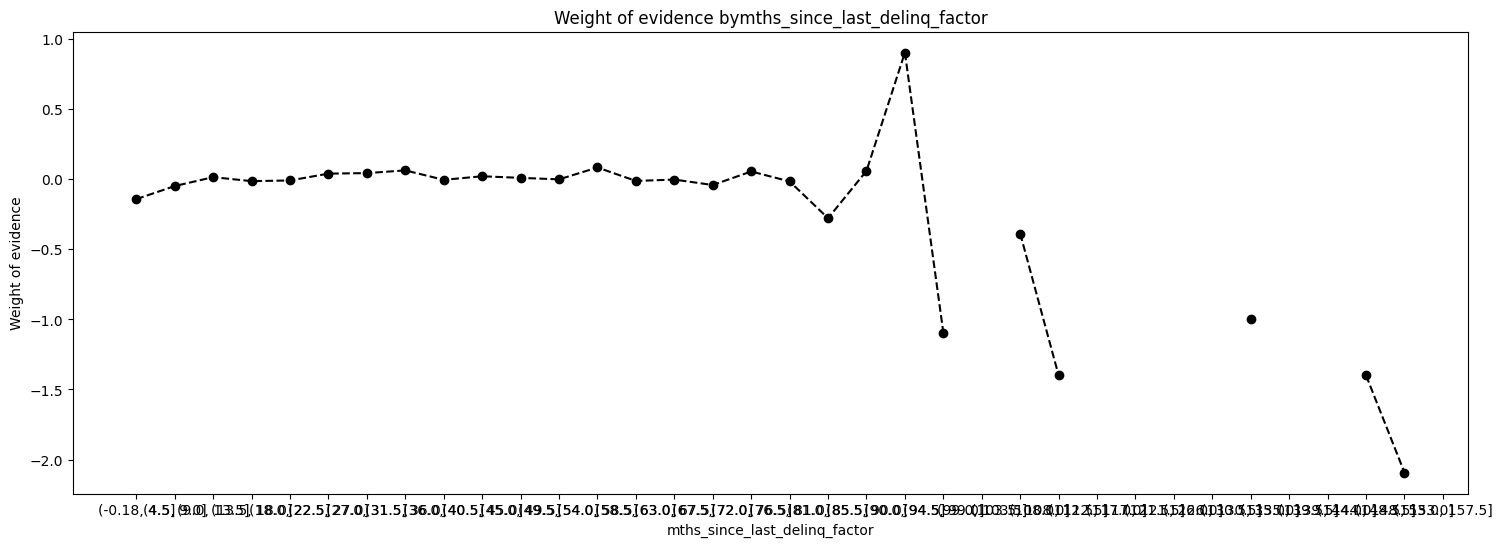

In [185]:
plot_by_woe_continuous(woe_continuous(features_preprocessed, 'mths_since_last_delinq_factor', targets_preprocessed))

In [186]:
# Assign categories based on the weight of evidence
features_preprocessed['mths_since_last_delinq:Missing'] = np.where((features_preprocessed['mths_since_last_delinq'].isnull()), 1, 0)
features_preprocessed['mths_since_last_delinq:0-3'] = np.where((features_preprocessed['mths_since_last_delinq'] >= 0) & (features_preprocessed['mths_since_last_delinq'] <= 3), 1, 0)
features_preprocessed['mths_since_last_delinq:4-30'] = np.where((features_preprocessed['mths_since_last_delinq'] >= 4) & (features_preprocessed['mths_since_last_delinq'] <= 30), 1, 0)
features_preprocessed['mths_since_last_delinq:31-56'] = np.where((features_preprocessed['mths_since_last_delinq'] >= 31) & (features_preprocessed['mths_since_last_delinq'] <= 56), 1, 0)
features_preprocessed['mths_since_last_delinq:>=57'] = np.where((features_preprocessed['mths_since_last_delinq'] >= 57), 1, 0)

In [187]:
# We look at a dti less than or equal to 35 and then assign bins
features_preprocessed = features_preprocessed.loc[features_preprocessed['dti'] <= 35, : ]
features_preprocessed['dti_factor'] = pd.cut(features_preprocessed['dti'], 50)

In [188]:
# Then look at the weight of evidence
woe_dti_factor = woe_continuous(features_preprocessed, 'dti_factor', targets_preprocessed)
woe_dti_factor

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0   (-0.035, 0.7]    447   0.865772    0.002796   387.0   60.0     0.002719   
1      (0.7, 1.4]    565   0.890265    0.003534   503.0   62.0     0.003534   
2      (1.4, 2.1]    727   0.900963    0.004547   655.0   72.0     0.004602   
3      (2.1, 2.8]   1023   0.917889    0.006399   939.0   84.0     0.006597   
4      (2.8, 3.5]   1219   0.904840    0.007625  1103.0  116.0     0.007749   
5      (3.5, 4.2]   1564   0.920716    0.009783  1440.0  124.0     0.010117   
6      (4.2, 4.9]   1763   0.916619    0.011027  1616.0  147.0     0.011353   
7      (4.9, 5.6]   2150   0.904651    0.013448  1945.0  205.0     0.013664   
8      (5.6, 6.3]   2384   0.913591    0.014912  2178.0  206.0     0.015301   
9      (6.3, 7.0]   2641   0.906475    0.016519  2394.0  247.0     0.016819   
10     (7.0, 7.7]   3012   0.918327    0.018840  2766.0  246.0     0.019432   
11     (7.7, 8.4]   3348   0.912186    0.020941  3054.0  294.0     0.021456   
12     (8.4, 9.1]   3747   0.907126    0.023437  3399.0  348.0     0.023879   
13     (9.1, 9.8]   3872   0.909091    0.024219  3520.0  352.0     0.024730   
14    (9.8, 10.5]   4225   0.906272    0.026427  3829.0  396.0     0.026900   
15   (10.5, 11.2]   4610   0.898265    0.028835  4141.0  469.0     0.029092   
16   (11.2, 11.9]   4654   0.899012    0.029110  4184.0  470.0     0.029394   
17   (11.9, 12.6]   5056   0.897943    0.031625  4540.0  516.0     0.031895   
18   (12.6, 13.3]   5057   0.902907    0.031631  4566.0  491.0     0.032078   
19   (13.3, 14.0]   5339   0.896423    0.033395  4786.0  553.0     0.033624   
20   (14.0, 14.7]   5384   0.900074    0.033676  4846.0  538.0     0.034045   
21   (14.7, 15.4]   5210   0.899232    0.032588  4685.0  525.0     0.032914   
22   (15.4, 16.1]   5350   0.896449    0.033464  4796.0  554.0     0.033694   
23   (16.1, 16.8]   5305   0.891612    0.033182  4730.0  575.0     0.033230   
24   (16.8, 17.5]   5505   0.887012    0.034433  4883.0  622.0     0.034305   
25   (17.5, 18.2]   5252   0.887852    0.032851  4663.0  589.0     0.032760   
26   (18.2, 18.9]   5130   0.896881    0.032088  4601.0  529.0     0.032324   
27   (18.9, 19.6]   4969   0.889314    0.031081  4419.0  550.0     0.031045   
28   (19.6, 20.3]   4911   0.891672    0.030718  4379.0  532.0     0.030764   
29   (20.3, 21.0]   4854   0.884837    0.030361  4295.0  559.0     0.030174   
30   (21.0, 21.7]   4450   0.880000    0.027834  3916.0  534.0     0.027512   
31   (21.7, 22.4]   4337   0.875029    0.027127  3795.0  542.0     0.026662   
32   (22.4, 23.1]   4194   0.876967    0.026233  3678.0  516.0     0.025840   
33   (23.1, 23.8]   4016   0.878735    0.025120  3529.0  487.0     0.024793   
34   (23.8, 24.5]   3784   0.874471    0.023668  3309.0  475.0     0.023247   
35   (24.5, 25.2]   3504   0.870719    0.021917  3051.0  453.0     0.021435   
36   (25.2, 25.9]   3024   0.872685    0.018915  2639.0  385.0     0.018540   
37   (25.9, 26.6]   2860   0.870280    0.017889  2489.0  371.0     0.017486   
38   (26.6, 27.3]   2744   0.868076    0.017163  2382.0  362.0     0.016735   
39   (27.3, 28.0]   2568   0.865265    0.016063  2222.0  346.0     0.015611   
40   (28.0, 28.7]   2391   0.867838    0.014955  2075.0  316.0     0.014578   
41   (28.7, 29.4]   2240   0.862946    0.014011  1933.0  307.0     0.013580   
42   (29.4, 30.1]   1979   0.852451    0.012378  1687.0  292.0     0.011852   
43   (30.1, 30.8]   1551   0.870406    0.009701  1350.0  201.0     0.009484   
44   (30.8, 31.5]   1420   0.869014    0.008882  1234.0  186.0     0.008669   
45   (31.5, 32.2]   1340   0.873881    0.008382  1171.0  169.0     0.008227   
46   (32.2, 32.9]   1234   0.868720    0.007719  1072.0  162.0     0.007531   
47   (32.9, 33.6]   1059   0.853636    0.006624   904.0  155.0     0.006351   
48   (33.6, 34.3]   1017   0.871190    0.006361   886.0  131.0     0.006225   
49   (34.3, 35.0]    890   0.871910    0.005567   776.0  

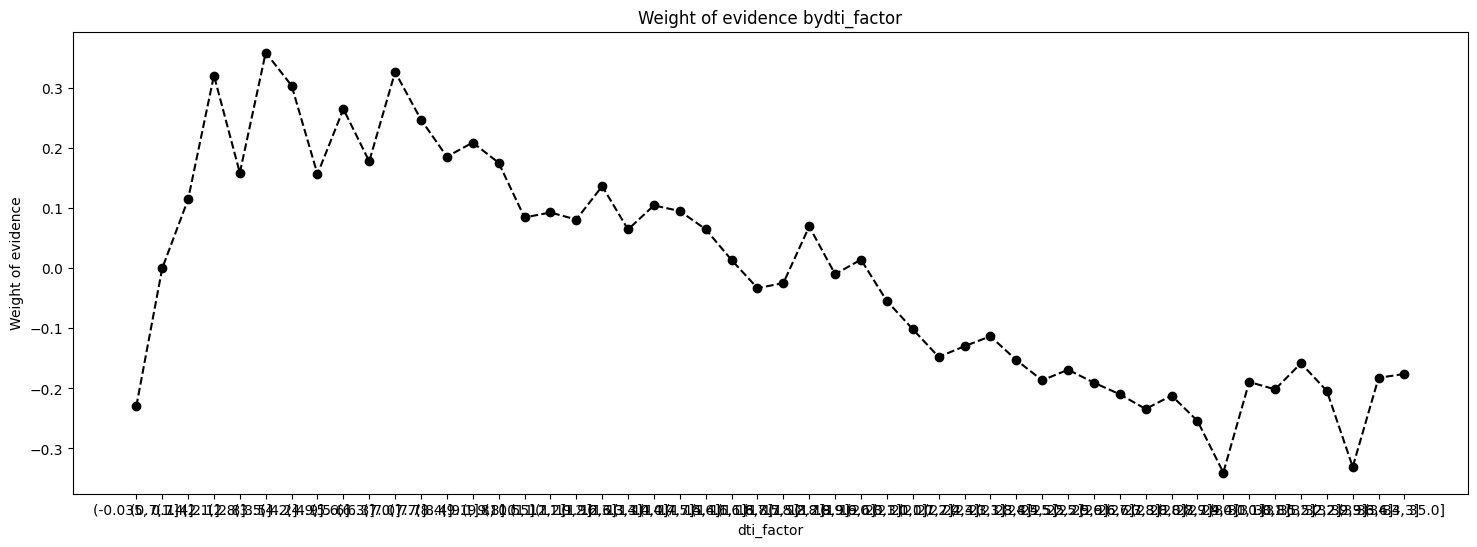

In [189]:
plot_by_woe_continuous(woe_continuous(features_preprocessed, 'dti_factor', targets_preprocessed))

In [190]:
# Assign categories based on the weight of evidence
features_preprocessed['dti:<=1.4'] = np.where((features_preprocessed['dti'] <= 1.4), 1, 0)
features_preprocessed['dti:1.4-3.5'] = np.where((features_preprocessed['dti'] > 1.4) & (features_preprocessed['dti'] <= 3.5), 1, 0)
features_preprocessed['dti:3.5-7.7'] = np.where((features_preprocessed['dti'] > 3.5) & (features_preprocessed['dti'] <= 7.7), 1, 0)
features_preprocessed['dti:7.7-10.5'] = np.where((features_preprocessed['dti'] > 7.7) & (features_preprocessed['dti'] <= 10.5), 1, 0)
features_preprocessed['dti:10.5-16.1'] = np.where((features_preprocessed['dti'] > 10.5) & (features_preprocessed['dti'] <= 16.1), 1, 0)
features_preprocessed['dti:16.1-20.3'] = np.where((features_preprocessed['dti'] > 16.1) & (features_preprocessed['dti'] <= 20.3), 1, 0)
features_preprocessed['dti:20.3-21.7'] = np.where((features_preprocessed['dti'] > 20.3) & (features_preprocessed['dti'] <= 21.7), 1, 0)
features_preprocessed['dti:21.7-22.4'] = np.where((features_preprocessed['dti'] > 21.7) & (features_preprocessed['dti'] <= 22.4), 1, 0)
features_preprocessed['dti:22.4-35'] = np.where((features_preprocessed['dti'] > 22.4) & (features_preprocessed['dti'] <= 35), 1, 0)
features_preprocessed['dti:>35'] = np.where((features_preprocessed['dti'] > 35), 1, 0)

In [191]:
# Look at non null months since the last recorded missed payment and assign bins
features_preprocessed = features_preprocessed[pd.notnull(features_preprocessed['mths_since_last_record'])]
features_preprocessed['mths_since_last_record_factor'] = pd.cut(features_preprocessed['mths_since_last_record'], 40)

In [192]:
# Then look at the weight of evidence
woe_mths_since_last_record_factor = woe_continuous(features_preprocessed, 'mths_since_last_record_factor', targets_preprocessed)
woe_mths_since_last_record_factor

mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                (-0.129, 3.225]    979   0.765066    0.041635   749.0  230.0   
1                  (3.225, 6.45]     82   0.902439    0.003487    74.0    8.0   
2                  (6.45, 9.675]    132   0.931818    0.005614   123.0    9.0   
3                  (9.675, 12.9]    148   0.918919    0.006294   136.0   12.0   
4                 (12.9, 16.125]    209   0.913876    0.008888   191.0   18.0   
5                (16.125, 19.35]    187   0.925134    0.007953   173.0   14.0   
6                (19.35, 22.575]    245   0.922449    0.010419   226.0   19.0   
7                 (22.575, 25.8]    255   0.909804    0.010845   232.0   23.0   
8                 (25.8, 29.025]    478   0.907950    0.020328   434.0   44.0   
9                (29.025, 32.25]    398   0.937186    0.016926   373.0   25.0   
10               (32.25, 35.475]    439   0.915718    0.018670   402.0   37.0   
11                (35.475, 38.7]    558   0.928315    0.023731   518.0   40.0   
12                (38.7, 41.925]    608   0.930921    0.025857   566.0   42.0   
13               (41.925, 45.15]    932   0.919528    0.039636   857.0   75.0   
14               (45.15, 48.375]    793   0.918033    0.033725   728.0   65.0   
15                (48.375, 51.6]    796   0.920854    0.033852   733.0   63.0   
16                (51.6, 54.825]    844   0.906398    0.035894   765.0   79.0   
17               (54.825, 58.05]   1173   0.911338    0.049885  1069.0  104.0   
18               (58.05, 61.275]    880   0.902273    0.037425   794.0   86.0   
19                (61.275, 64.5]    871   0.908152    0.037042   791.0   80.0   
20                (64.5, 67.725]    832   0.920673    0.035383   766.0   66.0   
21               (67.725, 70.95]    797   0.900878    0.033895   718.0   79.0   
22               (70.95, 74.175]    945   0.904762    0.040189   855.0   90.0   
23                (74.175, 77.4]    673   0.901932    0.028621   607.0   66.0   
24                (77.4, 80.625]    597   0.906198    0.025389   541.0   56.0   
25               (80.625, 83.85]    501   0.896208    0.021306   449.0   52.0   
26               (83.85, 87.075]    627   0.843700    0.026665   529.0   98.0   
27                (87.075, 90.3]    441   0.870748    0.018755   384.0   57.0   
28                (90.3, 93.525]    518   0.878378    0.022029   455.0   63.0   
29               (93.525, 96.75]    572   0.832168    0.024326   476.0   96.0   
30               (96.75, 99.975]    622   0.856913    0.026452   533.0   89.0   
31               (99.975, 103.2]    954   0.873166    0.040572   833.0  121.0   
32              (103.2, 106.425]    879   0.870307    0.037382   765.0  114.0   
33             (106.425, 109.65]    954   0.877358    0.040572   837.0  117.0   
34             (109.65, 112.875]    848   0.870283    0.036064   738.0  110.0   
35              (112.875, 116.1]   1081   0.876041    0.045973   947.0  134.0   
36              (116.1, 119.325]    662   0.889728    0.028153   589.0   73.0   
37             (119.325, 122.55]      3   1.000000    0.000128     3.0    0.0   
38             (122.55, 125.775]      0        NaN    0.000000     NaN    NaN   
39              (125.775, 129.0]      1   0.000000    0.000043     0.0    1.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.035736    0.090020 -0.923856             NaN       NaN  inf  
1      0.003531    0.003131  0.120108        0.137373  1.043964  inf  
2      0.005869    0.003523  0.510444        0.029379  0.390336  inf  
3      0.006489    0.004697  0.323232        0.012899  0.187212  inf  
4      0.009113    0.007045  0.257386        0.005043  0.065847  inf  
5      0.008254    0.005479  0.409718        0.011258  0.152333  inf  
6      0.010783    0.007436  0.371580        0.002685  0.038138  inf  
7      0.011069    0.009002  0.206727        0.012645  0.164853  inf  
8      0.020707    0.017221  0.184339     

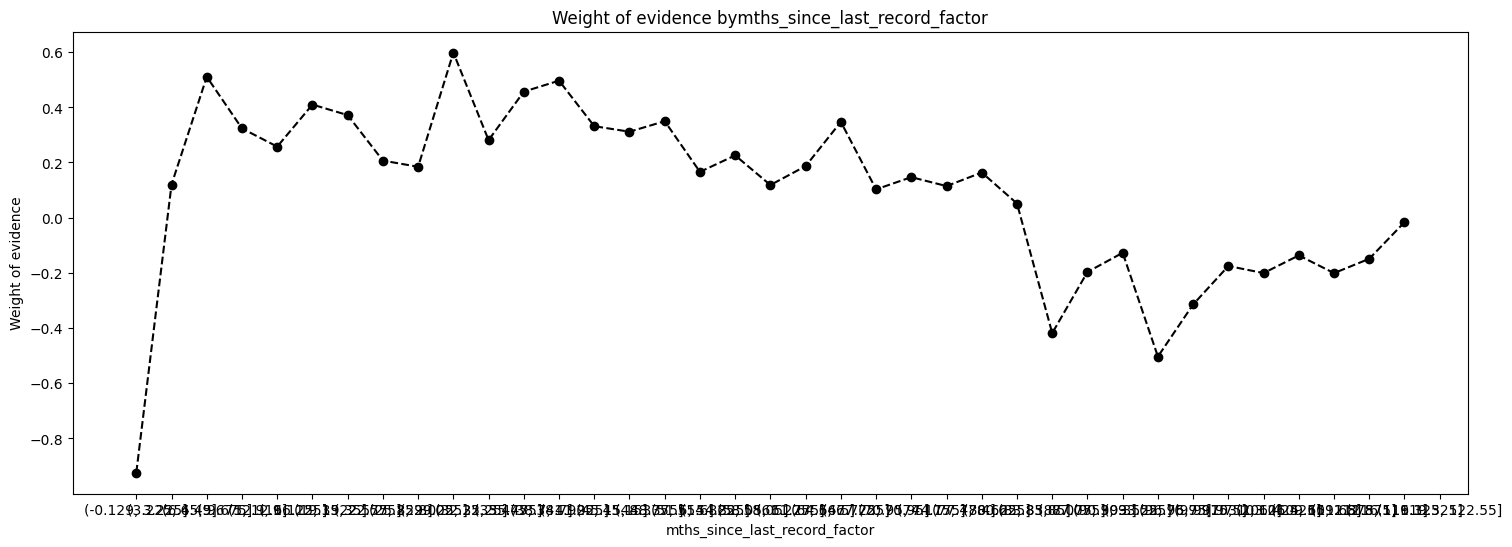

In [193]:
plot_by_woe_continuous(woe_continuous(features_preprocessed, 'mths_since_last_record_factor', targets_preprocessed))

In [194]:
# Assign categories based on the weight of evidence
features_preprocessed['mths_since_last_record:Missing'] = np.where((features_preprocessed['mths_since_last_record'].isnull()), 1, 0)
features_preprocessed['mths_since_last_record:0-2'] = np.where((features_preprocessed['mths_since_last_record'] >= 0) & (features_preprocessed['mths_since_last_record'] <= 2), 1, 0)
features_preprocessed['mths_since_last_record:3-20'] = np.where((features_preprocessed['mths_since_last_record'] >= 3) & (features_preprocessed['mths_since_last_record'] <= 20), 1, 0)
features_preprocessed['mths_since_last_record:21-31'] = np.where((features_preprocessed['mths_since_last_record'] >= 21) & (features_preprocessed['mths_since_last_record'] <= 31), 1, 0)
features_preprocessed['mths_since_last_record:32-80'] = np.where((features_preprocessed['mths_since_last_record'] >= 32) & (features_preprocessed['mths_since_last_record'] <= 80), 1, 0)
features_preprocessed['mths_since_last_record:81-86'] = np.where((features_preprocessed['mths_since_last_record'] >= 81) & (features_preprocessed['mths_since_last_record'] <= 86), 1, 0)
features_preprocessed['mths_since_last_record:>=86'] = np.where((features_preprocessed['mths_since_last_record'] > 86), 1, 0)

In [195]:
# Save the modified data to a csv format
training_features = features_preprocessed
training_features.to_csv('Training_Features.csv')
targets_preprocessed.to_csv('Training_Targets.csv')

Repeat the process for the testing data

In [196]:
# Create a copy of the data for preprocessing
test_features_preprocessed = X_test
test_targets_preprocessed = y_test


In [197]:
# Home ownership categories
test_features_preprocessed['home_ownership:RENT_OTHER_NONE_ANY'] = sum ([test_features_preprocessed['home_ownership:RENT'], test_features_preprocessed['home_ownership:OTHER'],
                                                              test_features_preprocessed['home_ownership:NONE'], test_features_preprocessed['home_ownership:ANY'],])

In [198]:
# Addr_state categories
test_features_preprocessed['addr_state:NE_IA_NV_FL_HI_AL'] = sum([test_features_preprocessed['addr_state:NE'],
                                              test_features_preprocessed['addr_state:IA'], test_features_preprocessed['addr_state:NV'],
                                              test_features_preprocessed['addr_state:FL'], test_features_preprocessed['addr_state:HI'],
                                                          test_features_preprocessed['addr_state:AL']])

test_features_preprocessed['addr_state:NM_VA'] = sum([test_features_preprocessed['addr_state:NM'], test_features_preprocessed['addr_state:VA']])

test_features_preprocessed['addr_state:OK_TN_MO_LA_MD_NC'] = sum([test_features_preprocessed['addr_state:OK'], test_features_preprocessed['addr_state:TN'],
                                              test_features_preprocessed['addr_state:MO'], test_features_preprocessed['addr_state:LA'],
                                              test_features_preprocessed['addr_state:MD'], test_features_preprocessed['addr_state:NC']])

test_features_preprocessed['addr_state:UT_KY_AZ_NJ'] = sum([test_features_preprocessed['addr_state:UT'], test_features_preprocessed['addr_state:KY'],
                                              test_features_preprocessed['addr_state:AZ'], test_features_preprocessed['addr_state:NJ']])

test_features_preprocessed['addr_state:AR_MI_PA_OH_MN'] = sum([test_features_preprocessed['addr_state:AR'], test_features_preprocessed['addr_state:MI'],
                                              test_features_preprocessed['addr_state:PA'], test_features_preprocessed['addr_state:OH'],
                                              test_features_preprocessed['addr_state:MN']])

test_features_preprocessed['addr_state:RI_MA_DE_SD_IN'] = sum([test_features_preprocessed['addr_state:RI'], test_features_preprocessed['addr_state:MA'],
                                              test_features_preprocessed['addr_state:DE'], test_features_preprocessed['addr_state:SD'],
                                              test_features_preprocessed['addr_state:IN']])

test_features_preprocessed['addr_state:GA_WA_OR'] = sum([test_features_preprocessed['addr_state:GA'], test_features_preprocessed['addr_state:WA'],
                                              test_features_preprocessed['addr_state:OR']])

test_features_preprocessed['addr_state:WI_MT'] = sum([test_features_preprocessed['addr_state:WI'], test_features_preprocessed['addr_state:MT']])

test_features_preprocessed['addr_state:IL_CT'] = sum([test_features_preprocessed['addr_state:IL'], test_features_preprocessed['addr_state:CT']])

test_features_preprocessed['addr_state:KS_SC_CO_VT_AK_MS'] = sum([test_features_preprocessed['addr_state:KS'], test_features_preprocessed['addr_state:SC'],
                                              test_features_preprocessed['addr_state:CO'], test_features_preprocessed['addr_state:VT'],
                                              test_features_preprocessed['addr_state:AK'], test_features_preprocessed['addr_state:MS']])

test_features_preprocessed['addr_state:WV_NH_WY_DC_ME_ID'] = sum([test_features_preprocessed['addr_state:WV'], test_features_preprocessed['addr_state:NH'],
                                              test_features_preprocessed['addr_state:WY'], test_features_preprocessed['addr_state:DC'],
                                              test_features_preprocessed['addr_state:ME'], test_features_preprocessed['addr_state:ID']])


In [199]:
# Catagories for purpose of loan
test_features_preprocessed['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([test_features_preprocessed['purpose:educational'], test_features_preprocessed['purpose:small_business'],
                                                                test_features_preprocessed['purpose:wedding'], test_features_preprocessed['purpose:renewable_energy'],
                                                                 test_features_preprocessed['purpose:moving'], test_features_preprocessed['purpose:house']])
test_features_preprocessed['purpose:oth__med__vacation'] = sum([test_features_preprocessed['purpose:other'], test_features_preprocessed['purpose:medical'],
                                             test_features_preprocessed['purpose:vacation']])
test_features_preprocessed['purpose:major_purch__car__home_impr'] = sum([test_features_preprocessed['purpose:major_purchase'], test_features_preprocessed['purpose:car'],
                                                        test_features_preprocessed['purpose:home_improvement']])



In [200]:
# Categories for term of loan
test_features_preprocessed['term:36'] = np.where((test_features_preprocessed['term']==36),1,0)
test_features_preprocessed['term:60'] = np.where((test_features_preprocessed['term']==60),1,0)

In [201]:
# Categories for emp length
test_features_preprocessed['emp_length:0'] = np.where(test_features_preprocessed['emp_length'].isin([0]), 1, 0)
test_features_preprocessed['emp_length:1'] = np.where(test_features_preprocessed['emp_length'].isin([1]), 1, 0)
test_features_preprocessed['emp_length:2-4'] = np.where(test_features_preprocessed['emp_length'].isin(range(2, 5)), 1, 0)
test_features_preprocessed['emp_length:5-6'] = np.where(test_features_preprocessed['emp_length'].isin(range(5, 7)), 1, 0)
test_features_preprocessed['emp_length:7-9'] = np.where(test_features_preprocessed['emp_length'].isin(range(7, 10)), 1, 0)
test_features_preprocessed['emp_length:10'] = np.where(test_features_preprocessed['emp_length'].isin([10]), 1, 0)

In [202]:
# Assign bins for months since issue d factor
test_features_preprocessed['mths_since_issue_d_factor'] = pd.cut(test_features_preprocessed['mths_since_issue_d'],40)

In [203]:
# Assign categories for interest rate
test_features_preprocessed['int_rate:<9.548'] = np.where((test_features_preprocessed['int_rate'] <= 9.548), 1, 0)
test_features_preprocessed['int_rate:9.548-12.025'] = np.where((test_features_preprocessed['int_rate'] > 9.548) & (test_features_preprocessed['int_rate'] <= 12.025), 1, 0)
test_features_preprocessed['int_rate:12.025-15.74'] = np.where((test_features_preprocessed['int_rate'] > 12.025) & (test_features_preprocessed['int_rate'] <= 15.74), 1, 0)
test_features_preprocessed['int_rate:15.74-20.281'] = np.where((test_features_preprocessed['int_rate'] > 15.74) & (test_features_preprocessed['int_rate'] <= 20.281), 1, 0)
test_features_preprocessed['int_rate:>20.281'] = np.where((test_features_preprocessed['int_rate'] > 20.281), 1, 0)

In [204]:
# Assign bins for funded amount
test_features_preprocessed['funded_amnt_factor'] = pd.cut(test_features_preprocessed['funded_amnt'], 40)

In [205]:
# Assign bins for months since earliest cr line factor
test_features_preprocessed['mths_since_earliest_cr_line_factor'] = pd.cut(test_features_preprocessed['mths_since_earliest_cr_line'], 40)

In [206]:
# Assign categories for the mths_earliest_cr_line
test_features_preprocessed['mths_since_earliest_cr_line:<140'] = np.where(test_features_preprocessed['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
test_features_preprocessed['mths_since_earliest_cr_line:141-164'] = np.where(test_features_preprocessed['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
test_features_preprocessed['mths_since_earliest_cr_line:165-247'] = np.where(test_features_preprocessed['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
test_features_preprocessed['mths_since_earliest_cr_line:248-270'] = np.where(test_features_preprocessed['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
test_features_preprocessed['mths_since_earliest_cr_line:271-352'] = np.where(test_features_preprocessed['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
test_features_preprocessed['mths_since_earliest_cr_line:>352'] = np.where(test_features_preprocessed['mths_since_earliest_cr_line'].isin(range(353, int(test_features_preprocessed['mths_since_earliest_cr_line'].max()))), 1, 0)

In [207]:
# Assign categories for number of delinquencies over the last 2 years
test_features_preprocessed['delinq_2yrs:0'] = np.where((test_features_preprocessed['delinq_2yrs'] == 0), 1, 0)
test_features_preprocessed['delinq_2yrs:1-3'] = np.where((test_features_preprocessed['delinq_2yrs'] >= 1) & (test_features_preprocessed['delinq_2yrs'] <= 3), 1, 0)
test_features_preprocessed['delinq_2yrs:>=4'] = np.where((test_features_preprocessed['delinq_2yrs'] >= 9), 1, 0)

In [208]:
# Assign categories for number of inquiries made over last 6 months
test_features_preprocessed['inq_last_6mths:0'] = np.where((test_features_preprocessed['inq_last_6mths'] == 0), 1, 0)
test_features_preprocessed['inq_last_6mths:1-2'] = np.where((test_features_preprocessed['inq_last_6mths'] >= 1) & (test_features_preprocessed['inq_last_6mths'] <= 2), 1, 0)
test_features_preprocessed['inq_last_6mths:3-6'] = np.where((test_features_preprocessed['inq_last_6mths'] >= 3) & (test_features_preprocessed['inq_last_6mths'] <= 6), 1, 0)
test_features_preprocessed['inq_last_6mths:>6'] = np.where((test_features_preprocessed['inq_last_6mths'] > 6), 1, 0)

In [209]:
# Assign categories for the number of accounts currently open
test_features_preprocessed['open_acc:0'] = np.where((test_features_preprocessed['open_acc'] == 0), 1, 0)
test_features_preprocessed['open_acc:1-3'] = np.where((test_features_preprocessed['open_acc'] >= 1) & (test_features_preprocessed['open_acc'] <= 3), 1, 0)
test_features_preprocessed['open_acc:4-12'] = np.where((test_features_preprocessed['open_acc'] >= 4) & (test_features_preprocessed['open_acc'] <= 12), 1, 0)
test_features_preprocessed['open_acc:13-17'] = np.where((test_features_preprocessed['open_acc'] >= 13) & (test_features_preprocessed['open_acc'] <= 17), 1, 0)
test_features_preprocessed['open_acc:18-22'] = np.where((test_features_preprocessed['open_acc'] >= 18) & (test_features_preprocessed['open_acc'] <= 22), 1, 0)
test_features_preprocessed['open_acc:23-25'] = np.where((test_features_preprocessed['open_acc'] >= 23) & (test_features_preprocessed['open_acc'] <= 25), 1, 0)
test_features_preprocessed['open_acc:26-30'] = np.where((test_features_preprocessed['open_acc'] >= 26) & (test_features_preprocessed['open_acc'] <= 30), 1, 0)
test_features_preprocessed['open_acc:>=31'] = np.where((test_features_preprocessed['open_acc'] >= 31), 1, 0)

In [210]:
# Assign categories for number of entries in public record
test_features_preprocessed['pub_rec:0-2'] = np.where((test_features_preprocessed['pub_rec'] >= 0) & (test_features_preprocessed['pub_rec'] <= 2), 1, 0)
test_features_preprocessed['pub_rec:3-4'] = np.where((test_features_preprocessed['pub_rec'] >= 3) & (test_features_preprocessed['pub_rec'] <= 4), 1, 0)
test_features_preprocessed['pub_rec:>=5'] = np.where((test_features_preprocessed['pub_rec'] >= 5), 1, 0)

In [218]:
# Assign bins for the total account factor
test_features_preprocessed['total_acc_factor'] = pd.cut(test_features_preprocessed['total_acc'], 40)

In [219]:
# Assign categories for the total number of credit lines open
test_features_preprocessed['total_acc:<=27'] = np.where((test_features_preprocessed['total_acc'] <= 27), 1, 0)
test_features_preprocessed['total_acc:28-51'] = np.where((test_features_preprocessed['total_acc'] >= 28) & (test_features_preprocessed['total_acc'] <= 51), 1, 0)
test_features_preprocessed['total_acc:>=52'] = np.where((test_features_preprocessed['total_acc'] >= 52), 1, 0)

In [220]:
# Assign categories for the number of accounts now in delinquency
test_features_preprocessed['acc_now_delinq:0'] = np.where((test_features_preprocessed['acc_now_delinq'] == 0), 1, 0)
test_features_preprocessed['acc_now_delinq:>=1'] = np.where((test_features_preprocessed['acc_now_delinq'] >= 1), 1, 0)

In [221]:
# Assign bins for the total_rev_hi_lim_factor
test_features_preprocessed['total_rev_hi_lim_factor'] = pd.cut(test_features_preprocessed['total_rev_hi_lim'], 2000)

In [223]:
# Then assign categories
test_features_preprocessed['total_rev_hi_lim:<=5K'] = np.where((test_features_preprocessed['total_rev_hi_lim'] <= 5000), 1, 0)
test_features_preprocessed['total_rev_hi_lim:5K-10K'] = np.where((test_features_preprocessed['total_rev_hi_lim'] > 5000) & (test_features_preprocessed['total_rev_hi_lim'] <= 10000), 1, 0)
test_features_preprocessed['total_rev_hi_lim:10K-20K'] = np.where((test_features_preprocessed['total_rev_hi_lim'] > 10000) & (test_features_preprocessed['total_rev_hi_lim'] <= 20000), 1, 0)
test_features_preprocessed['total_rev_hi_lim:20K-30K'] = np.where((test_features_preprocessed['total_rev_hi_lim'] > 20000) & (test_features_preprocessed['total_rev_hi_lim'] <= 30000), 1, 0)
test_features_preprocessed['total_rev_hi_lim:30K-40K'] = np.where((test_features_preprocessed['total_rev_hi_lim'] > 30000) & (test_features_preprocessed['total_rev_hi_lim'] <= 40000), 1, 0)
test_features_preprocessed['total_rev_hi_lim:40K-55K'] = np.where((test_features_preprocessed['total_rev_hi_lim'] > 40000) & (test_features_preprocessed['total_rev_hi_lim'] <= 55000), 1, 0)
test_features_preprocessed['total_rev_hi_lim:55K-95K'] = np.where((test_features_preprocessed['total_rev_hi_lim'] > 55000) & (test_features_preprocessed['total_rev_hi_lim'] <= 95000), 1, 0)
test_features_preprocessed['total_rev_hi_lim:>95K'] = np.where((test_features_preprocessed['total_rev_hi_lim'] > 95000), 1, 0)


In [224]:
# Assign bins for the installment factor
test_features_preprocessed['installment_factor'] = pd.cut(test_features_preprocessed['installment'], 40)

In [225]:
# We will look at annual income less than 140000, then split the annual income into bins
test_features_preprocessed = test_features_preprocessed.loc[test_features_preprocessed['annual_inc'] <= 140000,:  ]
test_features_preprocessed['annual_inc_factor'] = pd.cut(test_features_preprocessed['annual_inc'],40)

In [226]:
# Assign categories for the annual income
test_features_preprocessed['annual_inc:<20K'] = np.where((test_features_preprocessed['annual_inc'] <= 20000), 1, 0)
test_features_preprocessed['annual_inc:20K-30K'] = np.where((test_features_preprocessed['annual_inc'] > 20000) & (test_features_preprocessed['annual_inc'] <= 30000), 1, 0)
test_features_preprocessed['annual_inc:30K-40K'] = np.where((test_features_preprocessed['annual_inc'] > 30000) & (test_features_preprocessed['annual_inc'] <= 40000), 1, 0)
test_features_preprocessed['annual_inc:40K-50K'] = np.where((test_features_preprocessed['annual_inc'] > 40000) & (test_features_preprocessed['annual_inc'] <= 50000), 1, 0)
test_features_preprocessed['annual_inc:50K-60K'] = np.where((test_features_preprocessed['annual_inc'] > 50000) & (test_features_preprocessed['annual_inc'] <= 60000), 1, 0)
test_features_preprocessed['annual_inc:60K-70K'] = np.where((test_features_preprocessed['annual_inc'] > 60000) & (test_features_preprocessed['annual_inc'] <= 70000), 1, 0)
test_features_preprocessed['annual_inc:70K-80K'] = np.where((test_features_preprocessed['annual_inc'] > 70000) & (test_features_preprocessed['annual_inc'] <= 80000), 1, 0)
test_features_preprocessed['annual_inc:80K-90K'] = np.where((test_features_preprocessed['annual_inc'] > 80000) & (test_features_preprocessed['annual_inc'] <= 90000), 1, 0)
test_features_preprocessed['annual_inc:90K-100K'] = np.where((test_features_preprocessed['annual_inc'] > 90000) & (test_features_preprocessed['annual_inc'] <= 100000), 1, 0)
test_features_preprocessed['annual_inc:100K-120K'] = np.where((test_features_preprocessed['annual_inc'] > 100000) & (test_features_preprocessed['annual_inc'] <= 120000), 1, 0)
test_features_preprocessed['annual_inc:120K-140K'] = np.where((test_features_preprocessed['annual_inc'] > 120000) & (test_features_preprocessed['annual_inc'] <= 140000), 1, 0)
test_features_preprocessed['annual_inc:>140K'] = np.where((test_features_preprocessed['annual_inc'] > 140000), 1, 0)

In [227]:
# Look at the non null months since last delinquency and split it into bins
test_features_preprocessed = test_features_preprocessed[pd.notnull(test_features_preprocessed['mths_since_last_delinq'])]
test_features_preprocessed['mths_since_last_delinq_factor'] = pd.cut(test_features_preprocessed['mths_since_last_delinq'], 40)

In [228]:
# Assign categories for the months since last delinquency
test_features_preprocessed['mths_since_last_delinq:Missing'] = np.where((test_features_preprocessed['mths_since_last_delinq'].isnull()), 1, 0)
test_features_preprocessed['mths_since_last_delinq:0-3'] = np.where((test_features_preprocessed['mths_since_last_delinq'] >= 0) & (test_features_preprocessed['mths_since_last_delinq'] <= 3), 1, 0)
test_features_preprocessed['mths_since_last_delinq:4-30'] = np.where((test_features_preprocessed['mths_since_last_delinq'] >= 4) & (test_features_preprocessed['mths_since_last_delinq'] <= 30), 1, 0)
test_features_preprocessed['mths_since_last_delinq:31-56'] = np.where((test_features_preprocessed['mths_since_last_delinq'] >= 31) & (test_features_preprocessed['mths_since_last_delinq'] <= 56), 1, 0)
test_features_preprocessed['mths_since_last_delinq:>=57'] = np.where((test_features_preprocessed['mths_since_last_delinq'] >= 57), 1, 0)

In [229]:
# Look at the dti less than or equal to 35 and assign bins
test_features_preprocessed = test_features_preprocessed.loc[test_features_preprocessed['dti'] <= 35, : ]
test_features_preprocessed['dti_factor'] = pd.cut(test_features_preprocessed['dti'], 50)

In [230]:
# Assign categories for the dti
test_features_preprocessed['dti:<=1.4'] = np.where((test_features_preprocessed['dti'] <= 1.4), 1, 0)
test_features_preprocessed['dti:1.4-3.5'] = np.where((test_features_preprocessed['dti'] > 1.4) & (test_features_preprocessed['dti'] <= 3.5), 1, 0)
test_features_preprocessed['dti:3.5-7.7'] = np.where((test_features_preprocessed['dti'] > 3.5) & (test_features_preprocessed['dti'] <= 7.7), 1, 0)
test_features_preprocessed['dti:7.7-10.5'] = np.where((test_features_preprocessed['dti'] > 7.7) & (test_features_preprocessed['dti'] <= 10.5), 1, 0)
test_features_preprocessed['dti:10.5-16.1'] = np.where((test_features_preprocessed['dti'] > 10.5) & (test_features_preprocessed['dti'] <= 16.1), 1, 0)
test_features_preprocessed['dti:16.1-20.3'] = np.where((test_features_preprocessed['dti'] > 16.1) & (test_features_preprocessed['dti'] <= 20.3), 1, 0)
test_features_preprocessed['dti:20.3-21.7'] = np.where((test_features_preprocessed['dti'] > 20.3) & (test_features_preprocessed['dti'] <= 21.7), 1, 0)
test_features_preprocessed['dti:21.7-22.4'] = np.where((test_features_preprocessed['dti'] > 21.7) & (test_features_preprocessed['dti'] <= 22.4), 1, 0)
test_features_preprocessed['dti:22.4-35'] = np.where((test_features_preprocessed['dti'] > 22.4) & (test_features_preprocessed['dti'] <= 35), 1, 0)
test_features_preprocessed['dti:>35'] = np.where((test_features_preprocessed['dti'] > 35), 1, 0)

In [231]:
# For the months since last record, look at non null values only and assign bins
test_features_preprocessed = test_features_preprocessed[pd.notnull(test_features_preprocessed['mths_since_last_record'])]
test_features_preprocessed['mths_since_last_record_factor'] = pd.cut(test_features_preprocessed['mths_since_last_record'], 40)

In [232]:
# Assign categories for the months since last record
test_features_preprocessed['mths_since_last_record:Missing'] = np.where((test_features_preprocessed['mths_since_last_record'].isnull()), 1, 0)
test_features_preprocessed['mths_since_last_record:0-2'] = np.where((test_features_preprocessed['mths_since_last_record'] >= 0) & (test_features_preprocessed['mths_since_last_record'] <= 2), 1, 0)
test_features_preprocessed['mths_since_last_record:3-20'] = np.where((test_features_preprocessed['mths_since_last_record'] >= 3) & (test_features_preprocessed['mths_since_last_record'] <= 20), 1, 0)
test_features_preprocessed['mths_since_last_record:21-31'] = np.where((test_features_preprocessed['mths_since_last_record'] >= 21) & (test_features_preprocessed['mths_since_last_record'] <= 31), 1, 0)
test_features_preprocessed['mths_since_last_record:32-80'] = np.where((test_features_preprocessed['mths_since_last_record'] >= 32) & (test_features_preprocessed['mths_since_last_record'] <= 80), 1, 0)
test_features_preprocessed['mths_since_last_record:81-86'] = np.where((test_features_preprocessed['mths_since_last_record'] >= 81) & (test_features_preprocessed['mths_since_last_record'] <= 86), 1, 0)
test_features_preprocessed['mths_since_last_record:>=86'] = np.where((test_features_preprocessed['mths_since_last_record'] > 86), 1, 0)

In [233]:
# Save the test data as a csv
test_features_preprocessed.to_csv('test_features.csv', index=True)
test_targets_preprocessed.to_csv('test_targets.csv', index=True)

Probability of default using logistic regression, performance evaluation, scorecard creation and cutoffs

In [234]:
# Get the dimensions of the training data
training_features_shape = training_features.shape
targets_preprocessed_shape = targets_preprocessed.shape

print("Training Features Shape:", training_features_shape)
print("Training Targets Shape:", targets_preprocessed_shape)

Training Features Shape: (23514, 312)
Training Targets Shape: (373028,)


In [236]:
# Get the dimensions of the test data
print("Test Features Shape:", test_features_preprocessed.shape)
print("Test Targets Shape:", test_targets_preprocessed.shape)

Test Features Shape: (5936, 312)
Test Targets Shape: (93257,)


In [238]:
# Retain only the data in the training set with the same index
common_index = training_features.index.intersection(targets_preprocessed.index)

training_features2 = training_features.loc[common_index]
targets_preprocessed2 = targets_preprocessed.loc[common_index]

# Verify the shapes after alignment
print("Training Features Shape (after alignment):", training_features2.shape)
print("Training Targets Shape (after alignment):", targets_preprocessed2.shape)

Training Features Shape (after alignment): (23514, 312)
Training Targets Shape (after alignment): (23514,)


In [239]:
# Retain only the data in the testing set with the same index
common_index = test_features_preprocessed.index.intersection(test_targets_preprocessed.index)

test_features_preprocessed2 = test_features_preprocessed.loc[common_index]
test_targets_preprocessed2 = test_targets_preprocessed.loc[common_index]

# Verify the shapes after alignment
print("Test Features Shape (after alignment):", test_features_preprocessed2.shape)
print("Test Targets Shape (after alignment):", test_targets_preprocessed2.shape)

Test Features Shape (after alignment): (5936, 312)
Test Targets Shape (after alignment): (5936,)


Avoid the dummy variable trap

In [240]:
# Here we select a limited set of input variables
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]

In [241]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [242]:
# Load variables into a new dataframe for the training
training_features2_ref_categories = training_features2.loc[: ,features_all]
# Then drop the ones in the reference category
training_features2_ref_categories = training_features2_ref_categories.drop(ref_categories, axis = 1)

training_features2_ref_categories.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
id                                                               
3004635     False     True    False    False    False    False   
25246017    False    False    False    False    False     True   
17203145    False    False     True    False    False    False   
4805761     False    False     True    False    False    False   
16402563    False     True    False    False    False    False   

          home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
id                                                                        
3004635                False                    False                 0   
25246017               False                     True                 0   
17203145               False                     True                 0   
4805761                False                     True                 0   
16402563               False                     True                 0   

          addr_state:NY  ...  mths_since_last_delinq:Missing  \
id                       ...                                   
3004635           False  ...                               0   
25246017          False  ...                               0   
17203145          False  ...                               0   
4805761           False  ...                               0   
16402563          False  ...                               0   

          mths_since_last_delinq:4-30  mths_since_last_delinq:31-56  \
id                                                                    
3004635                             0                             0   
25246017                            0                             0   
17203145                            1                             0   
4805761                             0                             0   
16402563                            0                             0   

          mths_since_last_delinq:>=57  mths_since_last_record:Missing  \
id                                                                      
3004635                             1                               0   
25246017                            1                               0   
17203145                            0                               0   
4805761                             1                               0   
16402563                            1                               0   

          mths_since_last_record:3-20  mths_since_last_record:21-31  \
id                                                                    
3004635                             0                             0   
25246017                            0                             0   
17203145                            1                             0   
4805761                             0                             0   
16402563                            0                             0   

          mths_since_last_record:32-80  mths_since_last_record:81-86  \
id                                                                     
3004635                              0                             0   
25246017                             1                             0   
17203145                             0                             0   
4805761                              1                             0   
16402563                             1                             0   

          mths_since_last_record:>=86  
id                                     
3004635                             1  
25246017                            0  
17203145                            0  
4805761                             0  
16402563                            0  

[5 rows x 97 columns]

In [243]:
# Replace True and False values with 0 and 1
training_features2_ref_categories = training_features2_ref_categories.replace({True: 1, False: 0})
training_features2_ref_categories.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
id                                                               
3004635         0        1        0        0        0        0   
25246017        0        0        0        0        0        1   
17203145        0        0        1        0        0        0   
4805761         0        0        1        0        0        0   
16402563        0        1        0        0        0        0   

          home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
id                                                                        
3004635                    0                        0                 0   
25246017                   0                        1                 0   
17203145                   0                        1                 0   
4805761                    0                        1                 0   
16402563                   0                        1                 0   

          addr_state:NY  ...  mths_since_last_delinq:Missing  \
id                       ...                                   
3004635               0  ...                               0   
25246017              0  ...                               0   
17203145              0  ...                               0   
4805761               0  ...                               0   
16402563              0  ...                               0   

          mths_since_last_delinq:4-30  mths_since_last_delinq:31-56  \
id                                                                    
3004635                             0                             0   
25246017                            0                             0   
17203145                            1                             0   
4805761                             0                             0   
16402563                            0                             0   

          mths_since_last_delinq:>=57  mths_since_last_record:Missing  \
id                                                                      
3004635                             1                               0   
25246017                            1                               0   
17203145                            0                               0   
4805761                             1                               0   
16402563                            1                               0   

          mths_since_last_record:3-20  mths_since_last_record:21-31  \
id                                                                    
3004635                             0                             0   
25246017                            0                             0   
17203145                            1                             0   
4805761                             0                             0   
16402563                            0                             0   

          mths_since_last_record:32-80  mths_since_last_record:81-86  \
id                                                                     
3004635                              0                             0   
25246017                             1                             0   
17203145                             0                             0   
4805761                              1                             0   
16402563                             1                             0   

          mths_since_last_record:>=86  
id                                     
3004635                             1  
25246017                            0  
17203145                            0  
4805761                             0  
16402563                            0  

[5 rows x 97 columns]

Prediction of default PD model fit with p values

In [245]:
# Define a class to carry out the logistic regression but using a p-value
class LogisticRegression_with_p_values:

    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)

    def fit(self, X, y, epsilon=1e-5):  # Add epsilon parameter for regularization
        self.model.fit(X, y)

        # Get p-values for the fitted model
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)  # Fisher Information Matrix

        # Regularize the Fisher Information Matrix if it's singular
        I = np.eye(F_ij.shape[0])  # Identity matrix for regularization
        try:
            # Attempt to invert F_ij directly
            Cramer_Rao = np.linalg.inv(F_ij)
        except np.linalg.LinAlgError:
            # If inversion fails, regularize by adding epsilon*I
            Cramer_Rao = np.linalg.inv(F_ij + epsilon * I)

        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates  # Z-score for each model coefficient
        p_values = [stats.norm.sf(abs(x)) * 2 for x in z_scores]  # Two-tailed p-values

        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [246]:
# Define the model and fit it onto the training data
log_model = LogisticRegression_with_p_values()
log_model.fit(training_features2_ref_categories, targets_preprocessed2)

In [247]:
# Create a summary table for the results
feature_name = training_features2_ref_categories.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(log_model.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', log_model.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = log_model.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

Feature name  Coefficients      p_values
0                             Intercept     -1.163254           NaN
1                               grade:A      0.907803  5.906834e-03
2                               grade:B      1.007598  7.404798e-07
3                               grade:C      0.916242  6.671410e-07
4                               grade:D      0.709205  2.960941e-05
5                               grade:E      0.557148  3.756460e-04
6                               grade:F      0.258498  1.186613e-01
7                    home_ownership:OWN      0.011507  8.849676e-01
8               home_ownership:MORTGAGE      0.057577  2.402236e-01
9                      addr_state:NM_VA     -0.088409  4.989033e-01
10                        addr_state:NY     -0.122891  2.147127e-01
11         addr_state:OK_TN_MO_LA_MD_NC      0.002186  9.815431e-01
12                        addr_state:CA     -0.113032  2.056371e-01
13               addr_state:UT_KY_AZ_NJ      0.058207  5.733718e-01
14            addr_state:AR_MI_PA_OH_MN      0.024766  7.795767e-01
15            addr_state:RI_MA_DE_SD_IN     -0.068733  5.383337e-01
16                  addr_state:GA_WA_OR      0.069968  4.936048e-01
17                     addr_state:WI_MT      0.322009  1.044843e-01
18                        addr_state:TX      0.260062  3.375943e-02
19                     addr_state:IL_CT      0.134122  2.671028e-01
20         addr_state:KS_SC_CO_VT_AK_MS      0.053032  6.528570e-01
21         addr_state:WV_NH_WY_DC_ME_ID      0.661576  2.705034e-03
22     verification_status:Not Verified      0.087092  1.731829e-01
23  verification_status:Source Verified      0.059155  2.560771e-01
24                  purpose:credit_card      0.462452  4.077560e-05
25           purpose:debt_consolidation      0.319326  1.358938e-03
26           purpose:oth__med__vacation      0.485823  4.849444e-05
27  purpose:major_purch__car__home_impr      0.484661  3.829879e-05
28                initial_list_status:w      0.177323  1.722274e-04
29                              term:36      0.020201  7.329327e-01
30                         emp_length:1      0.241965  2.238667e-02
31                       emp_length:2-4      0.109427  1.326322e-01
32                       emp_length:5-6      0.207634  1.619628e-02
33                       emp_length:7-9      0.229648  4.751209e-03
34                        emp_length:10      0.280756  4.531263e-05
35                      int_rate:<9.548      1.158634  1.321325e-05
36                int_rate:9.548-12.025      0.573008  4.869948e-04
37                int_rate:12.025-15.74      0.345951  6.134632e-03
38                int_rate:15.74-20.281      0.180465  7.126470e-02
39  mths_since_earliest_cr_line:141-164     -0.042960  8.444921e-01
40  mths_since_earliest_cr_line:165-247     -0.089501  6.442456e-01
41  mths_since_earliest_cr_line:248-270     -0.204784  3.086547e-01
42  mths_since_earliest_cr_line:271-352     -0.102900  5.991157e-01
43     mths_since_earliest_cr_line:>352      0.039026  8.443100e-01
44                        delinq_2yrs:0      0.141805  3.969288e-01
45                      delinq_2yrs:1-3      0.186064  2.461341e-01
46                     inq_last_6mths:0      0.402957  7.628303e-02
47                   inq_last_6mths:1-2      0.363789  1.075913e-01
48                   inq_last_6mths:3-6      0.082386  7.181048e-01
49                         open_acc:1-3     -0.399703  9.959660e-01
50                        open_acc:4-12     -0.109923  9.988906e-01
51                       open_acc:13-17     -0.162442  9.983606e-01
52                       open_acc:18-22     -0.195871  9.980232e-01
53                       open_acc:23-25     -0.158325  9.984021e-01
54                       open_acc:26-30      0.193771  9.980444e-01
55                        open_acc:>=31     -0.238984  9.975881e-01
56                          pub_rec:3-4      0.184694  1.514834e-01
57                          pub_rec:>=5     -0.068854  7.661053e-01
58             

Repeat the logistic regression but after having removed p values deemed non statistically significant

In [248]:
# Refined variables
features_all2 = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
]



In [249]:
ref_categories2 = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'int_rate:>20.281',
'inq_last_6mths:>6',
'pub_rec:0-2',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35'
]

In [250]:
# Create a new dataframe for training purposes
training_features3_ref_categories = training_features2.loc[: , features_all2]

# Remove the variables with reference categories.
training_features3_ref_categories = training_features3_ref_categories.drop(ref_categories2, axis = 1)

training_features3_ref_categories.head()



grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
id                                                               
3004635     False     True    False    False    False    False   
25246017    False    False    False    False    False     True   
17203145    False    False     True    False    False    False   
4805761     False    False     True    False    False    False   
16402563    False     True    False    False    False    False   

          home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
id                                                                        
3004635                False                    False                 0   
25246017               False                     True                 0   
17203145               False                     True                 0   
4805761                False                     True                 0   
16402563               False                     True                 0   

          addr_state:NY  ...  annual_inc:>140K  dti:<=1.4  dti:1.4-3.5  \
id                       ...                                             
3004635           False  ...                 0          0            0   
25246017          False  ...                 0          0            0   
17203145          False  ...                 0          0            0   
4805761           False  ...                 0          0            0   
16402563          False  ...                 0          0            1   

          dti:3.5-7.7  dti:7.7-10.5  dti:10.5-16.1  dti:16.1-20.3  \
id                                                                  
3004635             0             0              1              0   
25246017            0             1              0              0   
17203145            0             0              0              0   
4805761             1             0              0              0   
16402563            0             0              0              0   

          dti:20.3-21.7  dti:21.7-22.4  dti:22.4-35  
id                                                   
3004635               0              0            0  
25246017              0              0            0  
17203145              0              1            0  
4805761               0              0            0  
16402563              0              0            0  

[5 rows x 71 columns]

In [251]:
# Replace True and False values with 0 and 1
training_features3_ref_categories = training_features3_ref_categories.replace({True: 1, False: 0})
training_features3_ref_categories.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
id                                                               
3004635         0        1        0        0        0        0   
25246017        0        0        0        0        0        1   
17203145        0        0        1        0        0        0   
4805761         0        0        1        0        0        0   
16402563        0        1        0        0        0        0   

          home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
id                                                                        
3004635                    0                        0                 0   
25246017                   0                        1                 0   
17203145                   0                        1                 0   
4805761                    0                        1                 0   
16402563                   0                        1                 0   

          addr_state:NY  ...  annual_inc:>140K  dti:<=1.4  dti:1.4-3.5  \
id                       ...                                             
3004635               0  ...                 0          0            0   
25246017              0  ...                 0          0            0   
17203145              0  ...                 0          0            0   
4805761               0  ...                 0          0            0   
16402563              0  ...                 0          0            1   

          dti:3.5-7.7  dti:7.7-10.5  dti:10.5-16.1  dti:16.1-20.3  \
id                                                                  
3004635             0             0              1              0   
25246017            0             1              0              0   
17203145            0             0              0              0   
4805761             1             0              0              0   
16402563            0             0              0              0   

          dti:20.3-21.7  dti:21.7-22.4  dti:22.4-35  
id                                                   
3004635               0              0            0  
25246017              0              0            0  
17203145              0              1            0  
4805761               0              0            0  
16402563              0              0            0  

[5 rows x 71 columns]

In [252]:
# Initialise a model and fit it onto the data
log_model2 = LogisticRegression_with_p_values()
log_model2.fit(training_features3_ref_categories, targets_preprocessed2)

In [253]:
# Create a summary table for the results
feature_name2 = training_features3_ref_categories.columns.values
summary_table2 = pd.DataFrame(columns = ['Feature name'], data = feature_name2)
summary_table2['Coefficients'] = np.transpose(log_model2.coef_)
summary_table2.index = summary_table2.index + 1
summary_table2.loc[0] = ['Intercept', log_model2.intercept_[0]]
summary_table2 = summary_table2.sort_index()
p_values2 = log_model2.p_values
p_values2 = np.append(np.nan, np.array(p_values2))
summary_table2['p_values'] = p_values2

summary_table2

Feature name  Coefficients      p_values
0                             Intercept     -0.959405           NaN
1                               grade:A      1.156454  3.475288e-04
2                               grade:B      1.306824  1.418219e-11
3                               grade:C      1.149504  8.984430e-11
4                               grade:D      0.876033  1.225480e-07
5                               grade:E      0.642809  3.070429e-05
6                               grade:F      0.273884  9.407299e-02
7                    home_ownership:OWN      0.020601  7.937295e-01
8               home_ownership:MORTGAGE      0.071450  1.399229e-01
9                      addr_state:NM_VA     -0.033314  7.975155e-01
10                        addr_state:NY     -0.096628  3.234499e-01
11         addr_state:OK_TN_MO_LA_MD_NC      0.023372  8.029726e-01
12                        addr_state:CA     -0.047018  5.949878e-01
13               addr_state:UT_KY_AZ_NJ      0.090136  3.789298e-01
14            addr_state:AR_MI_PA_OH_MN      0.071455  4.146364e-01
15            addr_state:RI_MA_DE_SD_IN     -0.043739  6.932293e-01
16                  addr_state:GA_WA_OR      0.099127  3.281722e-01
17                     addr_state:WI_MT      0.349057  7.377539e-02
18                        addr_state:TX      0.248101  4.154149e-02
19                     addr_state:IL_CT      0.167629  1.618995e-01
20         addr_state:KS_SC_CO_VT_AK_MS      0.060257  6.064301e-01
21         addr_state:WV_NH_WY_DC_ME_ID      0.640041  3.368415e-03
22     verification_status:Not Verified     -0.133624  2.467263e-02
23  verification_status:Source Verified      0.065701  2.051498e-01
24                  purpose:credit_card      0.531087  1.709156e-06
25           purpose:debt_consolidation      0.393099  5.842372e-05
26           purpose:oth__med__vacation      0.580740  8.599494e-07
27  purpose:major_purch__car__home_impr      0.577944  6.356765e-07
28                initial_list_status:w      0.258128  2.297643e-08
29                              term:36      0.043755  4.564233e-01
30                         emp_length:1      0.216894  3.879311e-02
31                       emp_length:2-4      0.116847  1.046959e-01
32                       emp_length:5-6      0.217457  1.094436e-02
33                       emp_length:7-9      0.227768  4.659263e-03
34                        emp_length:10      0.297834  1.233921e-05
35                      int_rate:<9.548      0.910501  4.403777e-04
36                int_rate:9.548-12.025      0.257491  9.302819e-02
37                int_rate:12.025-15.74      0.174852  1.457900e-01
38                int_rate:15.74-20.281      0.084148  3.890670e-01
39                     inq_last_6mths:0      0.643514  4.068949e-03
40                   inq_last_6mths:1-2      0.618171  5.584459e-03
41                   inq_last_6mths:3-6      0.322667  1.530977e-01
42                          pub_rec:3-4      0.375014  3.105258e-03
43                          pub_rec:>=5      0.125571  5.840284e-01
44                   acc_now_delinq:>=1      0.557792  9.986515e-02
45              total_rev_hi_lim:5K-10K      0.190050  1.696945e-02
46             total_rev_hi_lim:10K-20K      0.228678  2.968277e-03
47             total_rev_hi_lim:20K-30K      0.231194  9.407199e-03
48             total_rev_hi_lim:30K-40K      0.159794  1.661430e-01
49             total_rev_hi_lim:40K-55K      0.334209  3.247388e-02
50             total_rev_hi_lim:55K-95K      0.164870  4.033226e-01
51                total_rev_hi_lim:>95K      0.822188  9.112148e-02
52                   annual_inc:20K-30K      0.243658  1.168538e-01
53                   annual_inc:30K-40K      0.271118  6.480281e-02
54                   annual_inc:40K-50K      0.315644  3.112984e-02
55                   annual_inc:50K-60K      0.365363  1.332252e-02
56                   annual_inc:60K-70K      0.334257  2.682313e-02
57                   annual_inc:70K-80K      0.461448  2.980921e-03
58             

Now use our model to make predictions on the test data

In [254]:
# Prepare the testing data
test_features_preprocessed2_categories = test_features_preprocessed2.loc[: , features_all2]

# Remove the variables with reference categories.
test_features_preprocessed2_categories = test_features_preprocessed2_categories.drop(ref_categories2, axis = 1)

test_features_preprocessed2_categories.head()



grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
id                                                               
28302412     True    False    False    False    False    False   
11154585    False    False    False    False     True    False   
35783259    False    False     True    False    False    False   
10152422    False    False     True    False    False    False   
16342544    False    False     True    False    False    False   

          home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
id                                                                        
28302412               False                    False                 0   
11154585               False                     True                 0   
35783259               False                     True                 0   
10152422               False                    False                 0   
16342544               False                    False                 0   

          addr_state:NY  ...  annual_inc:>140K  dti:<=1.4  dti:1.4-3.5  \
id                       ...                                             
28302412           True  ...                 0          0            0   
11154585          False  ...                 0          0            0   
35783259          False  ...                 0          0            0   
10152422           True  ...                 0          0            0   
16342544          False  ...                 0          0            0   

          dti:3.5-7.7  dti:7.7-10.5  dti:10.5-16.1  dti:16.1-20.3  \
id                                                                  
28302412            1             0              0              0   
11154585            1             0              0              0   
35783259            0             0              0              1   
10152422            0             0              0              0   
16342544            0             0              0              1   

          dti:20.3-21.7  dti:21.7-22.4  dti:22.4-35  
id                                                   
28302412              0              0            0  
11154585              0              0            0  
35783259              0              0            0  
10152422              0              0            1  
16342544              0              0            0  

[5 rows x 71 columns]

In [255]:
# Replace True and False values with 0 and 1
test_features_preprocessed2_categories = test_features_preprocessed2_categories.replace({True: 1, False: 0})
test_features_preprocessed2_categories.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
id                                                               
28302412        1        0        0        0        0        0   
11154585        0        0        0        0        1        0   
35783259        0        0        1        0        0        0   
10152422        0        0        1        0        0        0   
16342544        0        0        1        0        0        0   

          home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
id                                                                        
28302412                   0                        0                 0   
11154585                   0                        1                 0   
35783259                   0                        1                 0   
10152422                   0                        0                 0   
16342544                   0                        0                 0   

          addr_state:NY  ...  annual_inc:>140K  dti:<=1.4  dti:1.4-3.5  \
id                       ...                                             
28302412              1  ...                 0          0            0   
11154585              0  ...                 0          0            0   
35783259              0  ...                 0          0            0   
10152422              1  ...                 0          0            0   
16342544              0  ...                 0          0            0   

          dti:3.5-7.7  dti:7.7-10.5  dti:10.5-16.1  dti:16.1-20.3  \
id                                                                  
28302412            1             0              0              0   
11154585            1             0              0              0   
35783259            0             0              0              1   
10152422            0             0              0              0   
16342544            0             0              0              1   

          dti:20.3-21.7  dti:21.7-22.4  dti:22.4-35  
id                                                   
28302412              0              0            0  
11154585              0              0            0  
35783259              0              0            0  
10152422              0              0            1  
16342544              0              0            0  

[5 rows x 71 columns]

In [257]:
# Make predictions using the testing data and the model
y_hat_test = log_model2.model.predict(test_features_preprocessed2_categories)
# Calculcate probabilities as well
y_hat_test_proba = log_model2.model.predict_proba(test_features_preprocessed2_categories)

# View the predictions
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [258]:
y_hat_test_proba

array([[0.03266603, 0.96733397],
       [0.17900941, 0.82099059],
       [0.0372494 , 0.9627506 ],
       ...,
       [0.28300812, 0.71699188],
       [0.12342131, 0.87657869],
       [0.10923318, 0.89076682]])

In [259]:
# Retain the probabilities of 1 (a good loan)
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

# Array of probabilities of being 1.
y_hat_test_proba

array([0.96733397, 0.82099059, 0.9627506 , ..., 0.71699188, 0.87657869,
       0.89076682])

In [260]:
# Create a dataframe for the predictions and probability
targets_test_temp = test_targets_preprocessed2
# Reseting the index of a dataframe.
targets_test_temp.reset_index(drop = True, inplace = True)

In [261]:
# Concatenating two dataframes consists of actual and predicted results
df_actual_predicted_probs = pd.concat([targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

df_actual_predicted_probs.columns = ['targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.shape

(5936, 2)

In [262]:
# Set the index of df_actual_predicted_probs to match y_test
df_actual_predicted_probs.index = test_features_preprocessed2_categories.index

In [263]:
df_actual_predicted_probs.head()

targets_test  y_hat_test_proba
id                                      
28302412             1          0.967334
11154585             1          0.820991
35783259             1          0.962751
10152422             0          0.885806
16342544             1          0.874490

Model Evaluation

In [264]:
# We create a new column with an indicator, where every predicted probability over a threshold is given 1
# otherwise it is 0.
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)



In [265]:
# Create a confusion matrix
# Actual values are displayed by rows and the predicted values by columns.
confusion_matrix = pd.crosstab(df_actual_predicted_probs['targets_test'],\
            df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'],\
            colnames = ['Predicted'])
confusion_matrix

Predicted     0     1
Actual               
0           385   247
1          2304  3000

In [266]:
# Get the confusion matrix to show the probabilities
confusionm_perc = confusion_matrix/ df_actual_predicted_probs.shape[0]
confusionm_perc

Predicted         0         1
Actual                       
0          0.064858  0.041611
1          0.388140  0.505391

In [267]:
# Calculate the accuracy
TN = confusionm_perc.iloc[0, 0]
TP = confusionm_perc.iloc[1, 1]
print('Accuracy on test dataset=', round(TN + TP,4))

Accuracy on test dataset= 0.5702


Area under ROC

Text(0.5, 1.0, 'ROC curve')

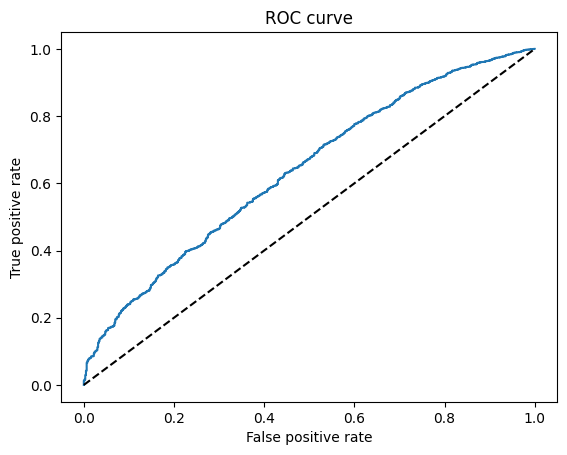

In [268]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['targets_test'],\
          df_actual_predicted_probs['y_hat_test_proba'])
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [269]:
AUROC = roc_auc_score(df_actual_predicted_probs['targets_test'],\
                      df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.6369546449300265

GINI Coefficient

In [270]:
# Sort the values and reset the index
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# Determine the culumative population for good and bad
df_actual_predicted_probs['Cum N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cum N Good'] = df_actual_predicted_probs['targets_test'].cumsum()
df_actual_predicted_probs['Cum N Bad'] = df_actual_predicted_probs['Cum N Population']\
                                        - df_actual_predicted_probs['Cum N Good']
# Calculate the cumulative percentage of all, good, and bad observations.
sum_all= df_actual_predicted_probs.shape[0]
df_actual_predicted_probs['Cum Perc Population'] = df_actual_predicted_probs['Cum N Population'] / sum_all
# Calculate cumulative percentage of 'good'.
sum_good=  df_actual_predicted_probs['targets_test'].sum()
df_actual_predicted_probs['Cum Perc Good'] = df_actual_predicted_probs['Cum N Good'] /sum_good
# Calculate the cumulative percentage of 'bad'.
sum_bad = sum_all- sum_good
df_actual_predicted_probs['Cum Perc Bad'] = df_actual_predicted_probs['Cum N Bad'] / sum_bad

Text(0.5, 1.0, 'Gini')

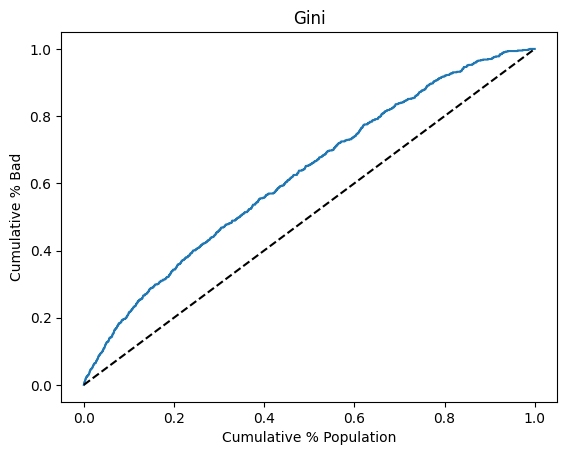

In [271]:
# Plotting Gini - cumulative percentage versus the cumulative percentage 'good' along the y-axis
plt.plot(df_actual_predicted_probs['Cum Perc Population'], df_actual_predicted_probs['Cum Perc Bad'])
# Plotting a seconary diagonal line, with dashed line style and black color.
plt.plot(df_actual_predicted_probs['Cum Perc Population'], df_actual_predicted_probs['Cum Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [272]:
Gini = AUROC * 2 - 1
Gini

0.27390928986005303

Kolmogorov-Smirnov coefficient

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

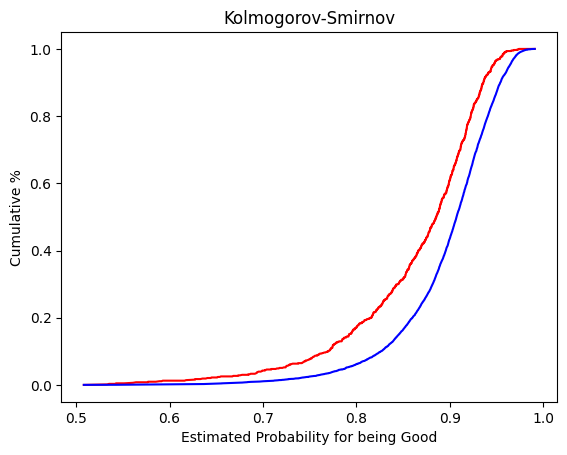

In [273]:
# Plotting KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cum Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cum Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [274]:
KS = max(df_actual_predicted_probs['Cum Perc Bad'] - df_actual_predicted_probs['Cum Perc Good'])
KS

0.18377341199381403

Applying PD Model for decision making

Creating a scorecard

In [275]:
# Create a dataframe with the coefficiencts and their p_values
df_ref_categories = pd.DataFrame(ref_categories2,columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan

df_scorecard = pd.concat ([summary_table2, df_ref_categories ])
df_scorecard = df_scorecard.reset_index()

df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard.head()

index Feature name  Coefficients      p_values Original feature name
0      0    Intercept     -0.959405           NaN             Intercept
1      1      grade:A      1.156454  3.475288e-04                 grade
2      2      grade:B      1.306824  1.418219e-11                 grade
3      3      grade:C      1.149504  8.984430e-11                 grade
4      4      grade:D      0.876033  1.225480e-07                 grade

In [276]:
# Define the minimum and maximum score
min_score = 300
max_score = 850

In [277]:
# Determine the ratio to multiply the coefficients to keep the rating within the limits
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
ratio_ = (max_score-min_score) / (max_sum_coef - min_sum_coef)
# Calculate the scores from the coefficient values
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * ratio_
# Replace the intercept coefficient
df_scorecard['Score - Calculation'][0] = (df_scorecard['Coefficients'][0] -\
                                           min_sum_coef)*ratio_+ min_score
# Round the values
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard.head()

index Feature name  Coefficients      p_values Original feature name  \
0      0    Intercept     -0.959405           NaN             Intercept   
1      1      grade:A      1.156454  3.475288e-04                 grade   
2      2      grade:B      1.306824  1.418219e-11                 grade   
3      3      grade:C      1.149504  8.984430e-11                 grade   
4      4      grade:D      0.876033  1.225480e-07                 grade   

   Score - Calculation  Score - Preliminary  
0           338.747615                339.0  
1            77.241800                 77.0  
2            87.285322                 87.0  
3            76.777625                 77.0  
4            58.511914                 59.0

In [279]:
# Check the minimum and maximum scores
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# View the minimum and maximum to see if they are in the range defined
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
print(min_sum_score_prel, max_sum_score_prel)

301.0 851.0




```
# This is formatted as code
```

Let us see the coefficients non rounded to see how we can mofidy the card

In [280]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Difference'] =  df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard.loc[df_scorecard.groupby(['Original feature name'])['Score - Final'].idxmax()]

index                         Feature name  Coefficients      p_values  \
0       0                            Intercept     -0.959405           NaN   
44     44                   acc_now_delinq:>=1      0.557792  9.986515e-02   
21     21         addr_state:WV_NH_WY_DC_ME_ID      0.640041  3.368415e-03   
61     61                 annual_inc:120K-140K      0.847862  2.775970e-05   
64     64                          dti:1.4-3.5      0.233059  4.888144e-01   
34     34                        emp_length:10      0.297834  1.233921e-05   
2       2                              grade:B      1.306824  1.418219e-11   
8       8              home_ownership:MORTGAGE      0.071450  1.399229e-01   
28     28                initial_list_status:w      0.258128  2.297643e-08   
39     39                     inq_last_6mths:0      0.643514  4.068949e-03   
35     35                      int_rate:<9.548      0.910501  4.403777e-04   
42     42                          pub_rec:3-4      0.375014  3.105258e-03   
26     26           purpose:oth__med__vacation      0.580740  8.599494e-07   
29     29                              term:36      0.043755  4.564233e-01   
51     51                total_rev_hi_lim:>95K      0.822188  9.112148e-02   
23     23  verification_status:Source Verified      0.065701  2.051498e-01   

   Original feature name  Score - Calculation  Score - Preliminary  \
0              Intercept           338.747615                339.0   
44        acc_now_delinq            37.256004                 37.0   
21            addr_state            42.749566                 43.0   
61            annual_inc            56.630355                 57.0   
64                   dti            15.566435                 16.0   
34            emp_length            19.892928                 20.0   
2                  grade            87.285322                 87.0   
8         home_ownership             4.772309                  5.0   
28   initial_list_status            17.240885                 17.0   
39        inq_last_6mths            42.981551                 43.0   
35              int_rate            60.814158                 61.0   
42               pub_rec            25.047898                 25.0   
26               purpose            38.788742                 39.0   
29                  term             2.922451                  3.0   
51      total_rev_hi_lim            54.915500                 55.0   
23   verification_status             4.388281                  4.0   

    Score - Final  Difference  
0           339.0    0.252385  
44           37.0   -0.256004  
21           43.0    0.250434  
61           57.0    0.369645  
64           16.0    0.433565  
34           20.0    0.107072  
2            87.0   -0.285322  
8             5.0    0.227691  
28           17.0   -0.240885  
39           43.0    0.018449  
35           61.0    0.185842  
42           25.0   -0.047898  
26           39.0    0.211258  
29            3.0    0.077549  
51           55.0    0.084500  
23            4.0   -0.388281

In [281]:
# Decrease the value of a coefficient by 1 to shift the score by 1
df_scorecard['Score - Final'][0]  = 338

Calculate Credit Scores

In [283]:
# Get training data
training_features3_ref_categories.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
id                                                               
3004635         0        1        0        0        0        0   
25246017        0        0        0        0        0        1   
17203145        0        0        1        0        0        0   
4805761         0        0        1        0        0        0   
16402563        0        1        0        0        0        0   

          home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
id                                                                        
3004635                    0                        0                 0   
25246017                   0                        1                 0   
17203145                   0                        1                 0   
4805761                    0                        1                 0   
16402563                   0                        1                 0   

          addr_state:NY  ...  annual_inc:>140K  dti:<=1.4  dti:1.4-3.5  \
id                       ...                                             
3004635               0  ...                 0          0            0   
25246017              0  ...                 0          0            0   
17203145              0  ...                 0          0            0   
4805761               0  ...                 0          0            0   
16402563              0  ...                 0          0            1   

          dti:3.5-7.7  dti:7.7-10.5  dti:10.5-16.1  dti:16.1-20.3  \
id                                                                  
3004635             0             0              1              0   
25246017            0             1              0              0   
17203145            0             0              0              0   
4805761             1             0              0              0   
16402563            0             0              0              0   

          dti:20.3-21.7  dti:21.7-22.4  dti:22.4-35  
id                                                   
3004635               0              0            0  
25246017              0              0            0  
17203145              0              1            0  
4805761               0              0            0  
16402563              0              0            0  

[5 rows x 71 columns]

In [284]:
# Test dataset with reference categories
inputs_test_with_ref_cat_w_intercept = training_features2.loc[: , features_all]
# Insert the intercept point w an index of 0, that is, in the beginning of df
inputs_test_with_ref_cat_w_intercept.insert(0,'Intercept', 1)
# Ensure that the same features are used in scorecard
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept [df_scorecard['Feature name'].values]

inputs_test_with_ref_cat_w_intercept.shape

(23514, 87)

In [285]:
# Create the score card array
scorecard_scores = df_scorecard['Score - Final']
scorecard_scores.shape

(87,)

In [286]:
scorecard_scores = scorecard_scores.values.reshape(87,1)
# Multiply the values of each row of the dataframe by the values of each column of the variable
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [287]:
y_scores.head()

0
id             
3004635   553.0
25246017  514.0
17203145  575.0
4805761   571.0
16402563  638.0

Obtain probability of default

In [288]:
coef_ =   (max_sum_coef - min_sum_coef) / (max_score - min_score)
sum_coef_from_score = (y_scores - min_score) * coef_ + min_sum_coef

In [289]:
y_hat_proba_from_score = sum_coef_from_score.applymap(lambda x: np.exp(x) / (np.exp(x) + 1))
y_hat_proba_from_score.head()


0
id                
3004635   0.904508
25246017  0.840835
17203145  0.929415
4805761   0.925384
16402563  0.971278

Setting cutoffs

In [290]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['targets_test'],\
          df_actual_predicted_probs['y_hat_test_proba'])
# Conconating 3 dataframes along the columns.
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# Naming the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [291]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 20)

# The score corresponding to each threshold equals:
ratio_ = (max_score-min_score) / (max_sum_coef - min_sum_coef)
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ratio_ + min_score).round()
df_cutoffs['Score'][0] = max_score

In [292]:
# Defining a function called 'n_approved' which assigns a value of 1 if a predicted probability is above a threshold
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

# With the assumption that a given probability of being 'good' will be approved,
# we obtain # of approved applications.
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)

# Calculating # of rejected applications for each threshold.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']

# Approval rate = the ratio of the apprv'd apps and all apps.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]

# Rejection rate.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']